<a href="https://colab.research.google.com/github/Brunix3004/CC216--TP-2024-1/blob/main/code/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
download.file("https://drive.google.com/uc?id=1G0-AKU6Lx5i23a1o62wCPSwBQHg1wls1&export=download", "hotel_bookings.csv")

In [ ]:
install.packages("heatmaply")
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘iterators’, ‘permute’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘gridExtra’, ‘plyr’, ‘Rcpp’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘plotly’, ‘viridis’, ‘dendextend’, ‘reshape2’, ‘seriation’, ‘htmlwidgets’, ‘webshot’, ‘assertthat’, ‘egg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(heatmaply)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: viridis

Loading required package: viridisLite


Welcome to heatmaply version 1.5.0

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
You may ask questions at stackoverflow, use the r and heatmaply tags: 
	 https://stackoverflow.com/questions/tagged/heatmaply




In [ ]:
hotel <- read.csv("hotel_bookings.csv", header = TRUE, sep = ",")
str(hotel)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                 

In [ ]:
summary(hotel)

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Ma

In [ ]:
head(hotel)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [ ]:
tail(hotel)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
119385,City Hotel,0,21,2017,August,35,30,2,5,2,⋯,No Deposit,394,NULL,0,Transient,96.14,0,2,Check-Out,2017-09-06
119386,City Hotel,0,23,2017,August,35,30,2,5,2,⋯,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
119387,City Hotel,0,102,2017,August,35,31,2,5,3,⋯,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
119388,City Hotel,0,34,2017,August,35,31,2,5,2,⋯,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
119389,City Hotel,0,109,2017,August,35,31,2,5,2,⋯,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07
119390,City Hotel,0,205,2017,August,35,29,2,7,2,⋯,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
sin_valor <- function(x) {
  for (i in 1:ncol(x)) {
    cat("En la columna", colnames(x)[i], "total de valores NA:", sum(is.na(x[,i])), "\n")
  }
}
sin_valor(hotel)

En la columna hotel total de valores NA: 0 
En la columna is_canceled total de valores NA: 0 
En la columna lead_time total de valores NA: 0 
En la columna arrival_date_year total de valores NA: 0 
En la columna arrival_date_month total de valores NA: 0 
En la columna arrival_date_week_number total de valores NA: 0 
En la columna arrival_date_day_of_month total de valores NA: 0 
En la columna stays_in_weekend_nights total de valores NA: 0 
En la columna stays_in_week_nights total de valores NA: 0 
En la columna adults total de valores NA: 0 
En la columna children total de valores NA: 4 
En la columna babies total de valores NA: 0 
En la columna meal total de valores NA: 0 
En la columna country total de valores NA: 0 
En la columna market_segment total de valores NA: 0 
En la columna distribution_channel total de valores NA: 0 
En la columna is_repeated_guest total de valores NA: 0 
En la columna previous_cancellations total de valores NA: 0 
En la columna previous_bookings_not_cancel

In [ ]:
hotel$id <- 1:nrow(hotel)

In [ ]:
names(hotel)

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"       
[33] "id"

In [ ]:
hotel$id[is.na(hotel$children)]

[1] 40601 40668 40680 41161

In [ ]:
if("id" %in% names(hotel) && 40601 %in% hotel$id) {
  print(hotel[hotel$id == 40601, ])
}


           hotel is_canceled lead_time arrival_date_year arrival_date_month
40601 City Hotel           1         2              2015             August
      arrival_date_week_number arrival_date_day_of_month
40601                       32                         3
      stays_in_weekend_nights stays_in_week_nights adults children babies meal
40601                       1                    0      2       NA      0   BB
      country market_segment distribution_channel is_repeated_guest
40601     PRT      Undefined            Undefined                 0
      previous_cancellations previous_bookings_not_canceled reserved_room_type
40601                      0                              0                  B
      assigned_room_type booking_changes deposit_type agent company
40601                  B               0   No Deposit  NULL    NULL
      days_in_waiting_list   customer_type adr required_car_parking_spaces
40601                    0 Transient-Party  12                         

In [ ]:
new_hotel <- hotel[!hotel$id %in% c(40601, 40668, 40680, 41161), ]

In [ ]:
if("id" %in% names(new_hotel) && 40601 %in% new_hotel$id) {
  print(new_hotel[new_hotel$id == 40601, ])
} else {
  print("ID no se ha encontrado")
}


[1] "ID no se ha encontrado"


In [ ]:
empty_string_count <- sapply(new_hotel, function(column) sum(column == ""))
print(empty_string_count)


                         hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                         

#Convertir a Factor


In [53]:
##NO SE SI CONVERTIR TMB ADULTS O DAYS IN WAITING LIST
#backup_hotel$children <- factor(ifelse(backup_hotel$children == 0, "0", "1+"))
#backup_hotel$babies <- factor(ifelse(backup_hotel$babies == 0, "0", "1+"))
backup_hotel <- new_hotel
backup_hotel$previous_cancellations <- factor(ifelse(backup_hotel$previous_cancellations == 0, "0", "1+"))
backup_hotel$previous_bookings_not_canceled <- factor(ifelse(backup_hotel$previous_bookings_not_canceled == 0, "0", "1+"))
backup_hotel$booking_changes <- factor(ifelse(backup_hotel$booking_changes == 0, "0", "1+"))
backup_hotel$required_car_parking_spaces <- factor(ifelse(backup_hotel$required_car_parking_spaces == 0, "0", "1+"))
backup_hotel$is_repeated_guest <- factor(ifelse(backup_hotel$is_repeated_guest == 0, "0", "1"))
backup_hotel$is_canceled <- factor(ifelse(backup_hotel$is_canceled == 0, "0", "1"))
backup_hotel$total_of_special_requests  <- factor(ifelse(backup_hotel$total_of_special_requests  == 0, "0", "1"))
backup_hotel$booking_changes     <- factor(ifelse(backup_hotel$booking_changes== 0, "0", "1"))

In [55]:
summary(backup_hotel)

    hotel           is_canceled   lead_time      arrival_date_year
 Length:119386      0:75166     Min.   :  0.00   Min.   :2015     
 Class :character   1:44220     1st Qu.: 18.00   1st Qu.:2016     
 Mode  :character               Median : 69.00   Median :2016     
                                Mean   : 85.66   Mean   :2016     
                                3rd Qu.:132.00   3rd Qu.:2017     
                                Max.   :302.00   Max.   :2017     
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119386      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.16            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Max.   :53.00            Max.   :31.0             
 stays_in_weekend_nights stays_in_

# Outliers


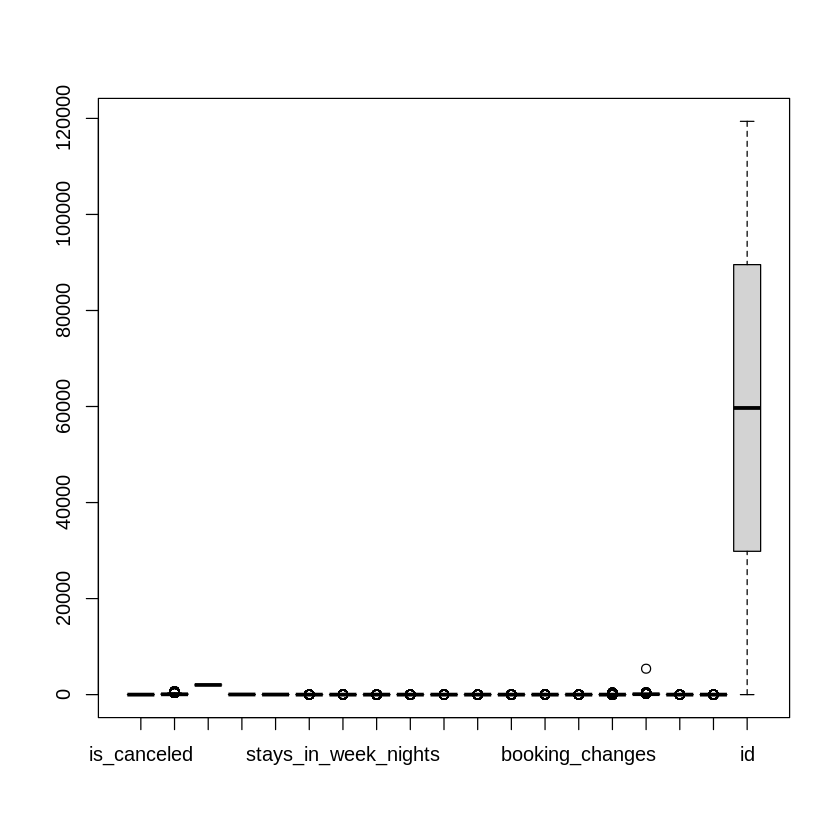

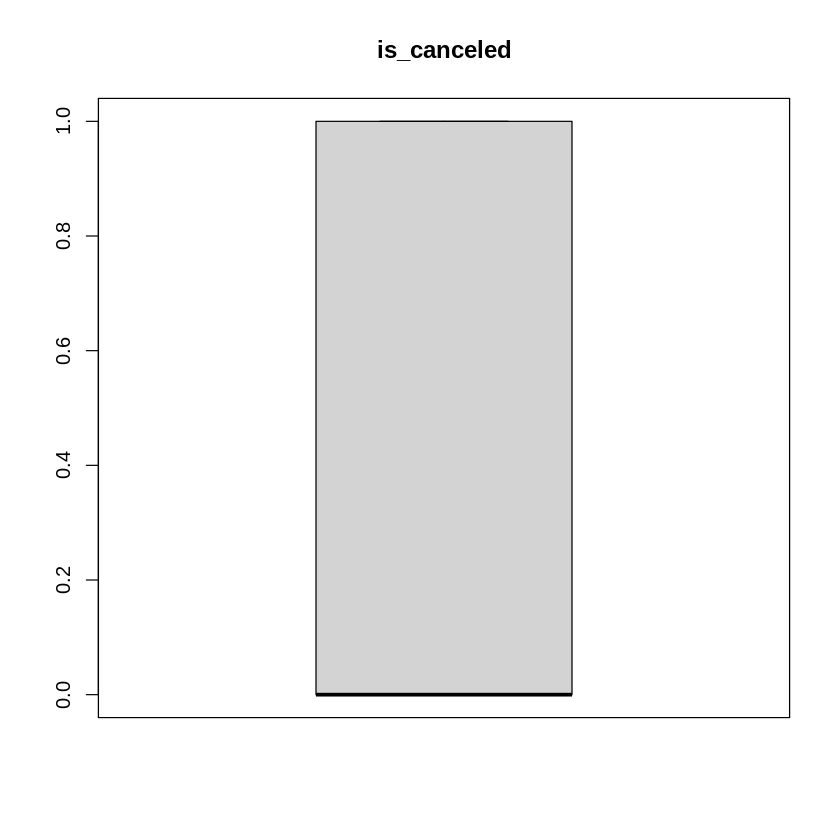

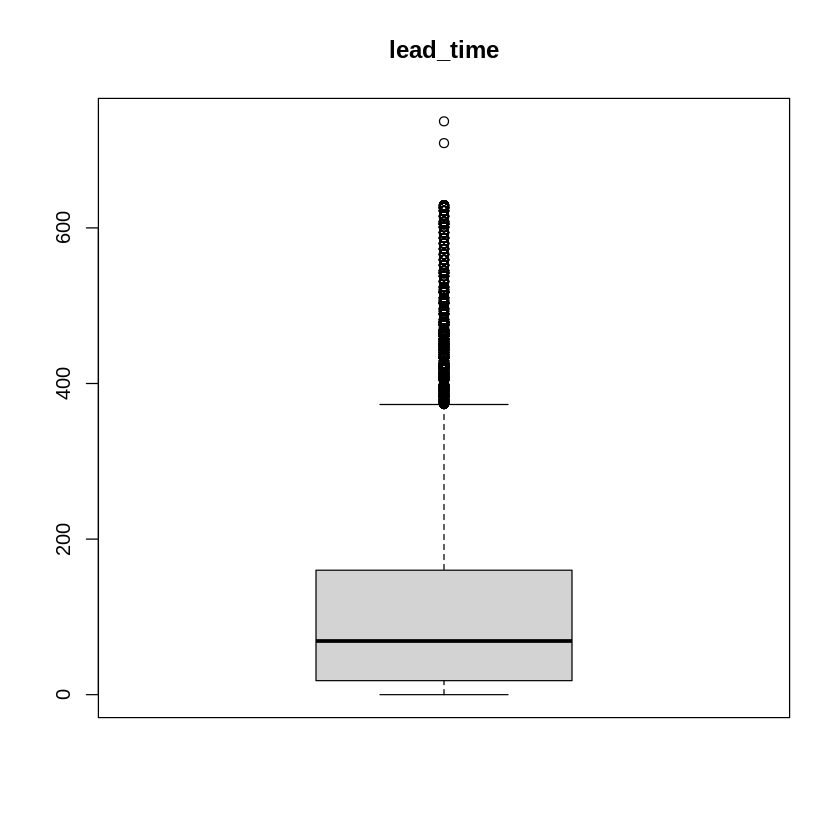

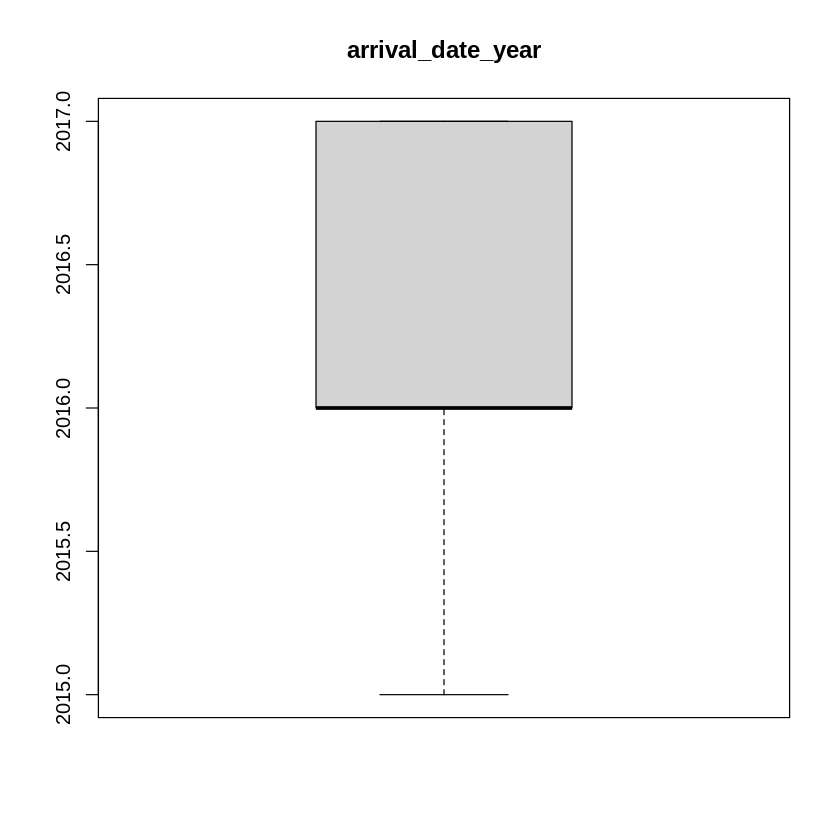

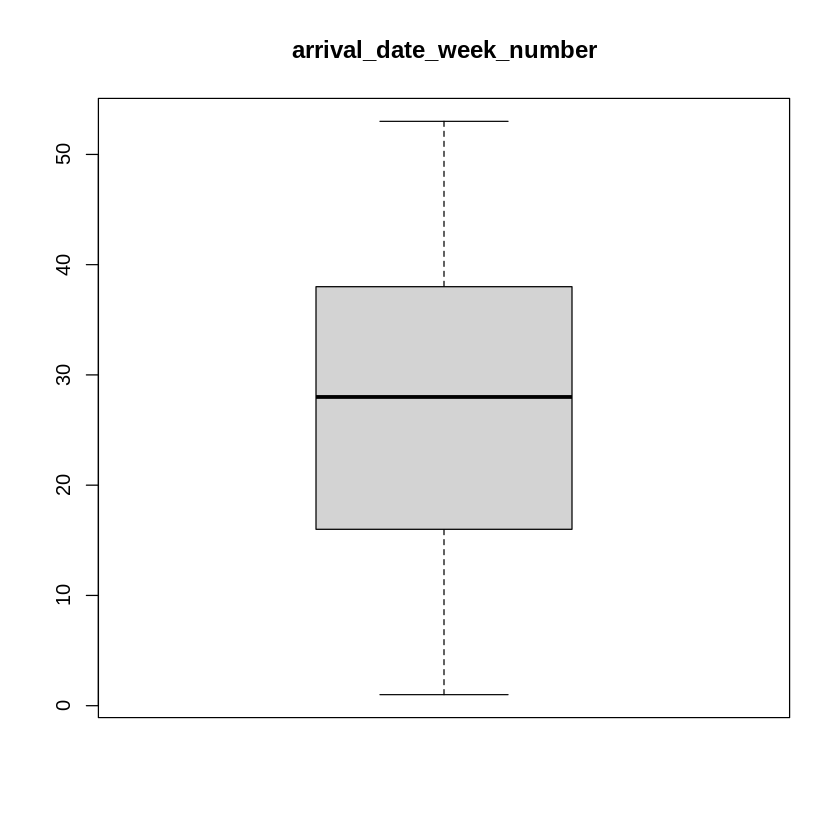

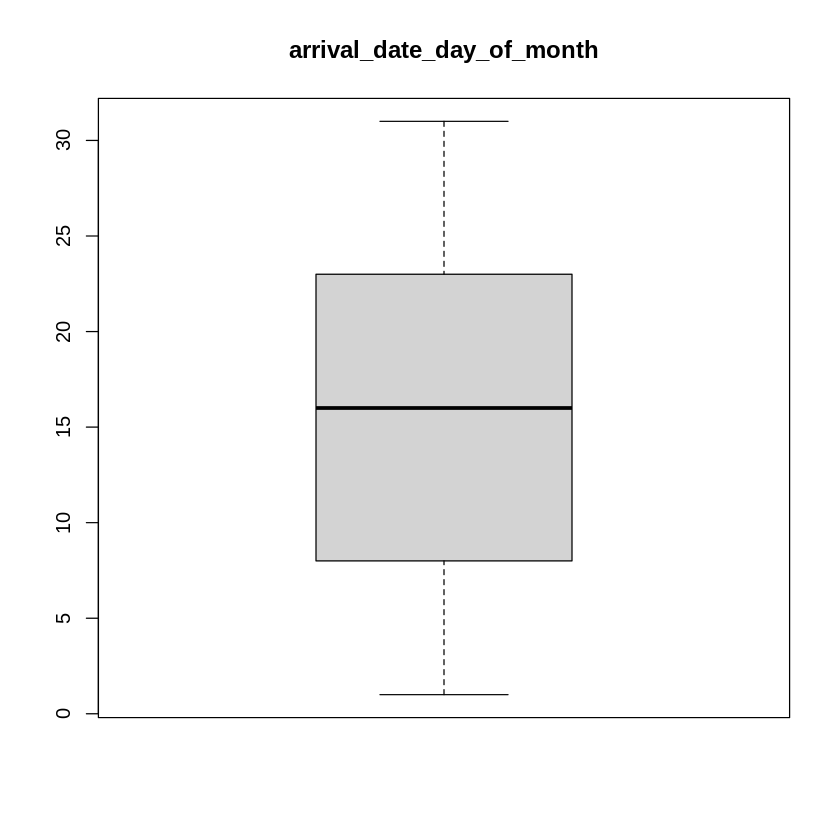

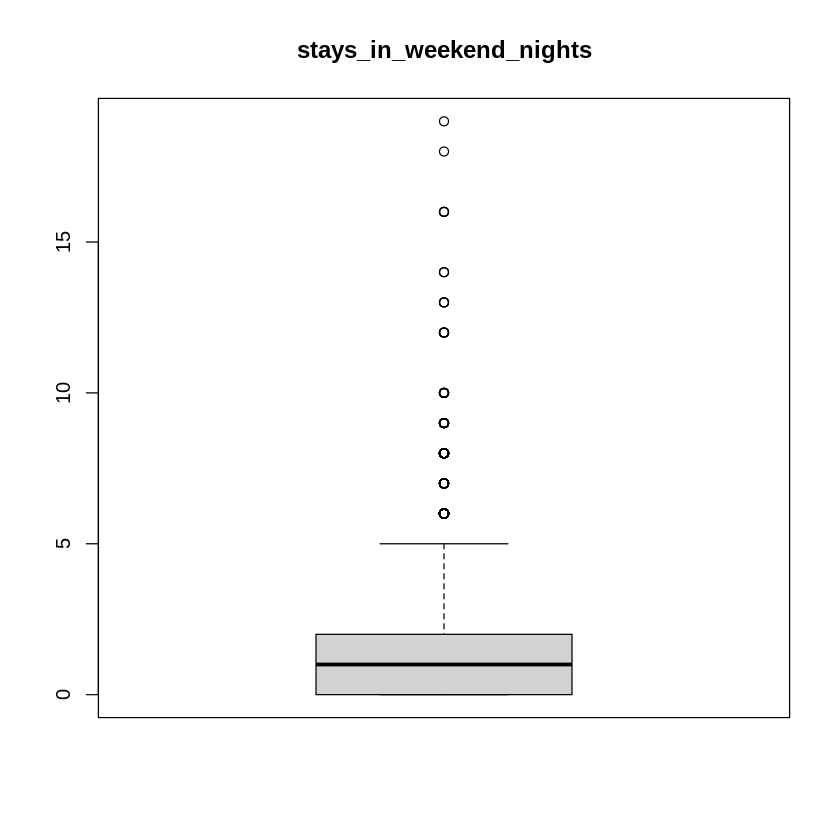

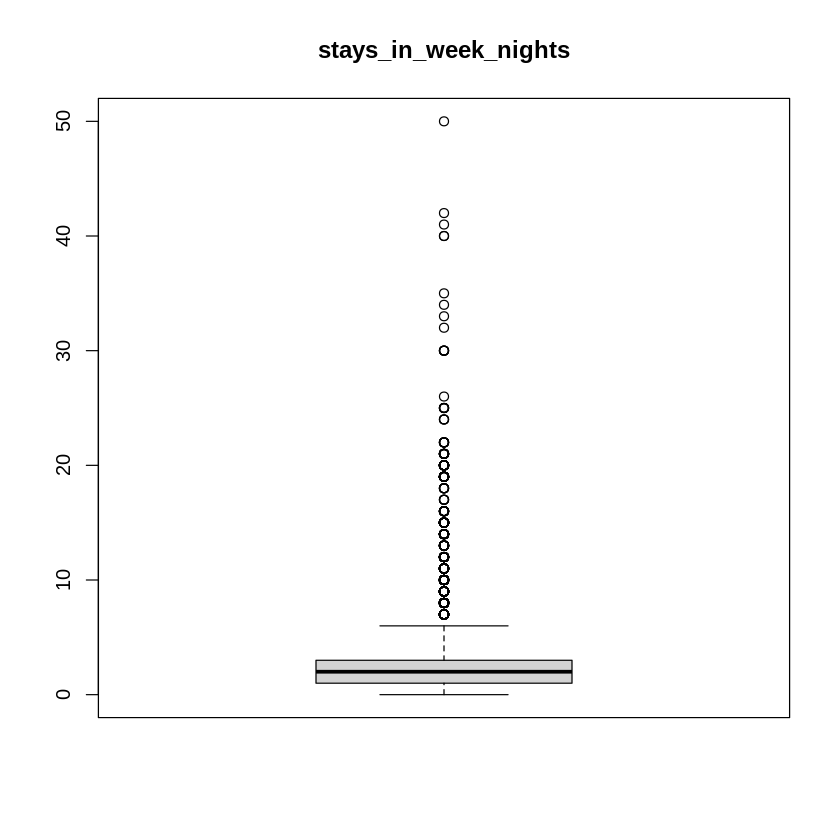

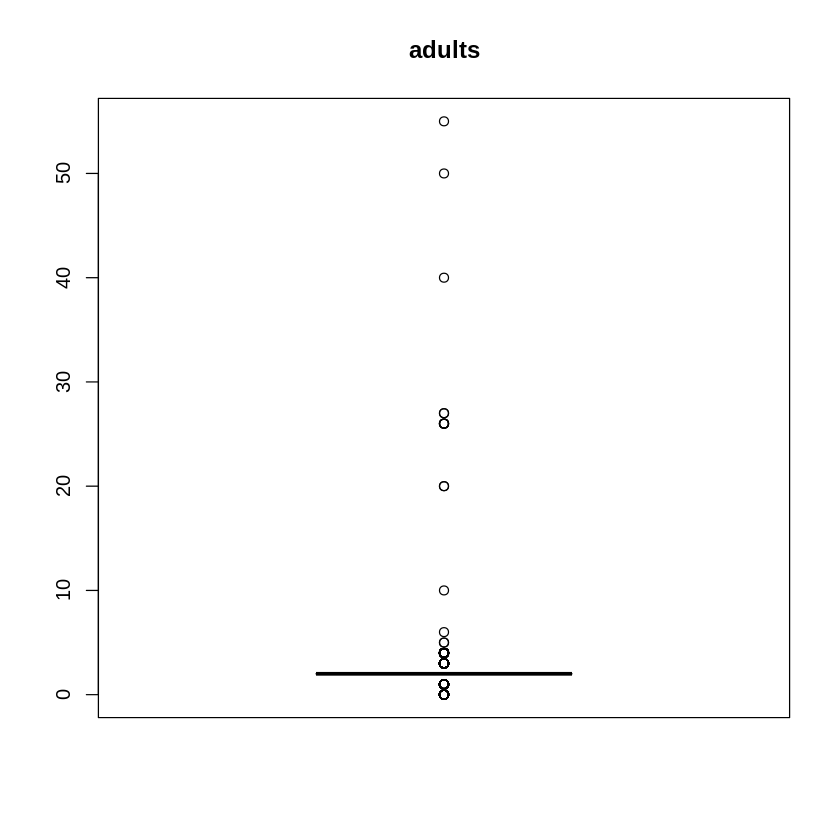

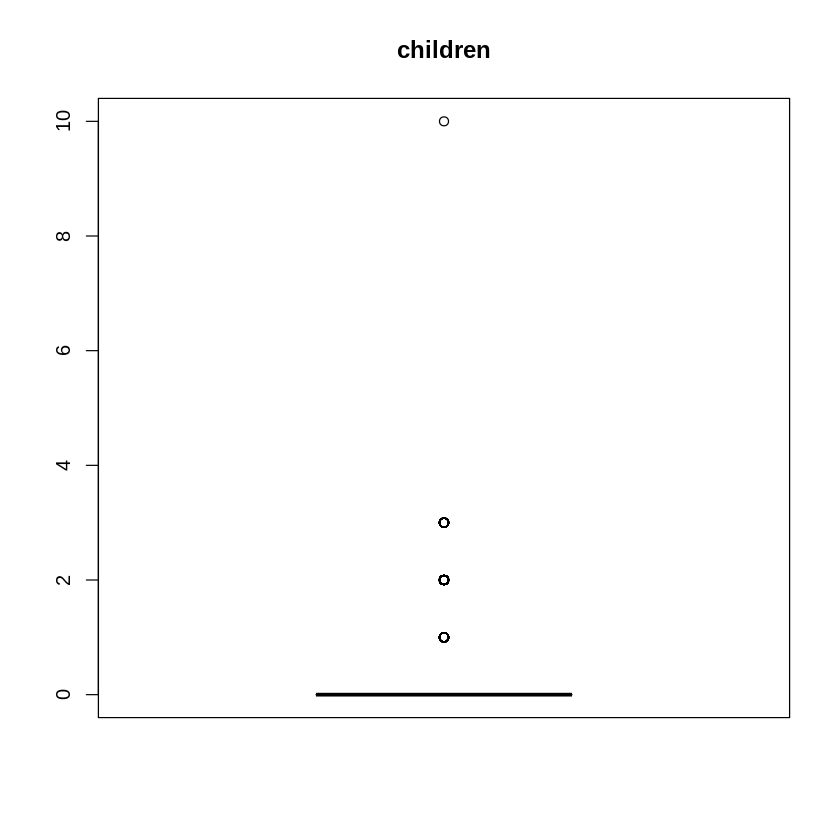

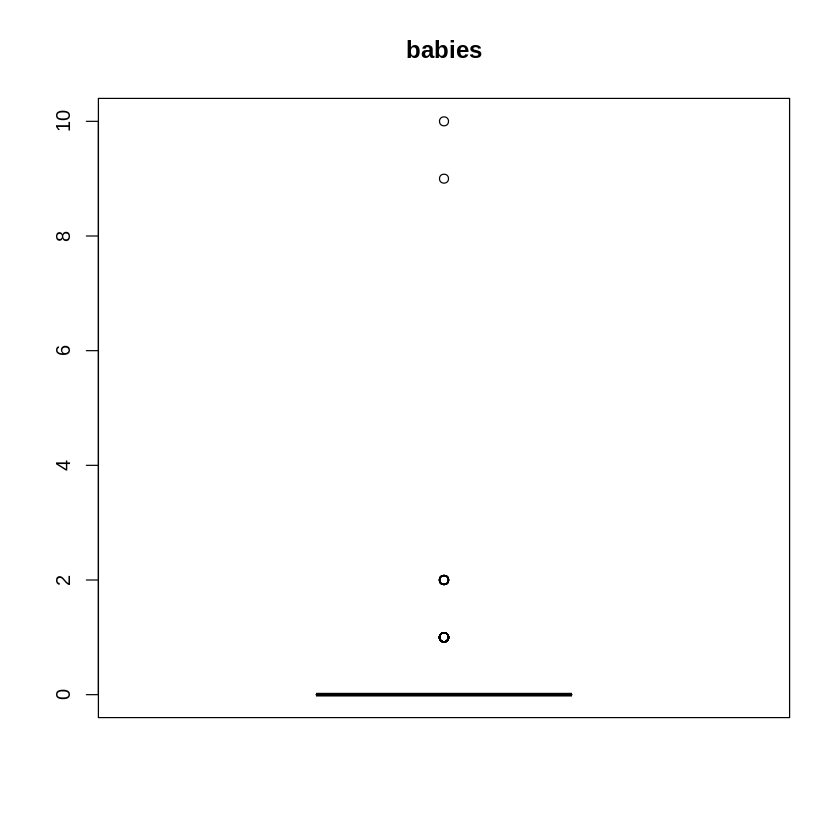

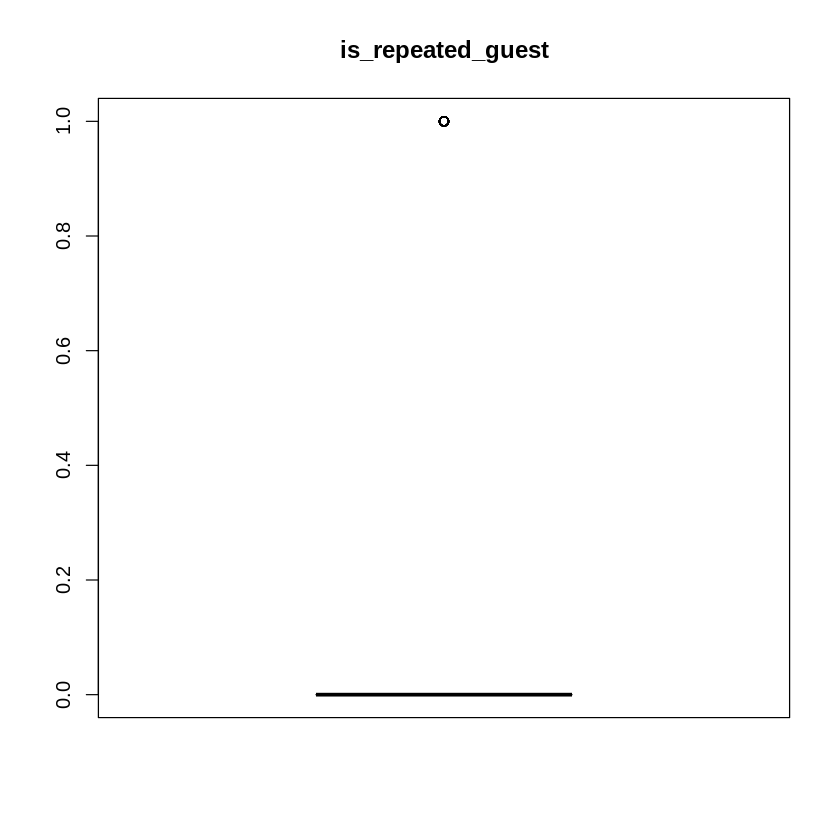

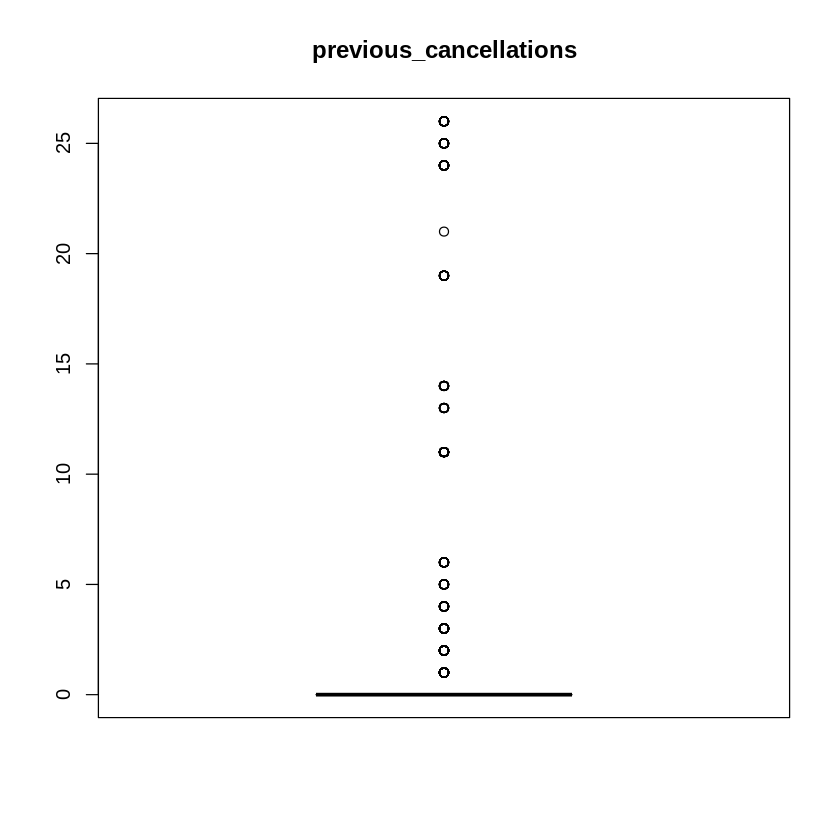

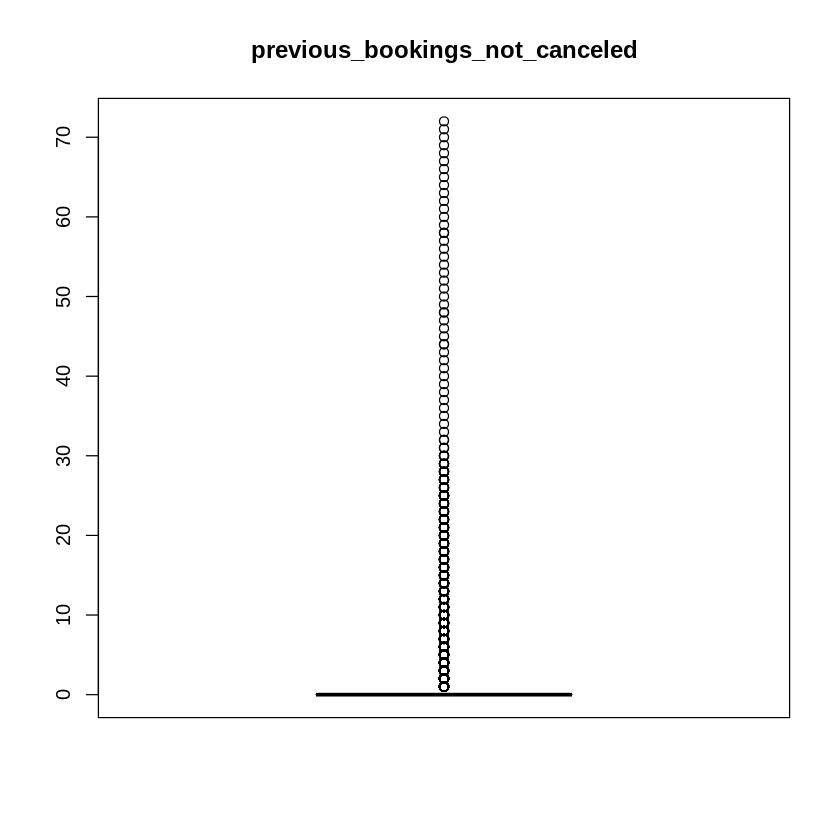

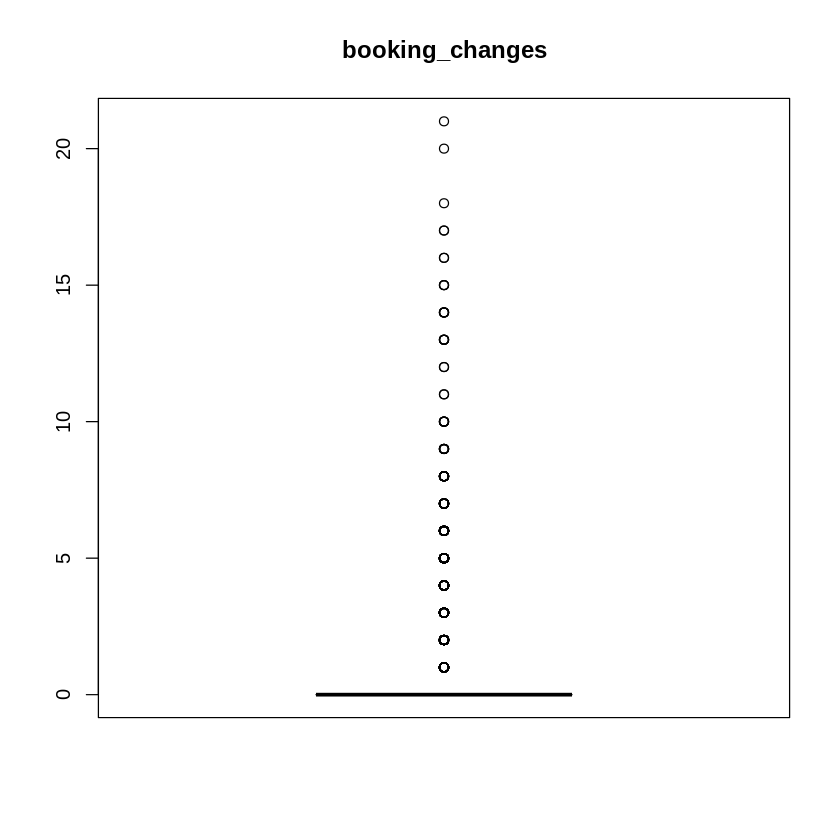

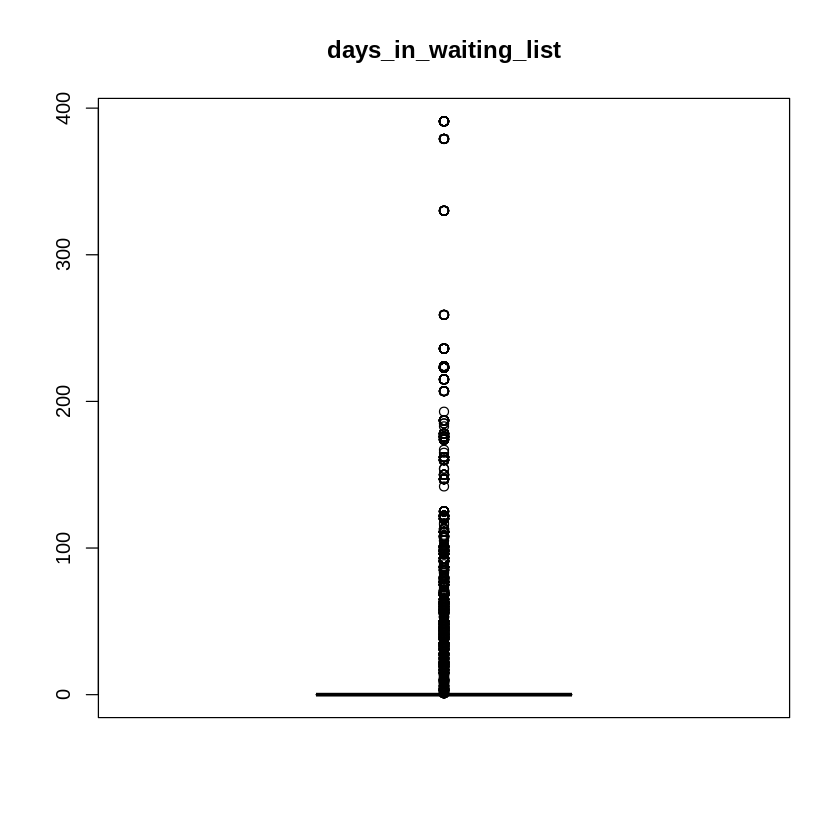

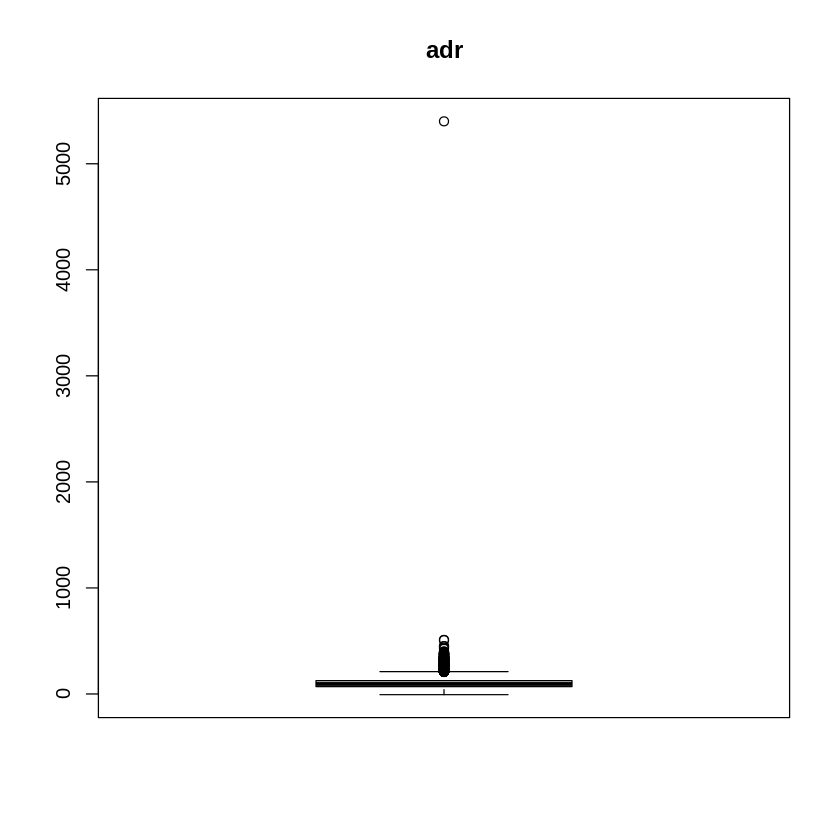

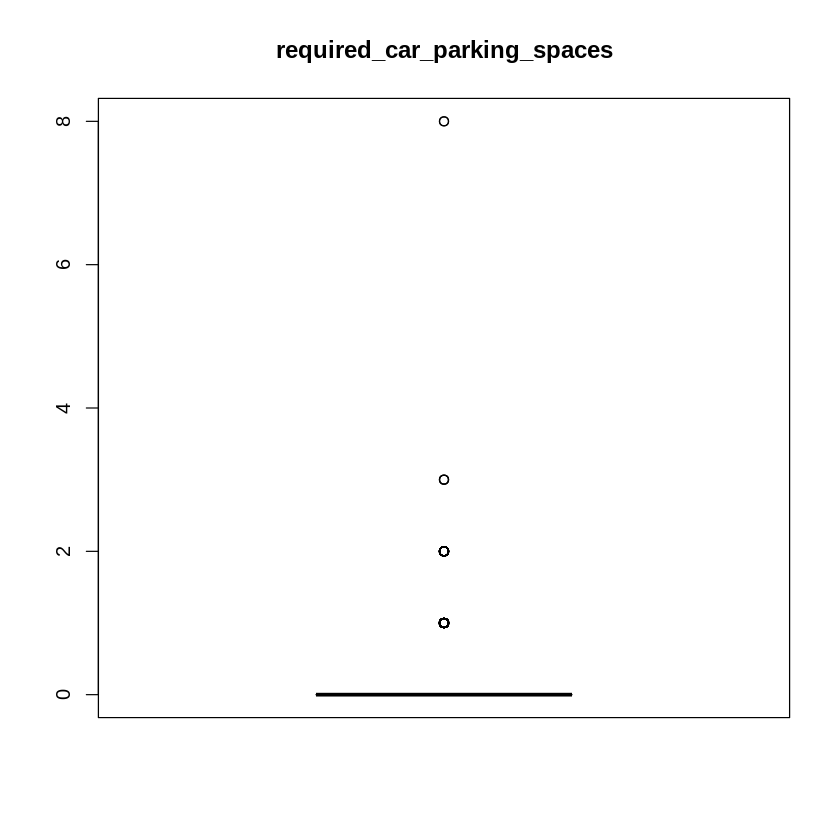

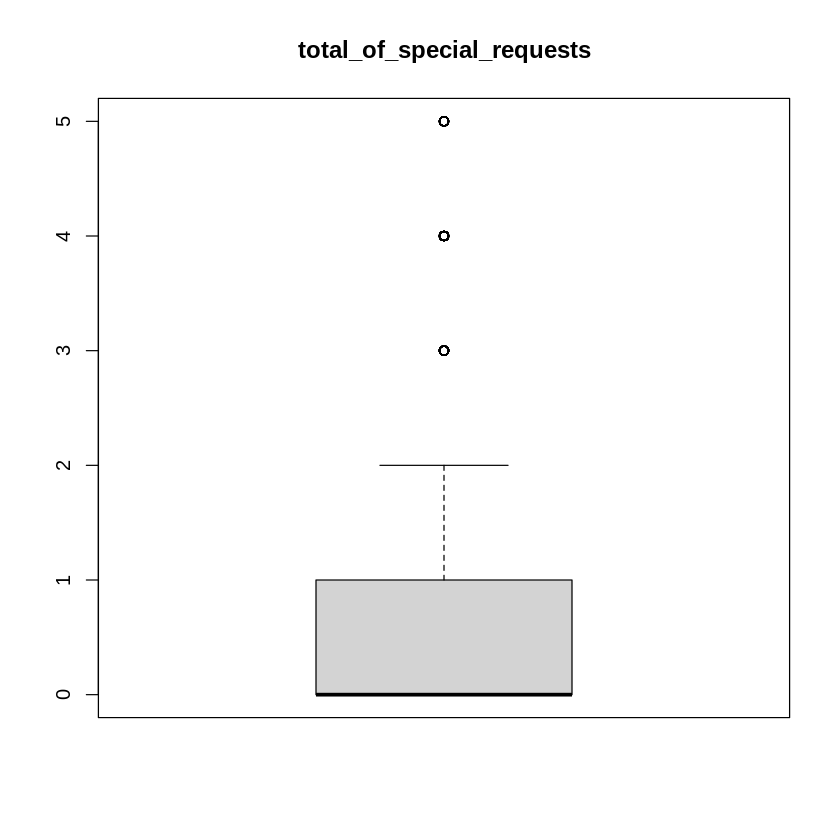

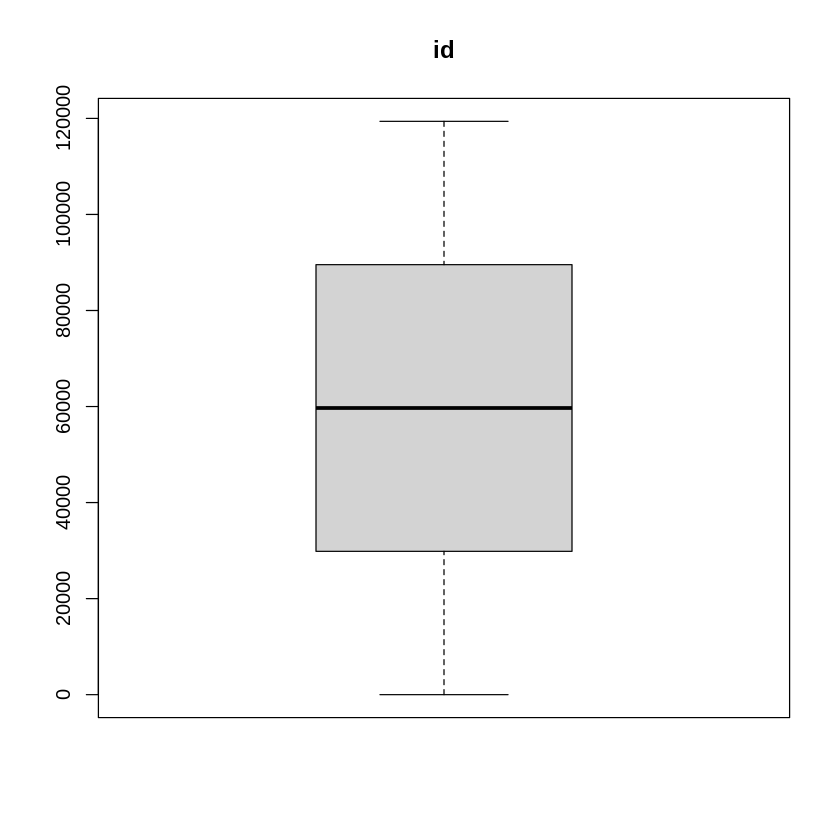

In [ ]:
#original
numeric_cols <- new_hotel[, sapply(new_hotel, is.numeric)]

# Crear diagramas de caja para las columnas numéricas
boxplot(numeric_cols)
for (col in names(new_hotel)) {
  if (is.numeric(new_hotel[[col]])) {
    boxplot(new_hotel[[col]], main = col)
  }
}

##Lead time


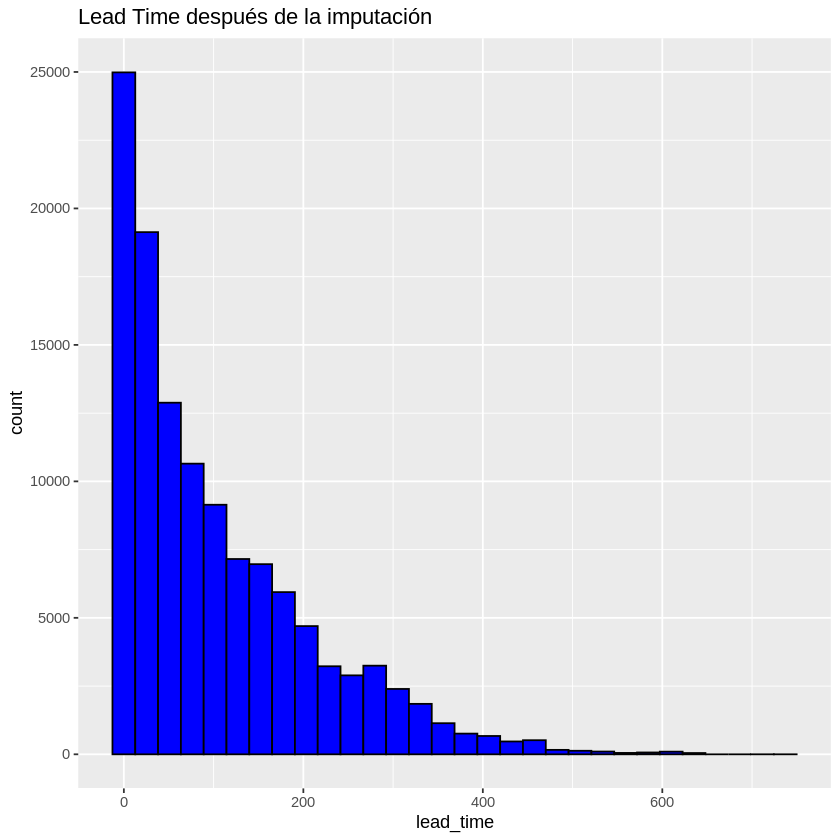

In [ ]:
#original
ggplot(hotel, aes(x = lead_time)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Lead Time después de la imputación")


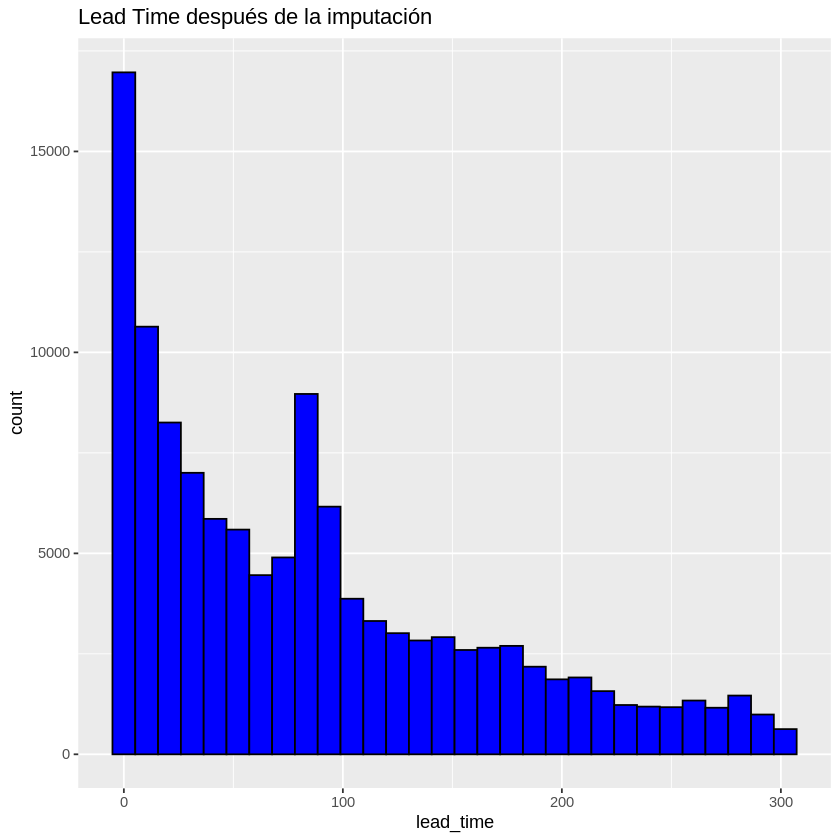

In [ ]:
qnt <- quantile(backup_hotel$lead_time, probs=c(.25, .75), na.rm = TRUE)
iqr <- IQR(backup_hotel$lead_time, na.rm = TRUE)
upper <- qnt[2] + 1.0* iqr
lower <- qnt[1] - 1.5 * iqr

backup_hotel$outlier <- ifelse(backup_hotel$lead_time < lower | backup_hotel$lead_time > upper, 1, 0)

model <- lm(lead_time ~ arrival_date_year, data = backup_hotel[backup_hotel$outlier == 0, ])

predicted_values <- predict(model, newdata = backup_hotel[backup_hotel$outlier == 1, ])
backup_hotel$lead_time[backup_hotel$outlier == 1] <- predicted_values

library(ggplot2)
ggplot(backup_hotel, aes(x = lead_time)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Lead Time después de la imputación")


##Stays in week nights

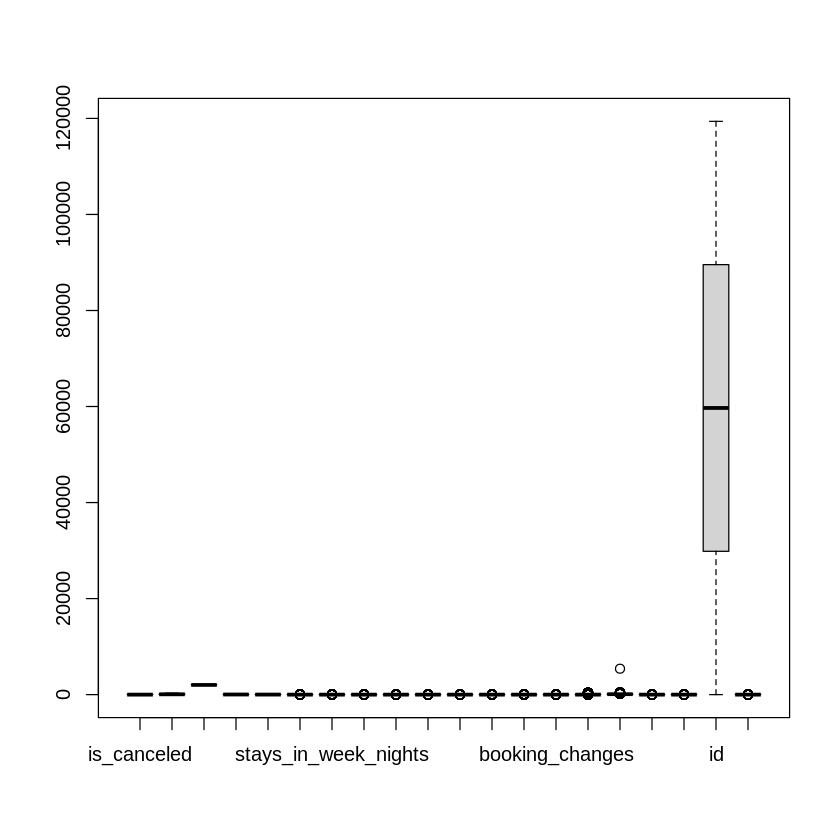

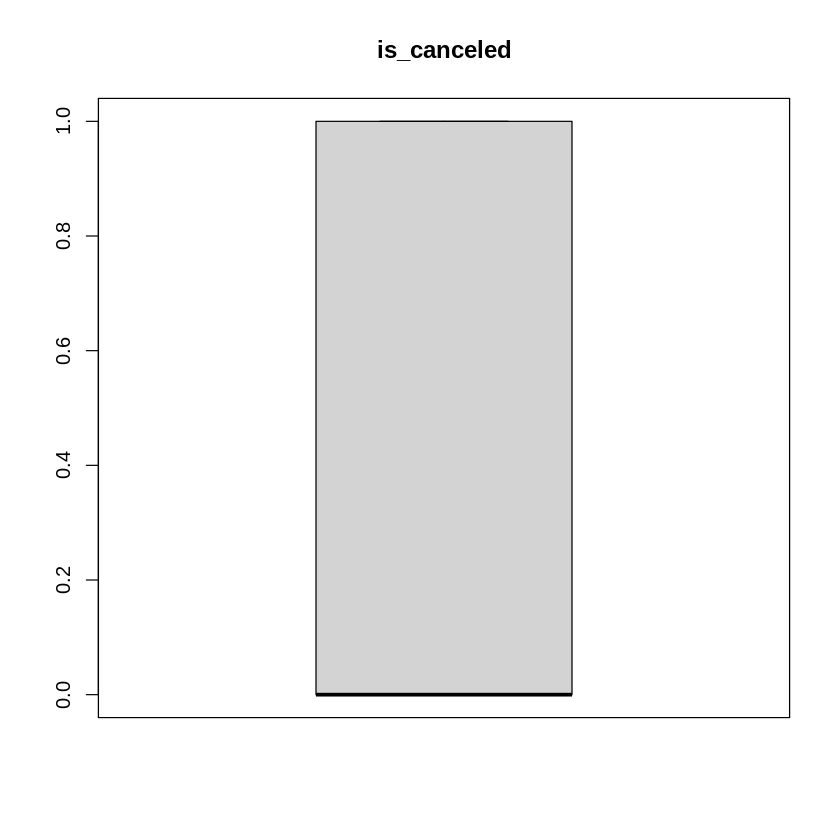

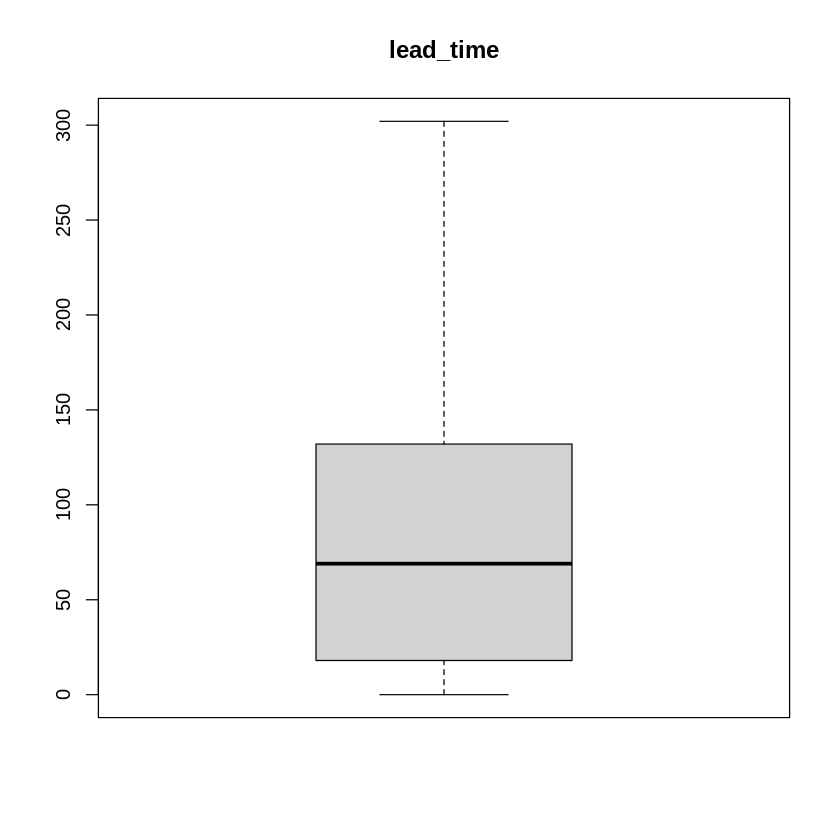

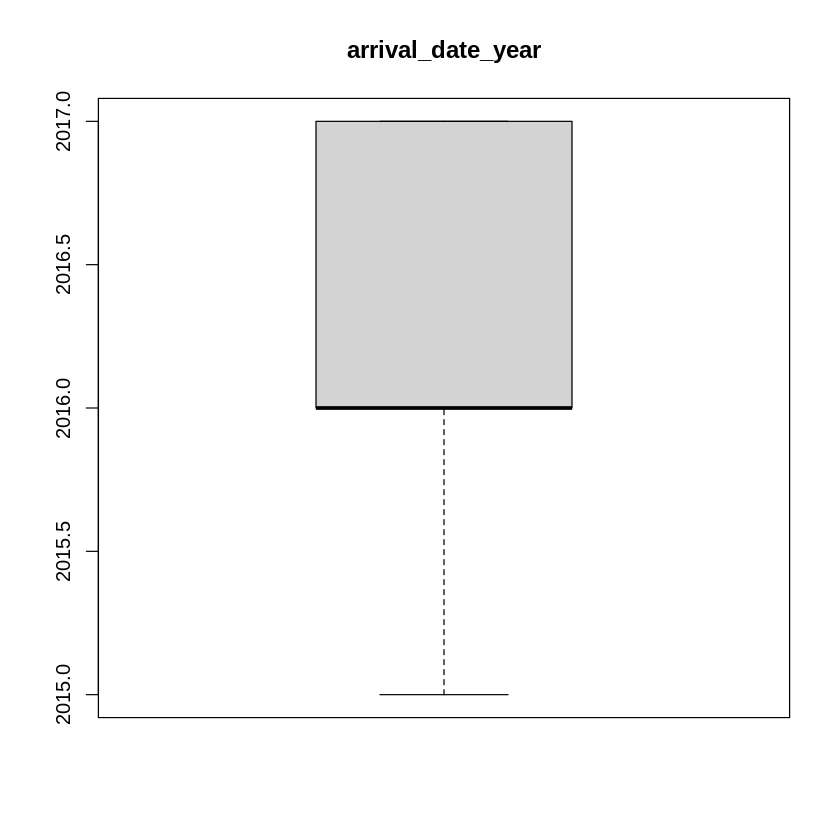

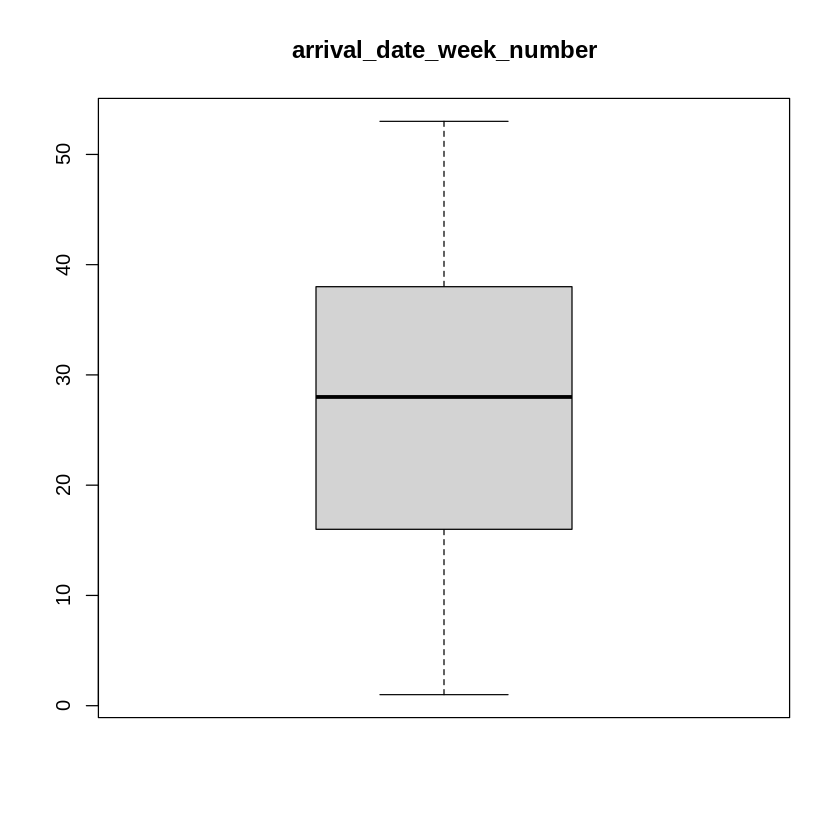

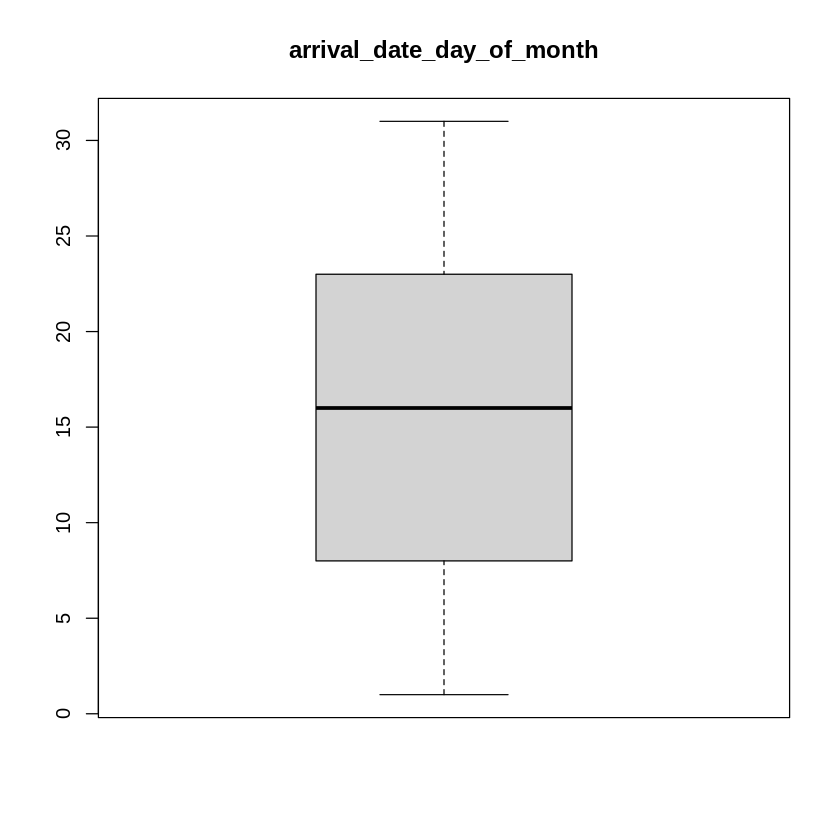

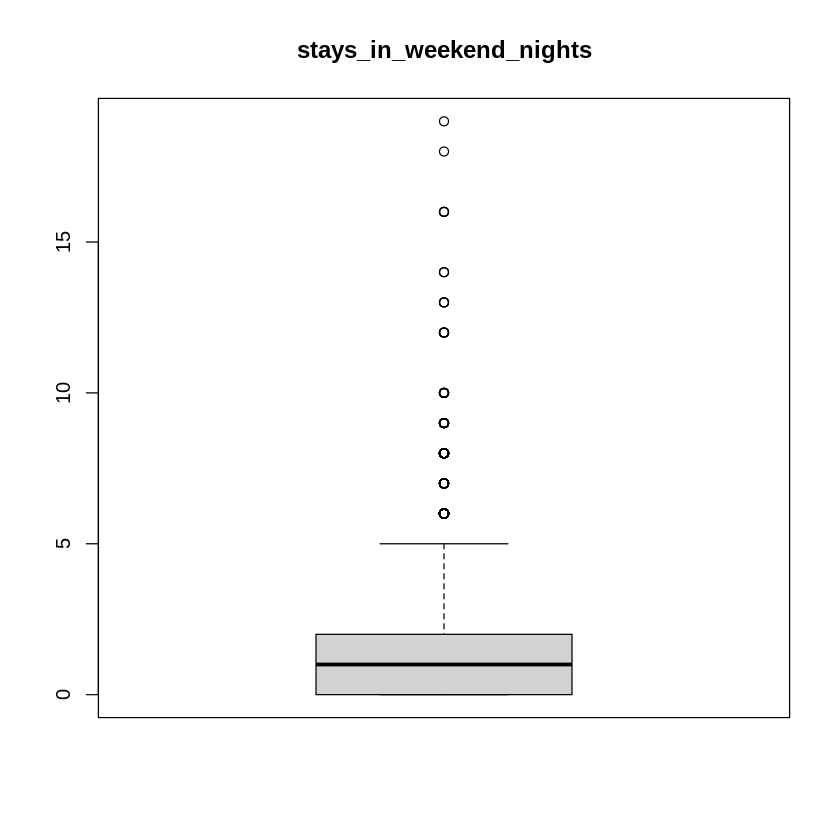

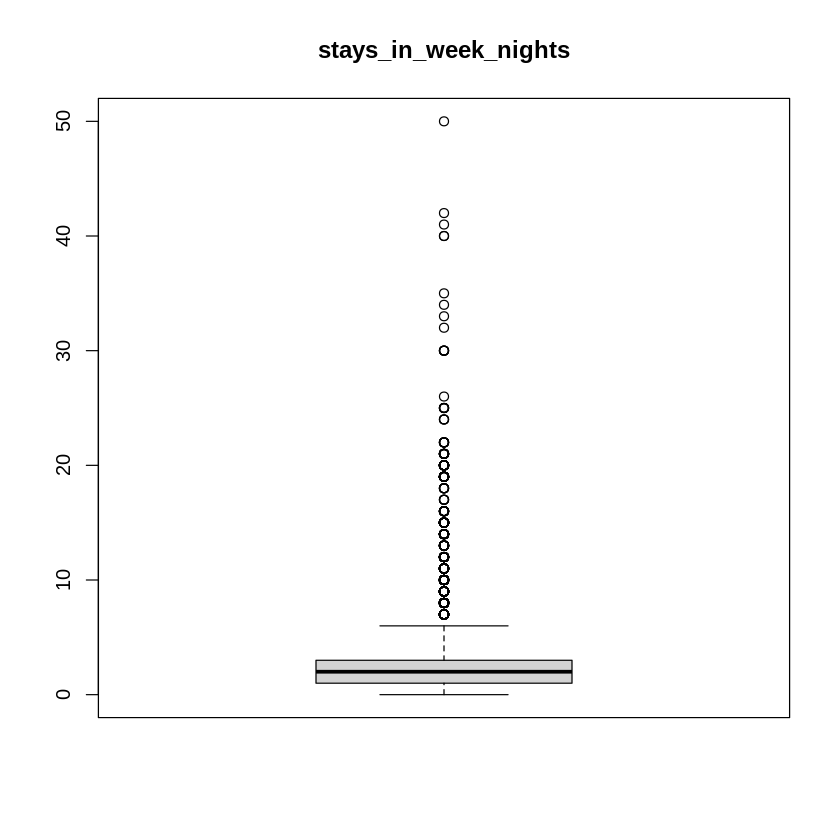

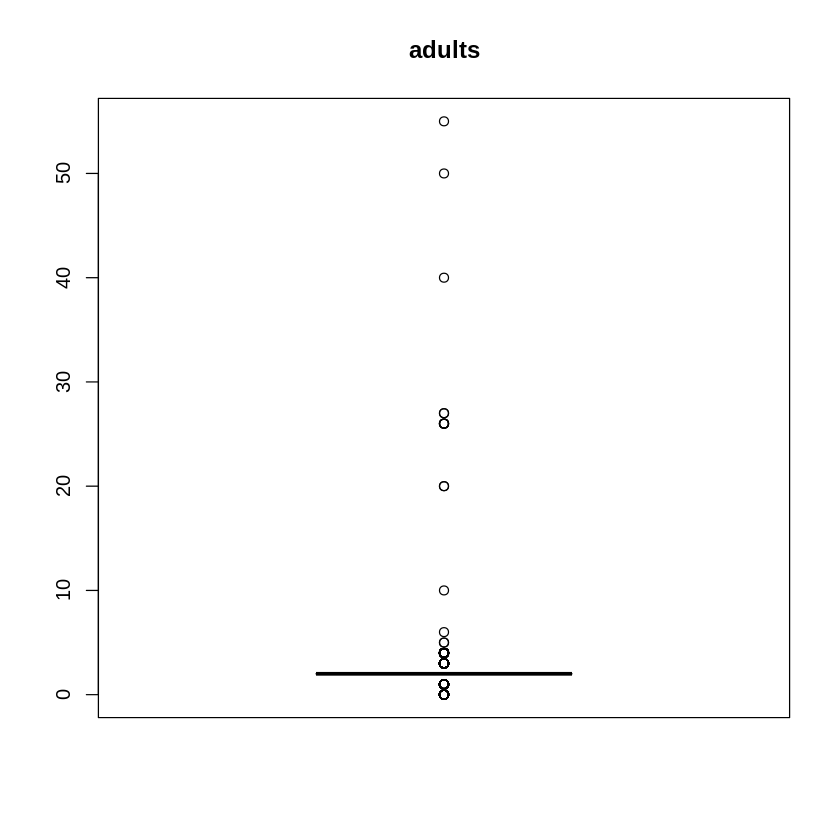

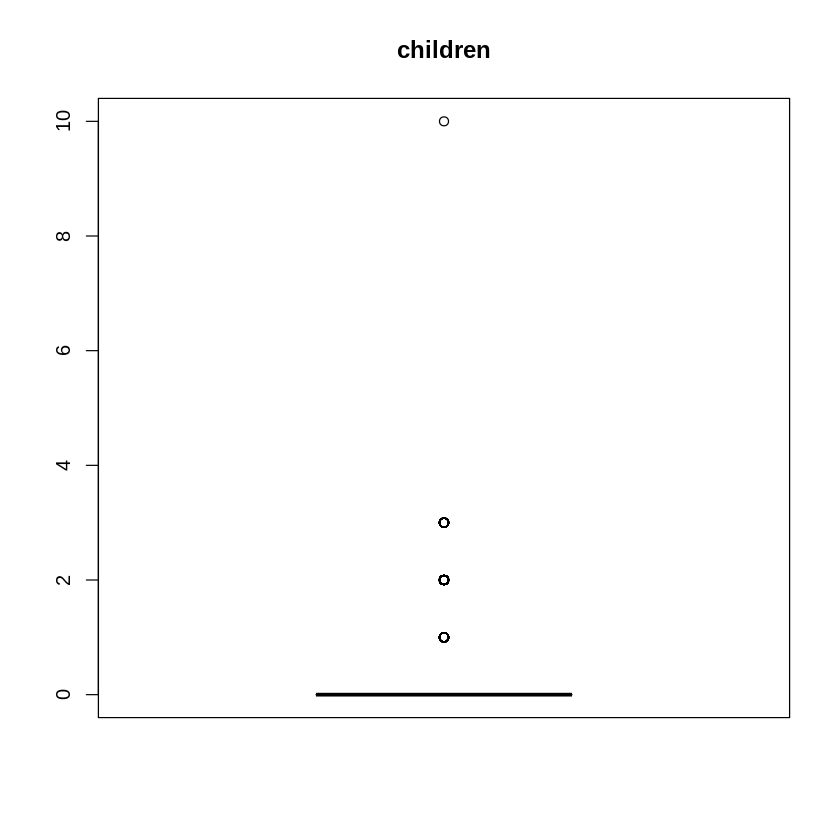

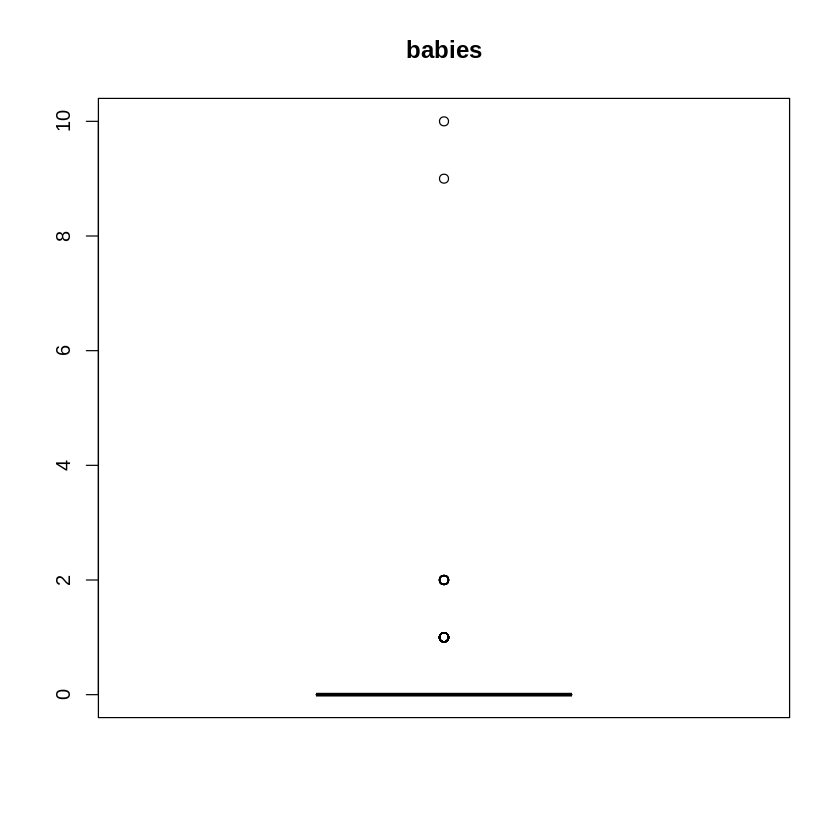

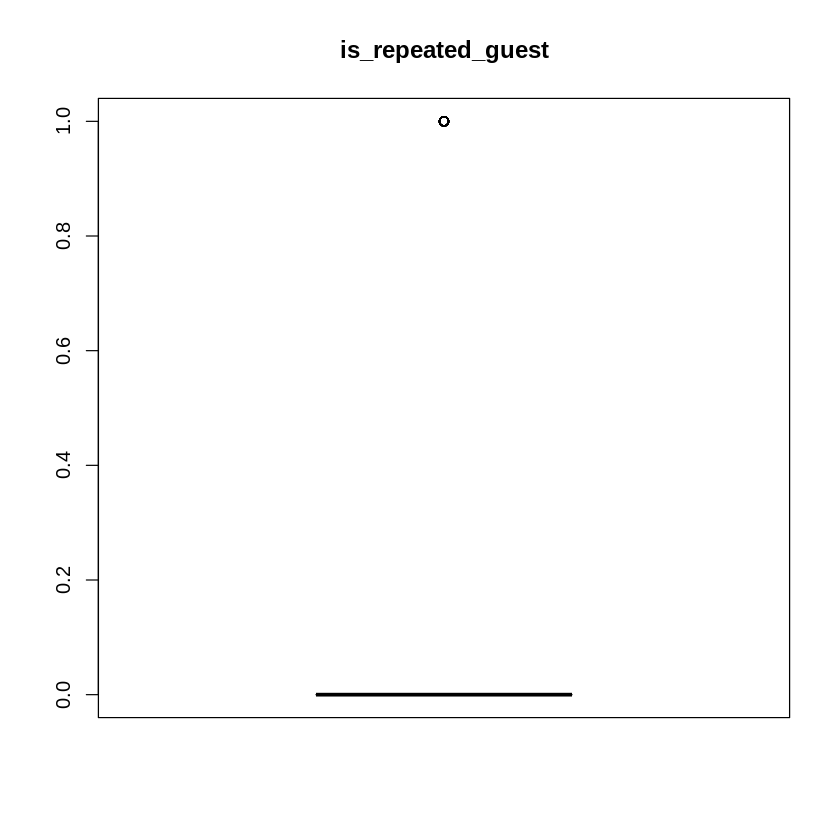

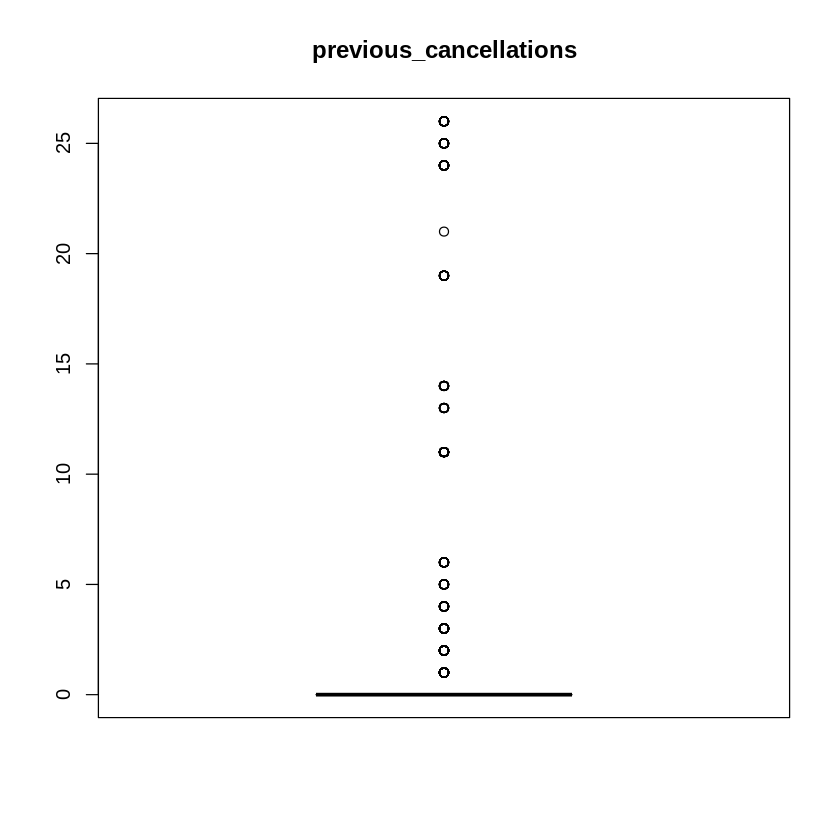

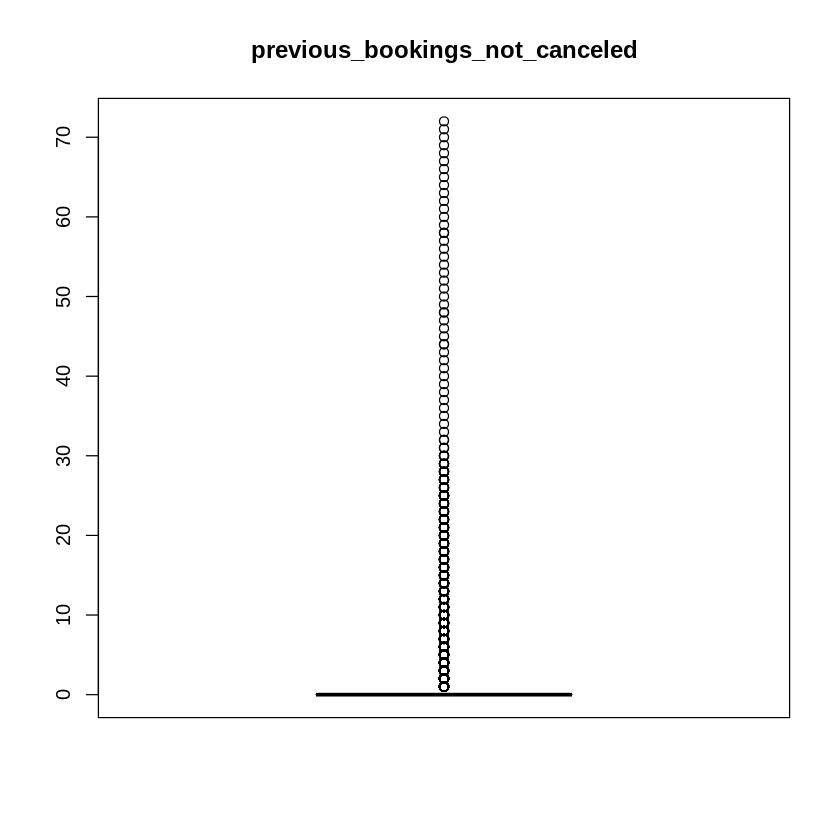

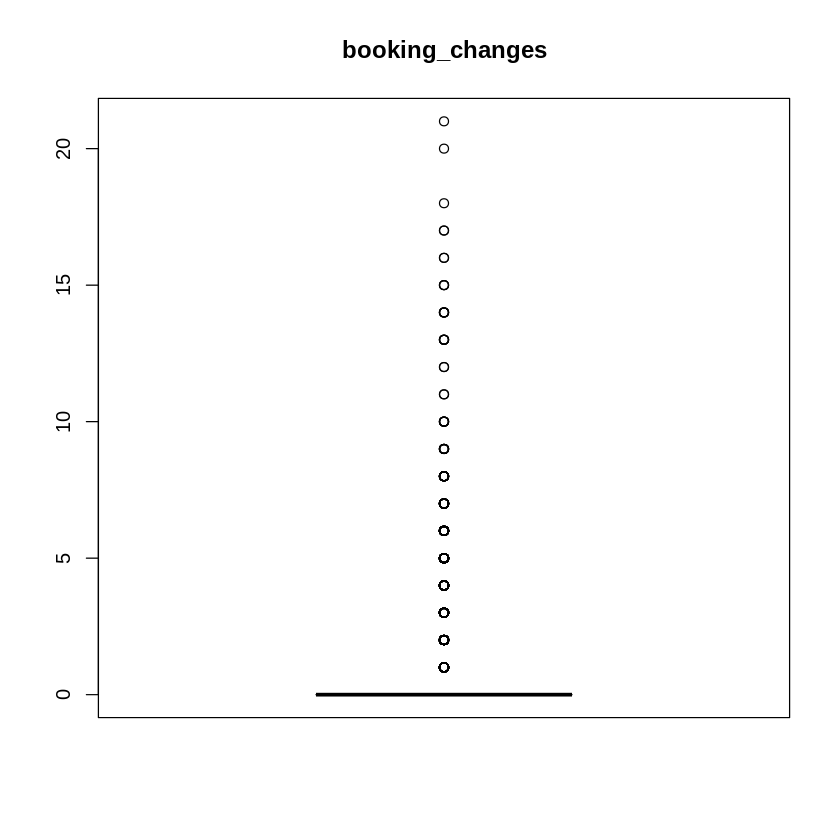

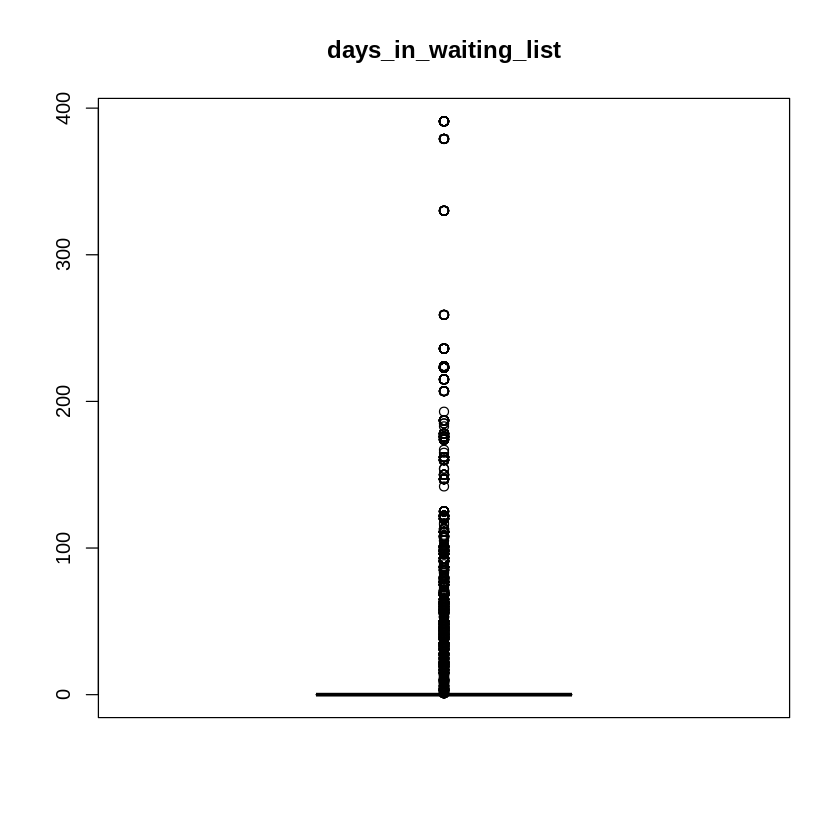

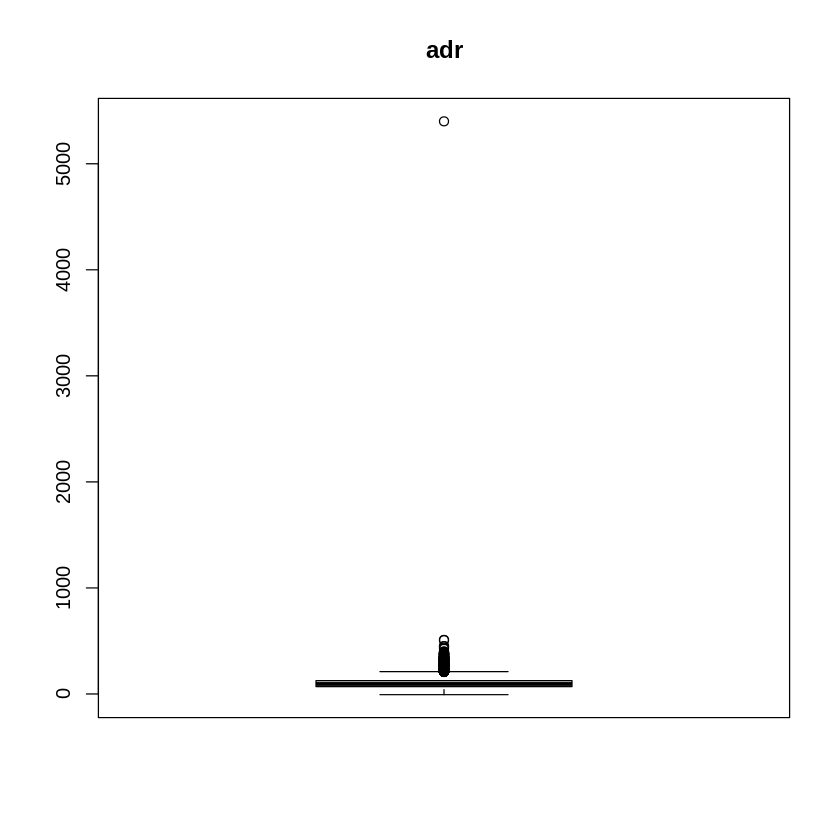

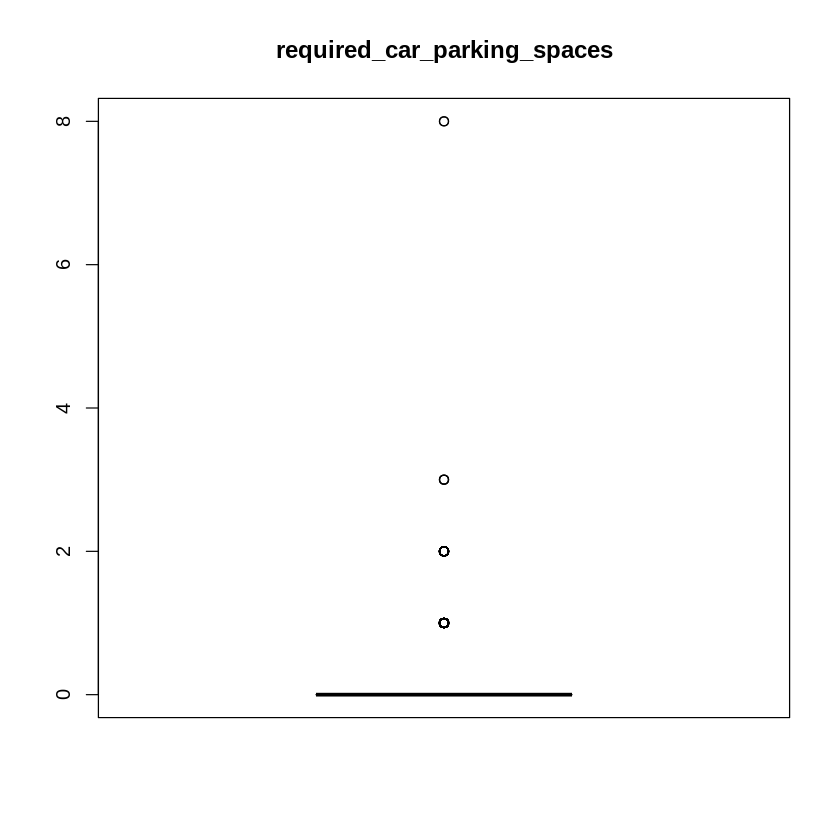

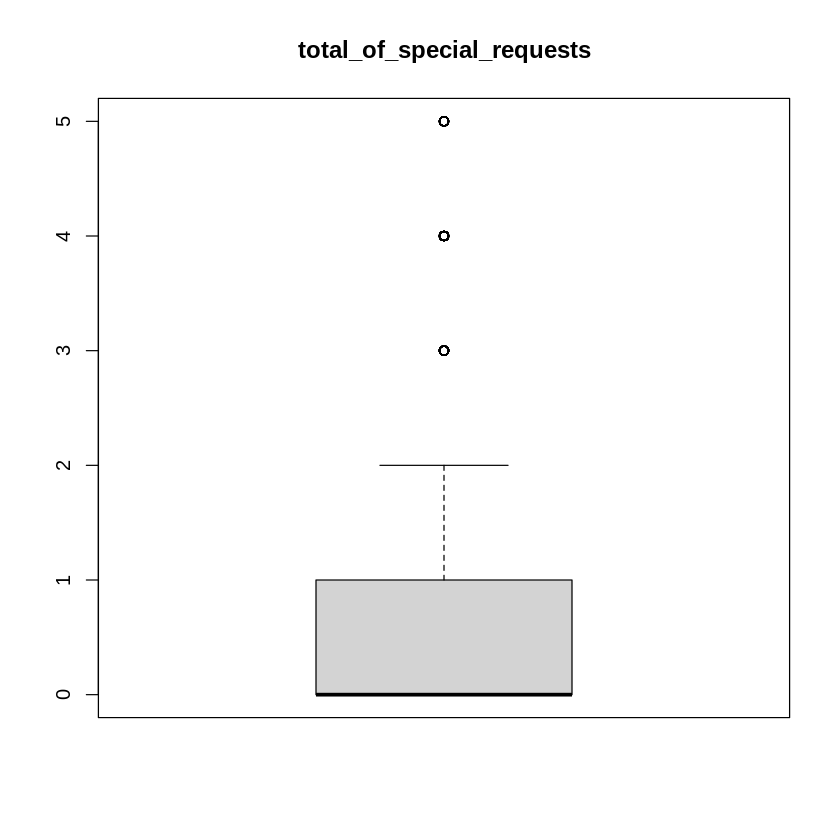

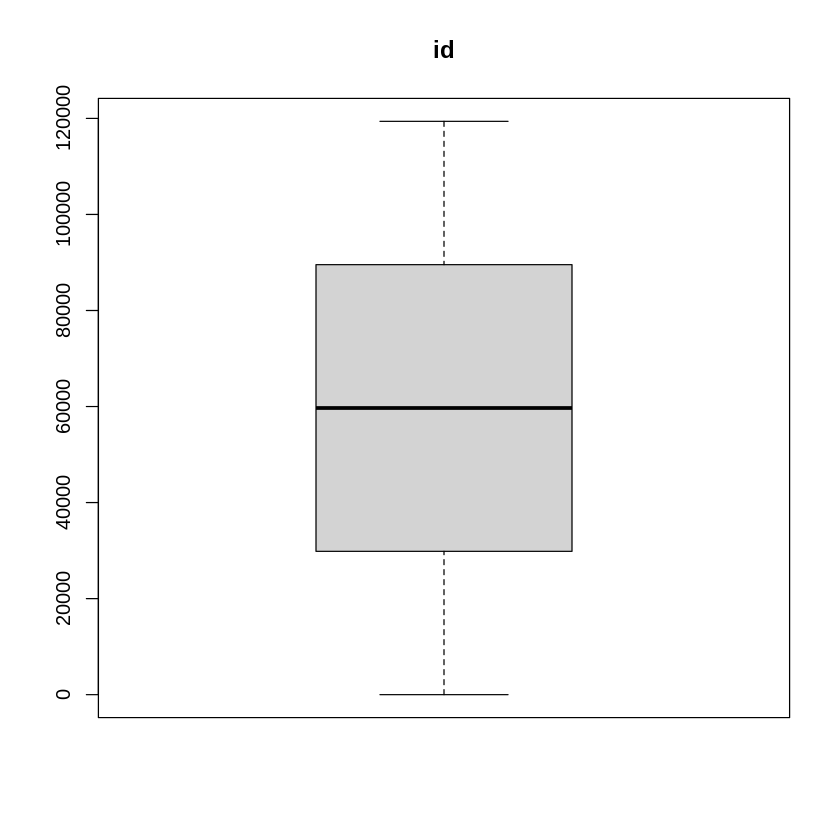

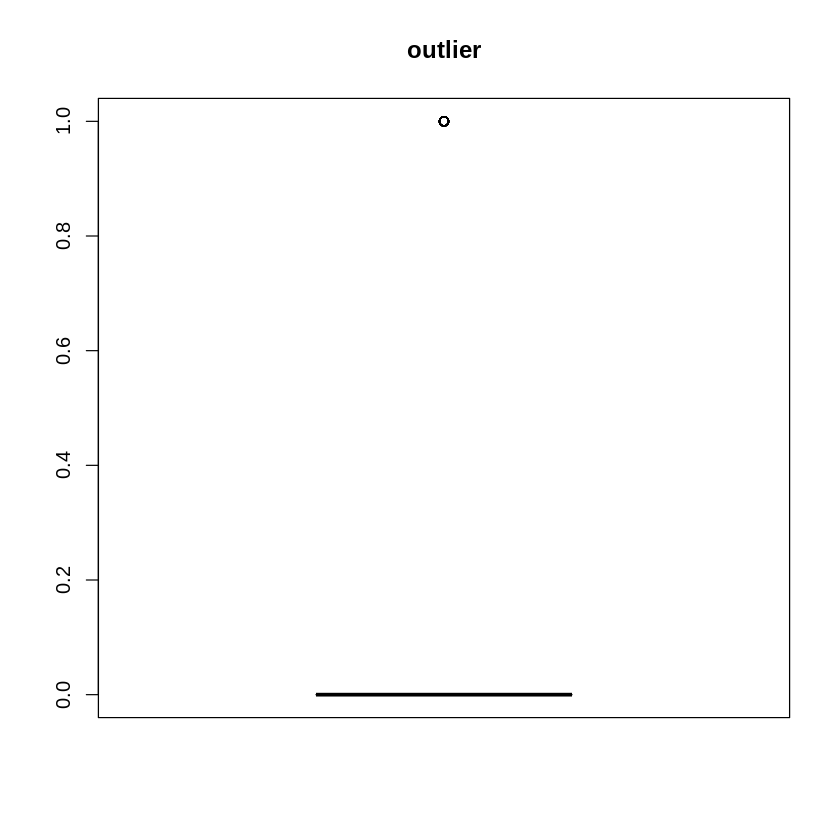

In [ ]:
#backup_hotel
numeric_cols <-backup_hotel[, sapply(backup_hotel, is.numeric)]

# Crear diagramas de caja para las columnas numéricas
boxplot(numeric_cols)
for (col in names(backup_hotel)) {
  if (is.numeric(backup_hotel[[col]])) {
    boxplot(backup_hotel[[col]], main = col)
  }
}

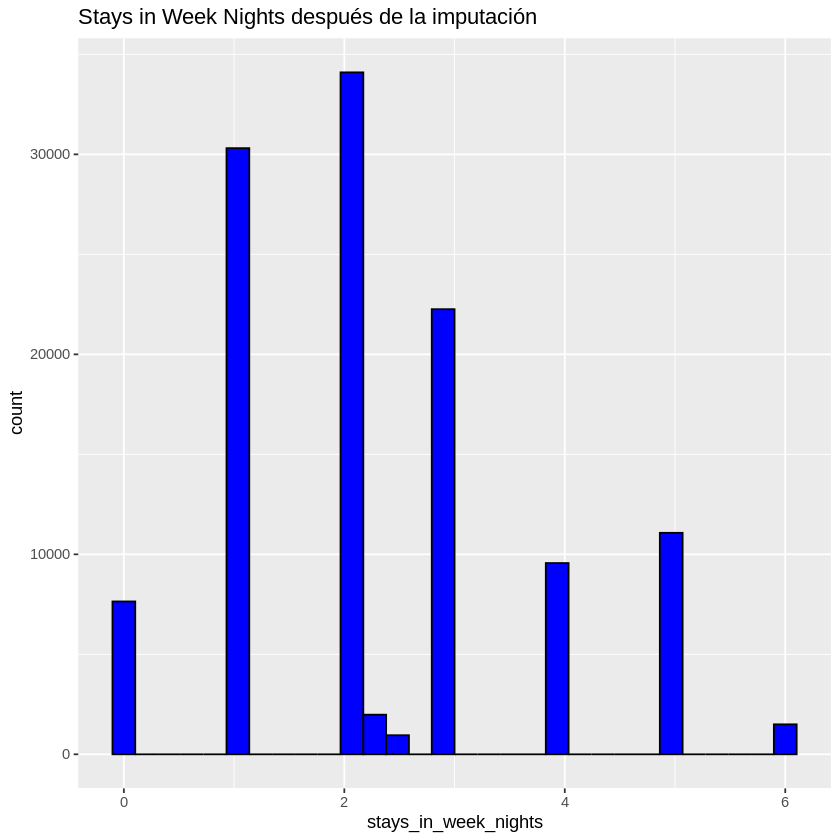

In [ ]:

# Cargando la librería necesaria para la visualización
library(ggplot2)

# Calculando IQR y definiendo outliers para 'stays_in_week_nights'
qnt <- quantile(backup_hotel$stays_in_week_nights, probs = c(0.25, 0.75), na.rm = TRUE)
iqr <- IQR(backup_hotel$stays_in_week_nights, na.rm = TRUE)
upper <- qnt[2] + 1.5 * iqr
lower <- qnt[1] - 1.5 * iqr

backup_hotel$outlier_stays <- ifelse(backup_hotel$stays_in_week_nights < lower | backup_hotel$stays_in_week_nights > upper, 1, 0)

# Crear modelo excluyendo outliers
model_stays <- lm(stays_in_week_nights ~ arrival_date_year + arrival_date_week_number, data = backup_hotel[backup_hotel$outlier_stays == 0, ])

# Predecir valores para los outliers
predicted_stays <- predict(model_stays, newdata = backup_hotel[backup_hotel$outlier_stays == 1, ])
backup_hotel$stays_in_week_nights[backup_hotel$outlier_stays == 1] <- predicted_stays

# Visualización para verificar la distribución después de la imputación
ggplot(backup_hotel, aes(x = stays_in_week_nights)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Stays in Week Nights después de la imputación")


##stays in weekend nights

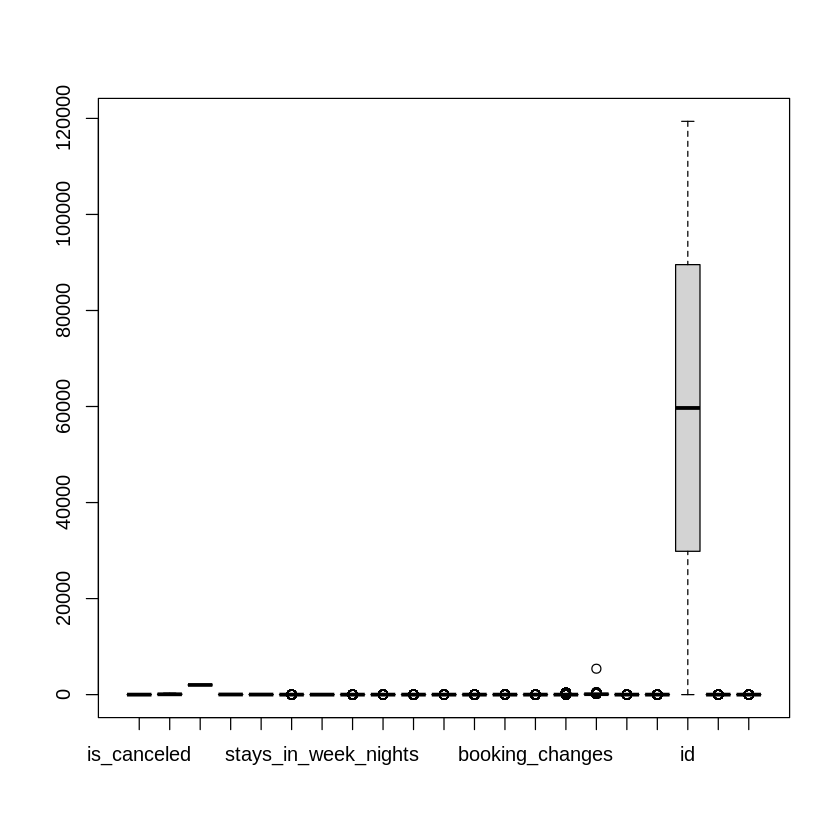

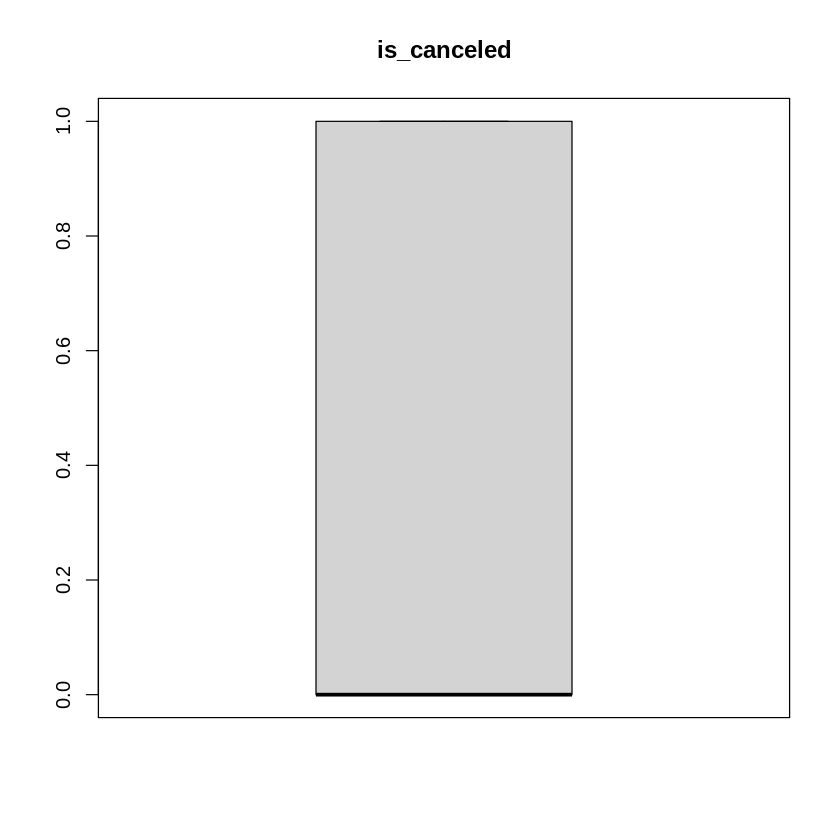

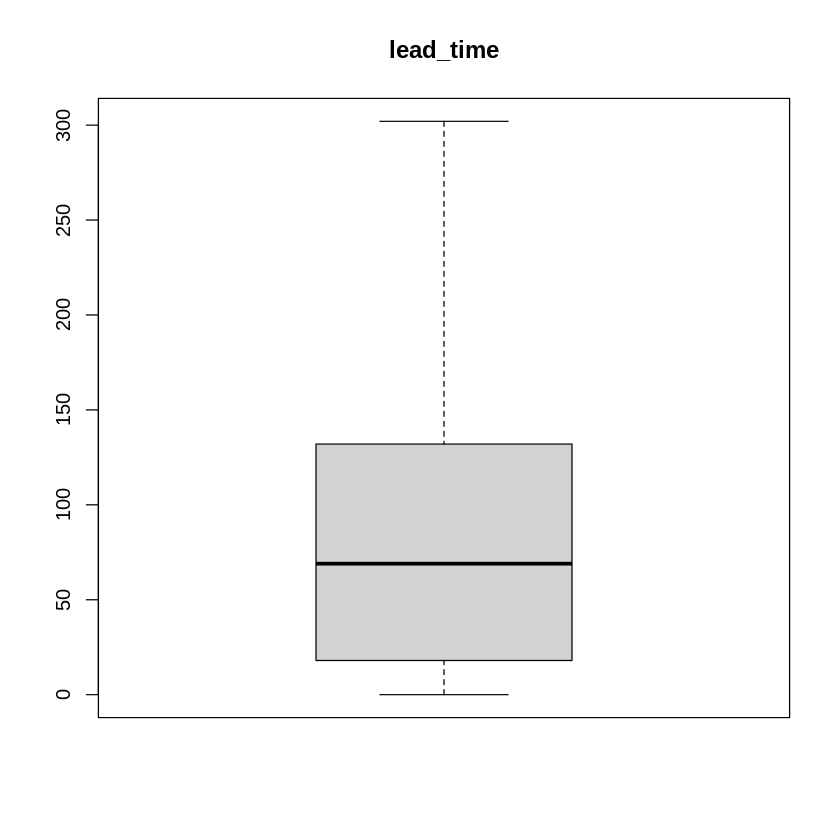

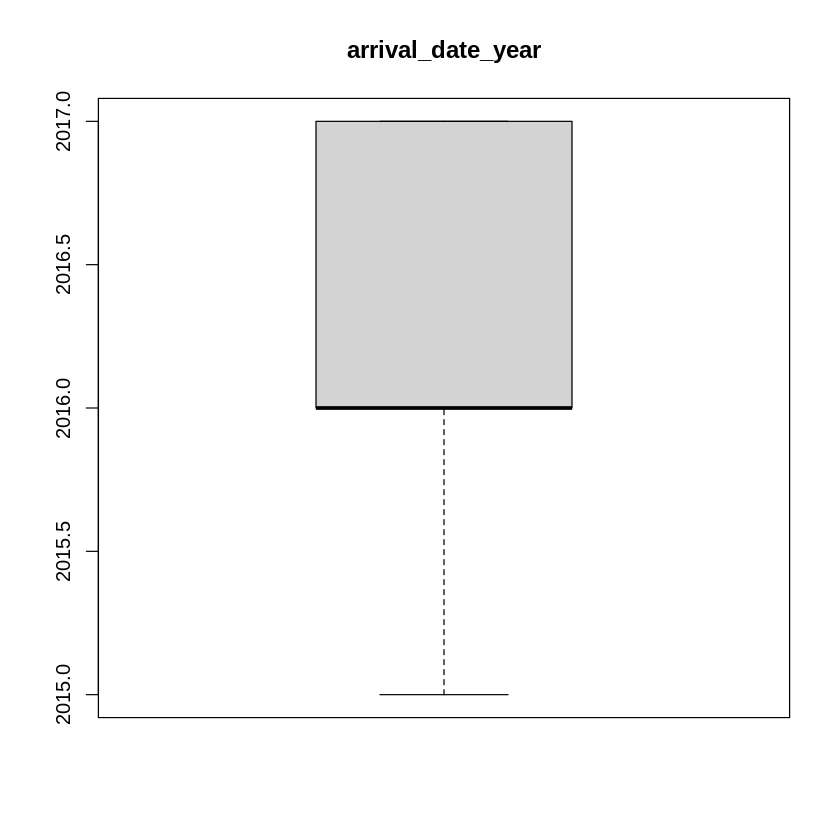

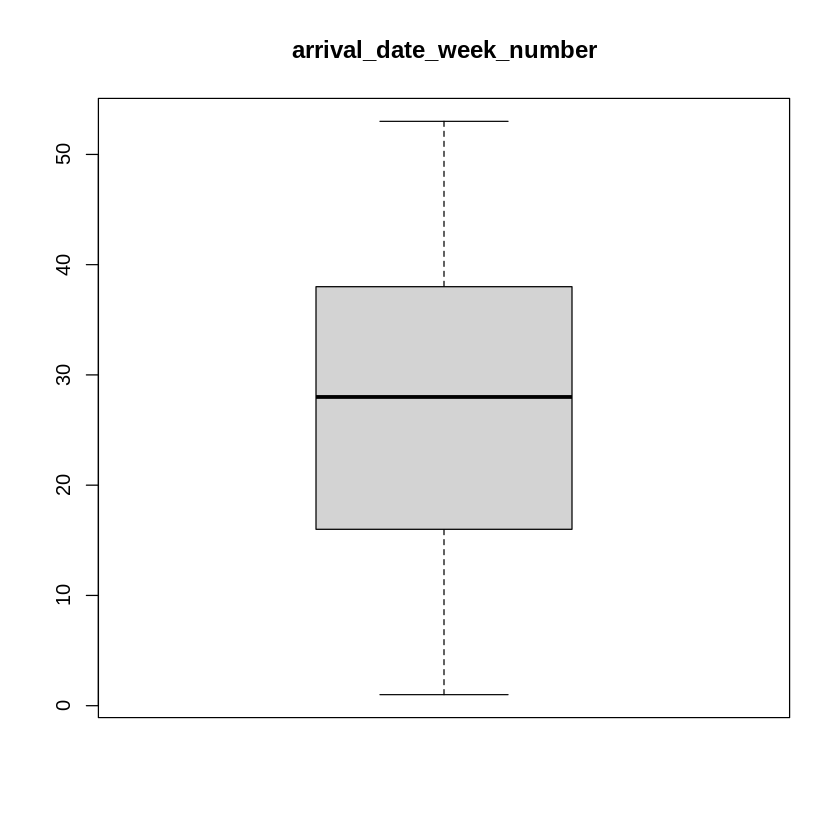

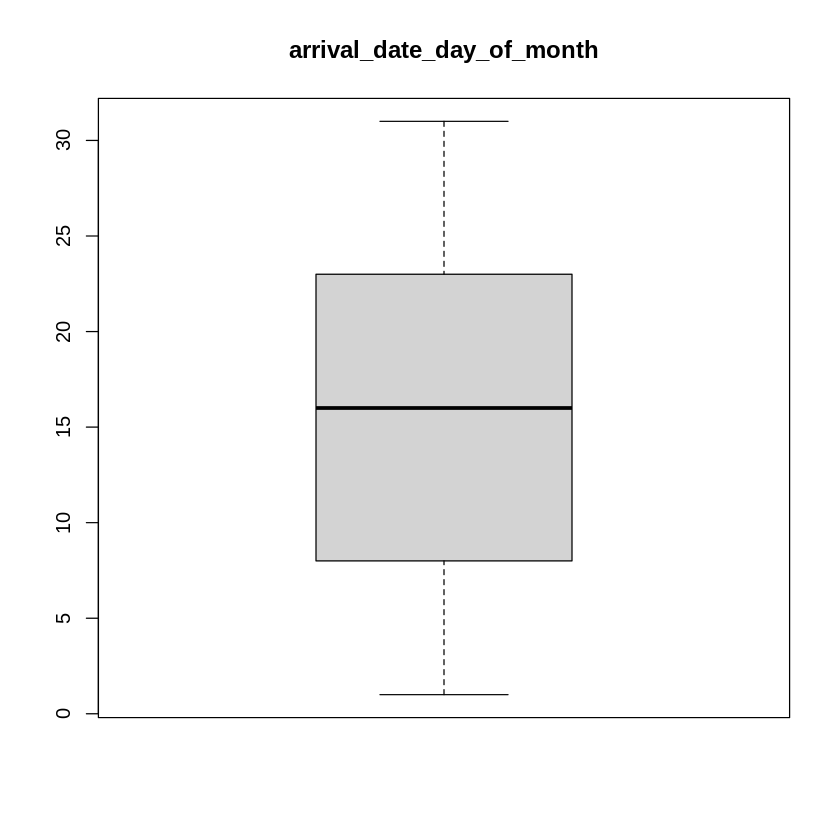

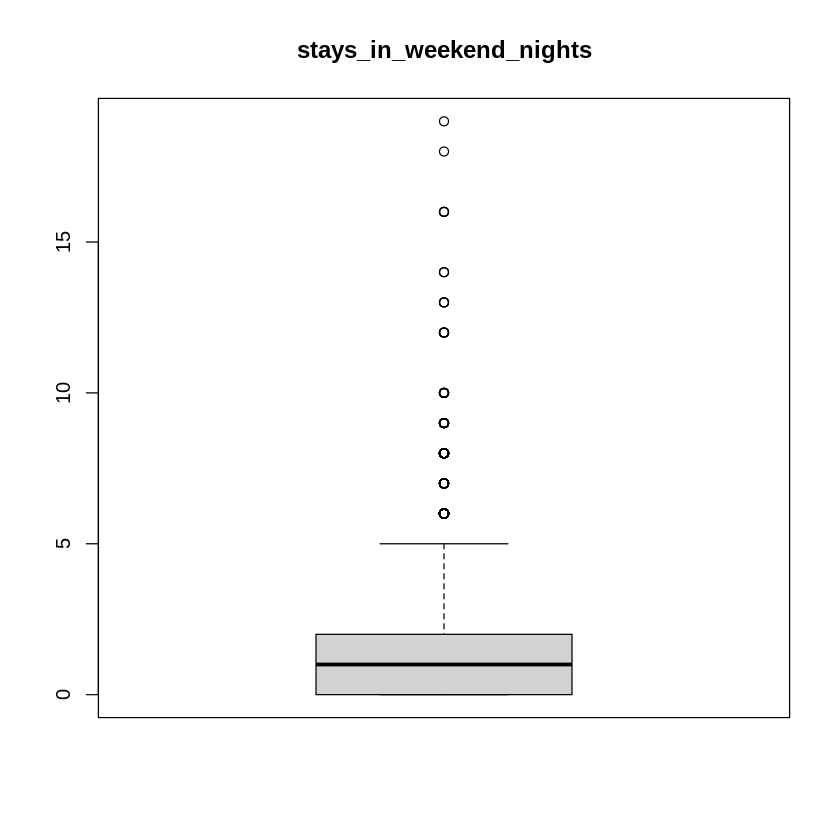

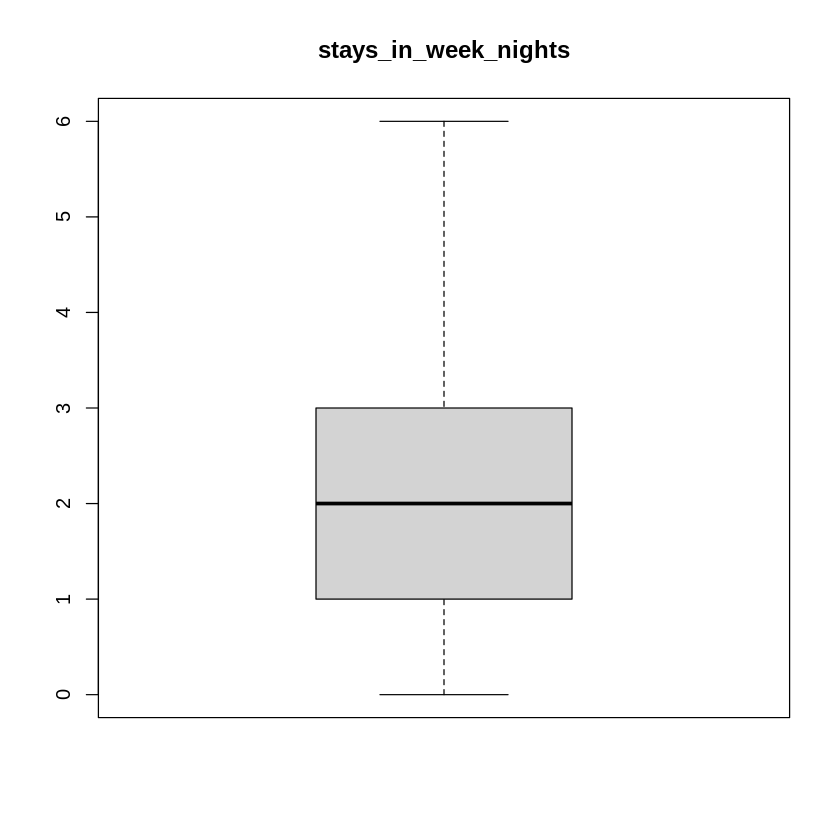

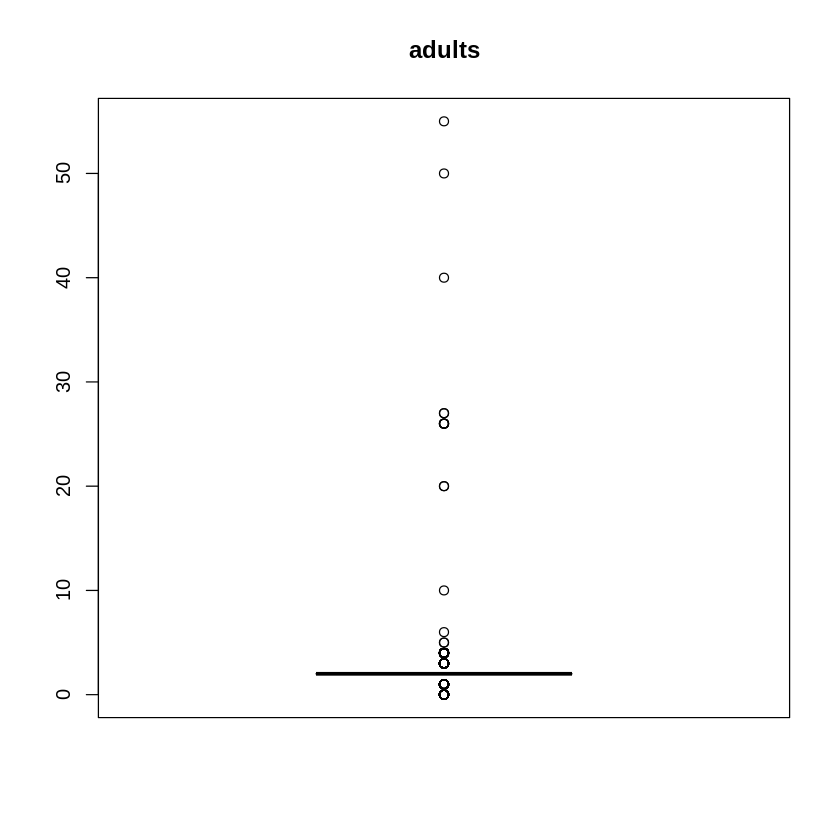

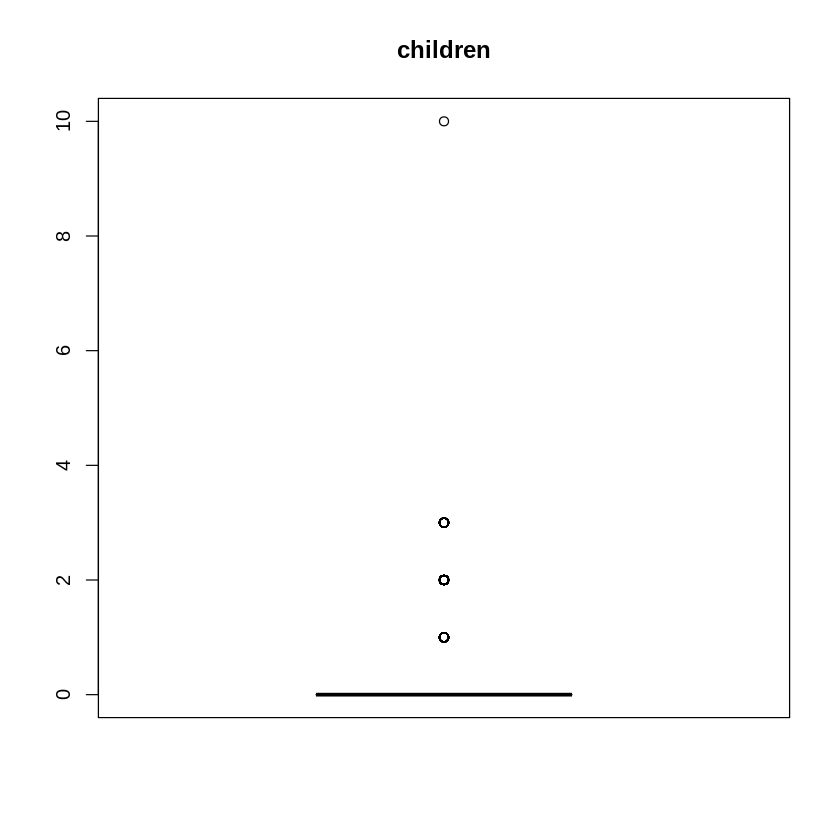

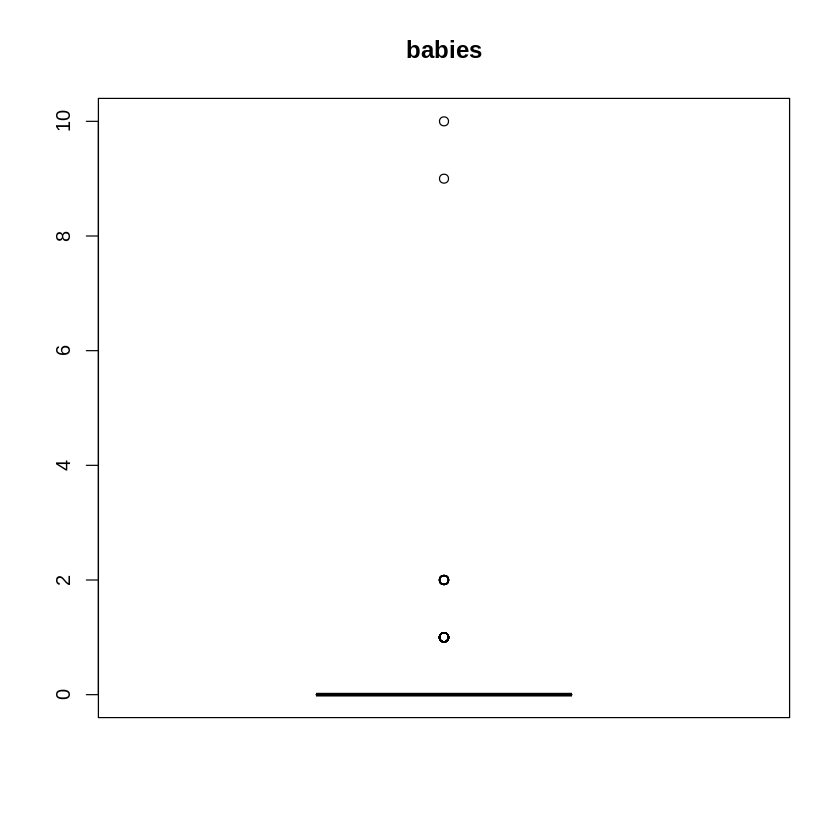

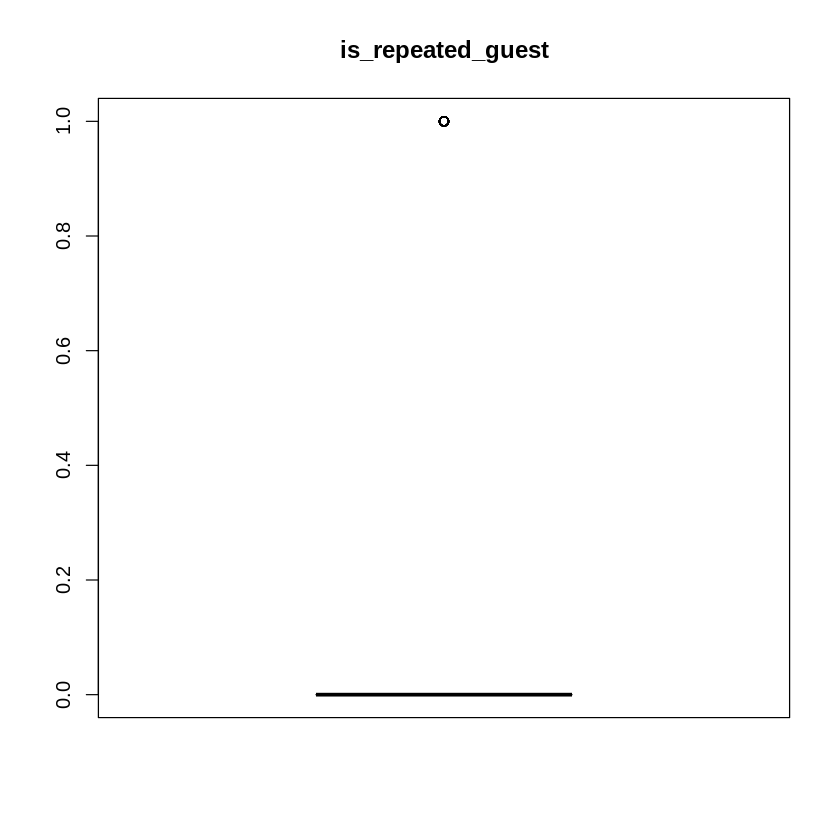

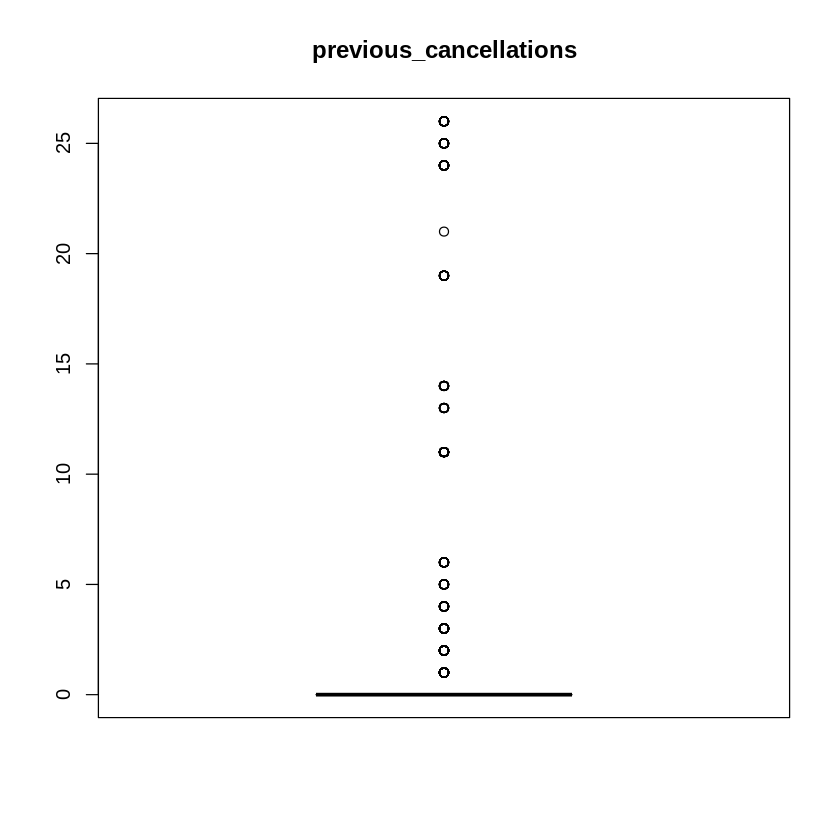

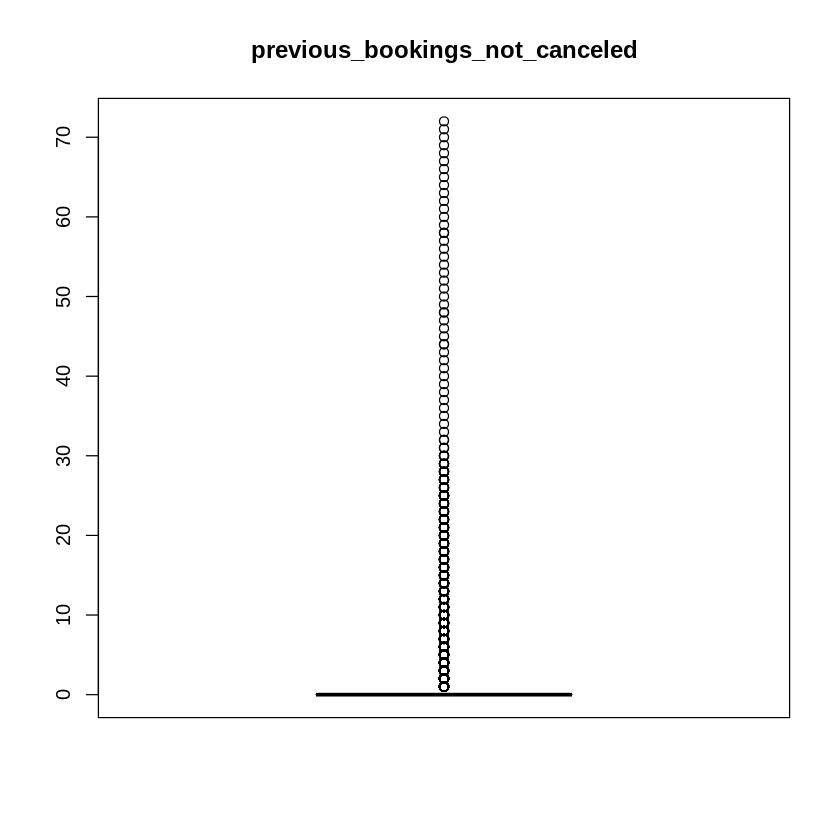

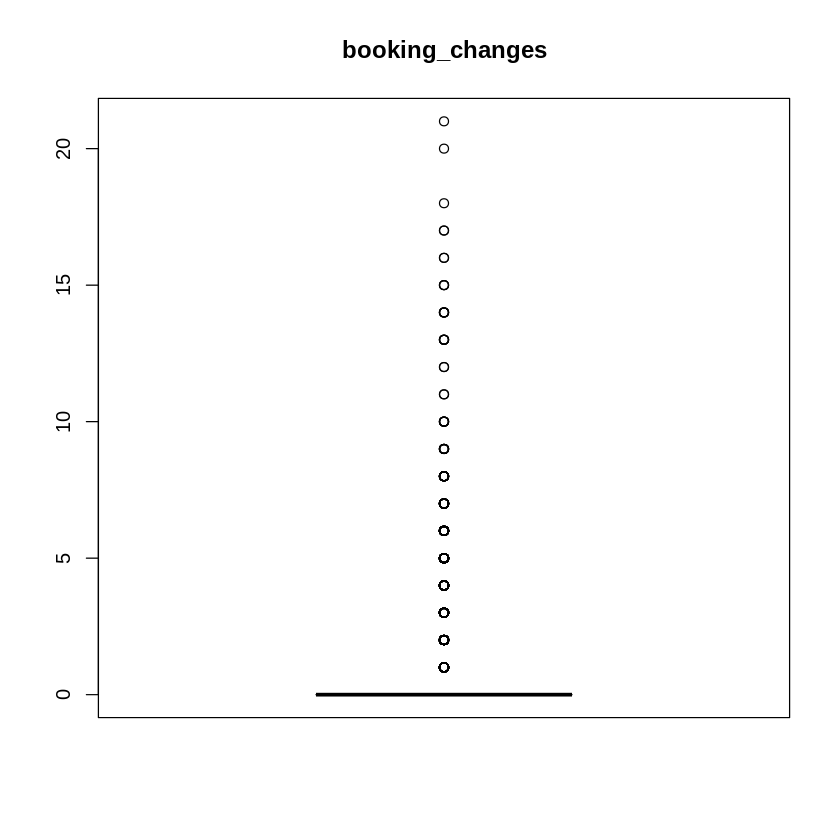

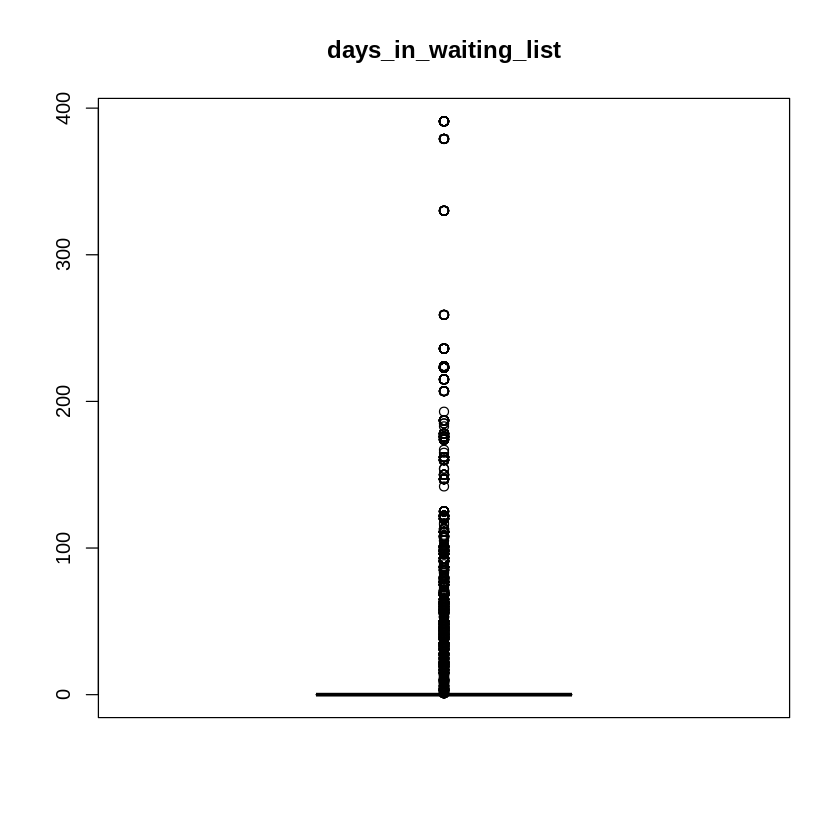

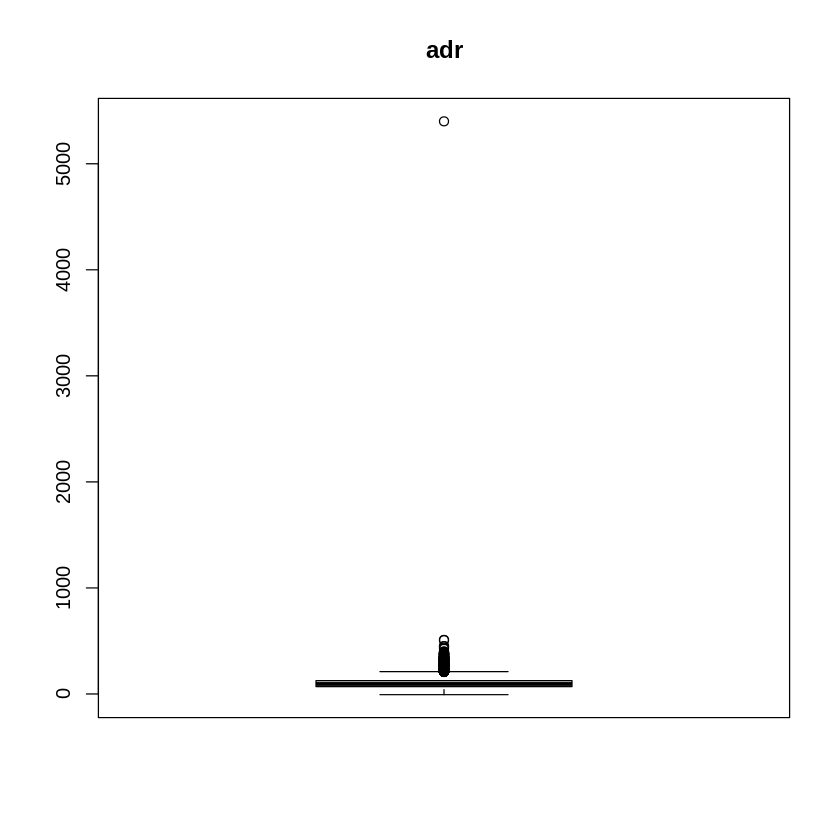

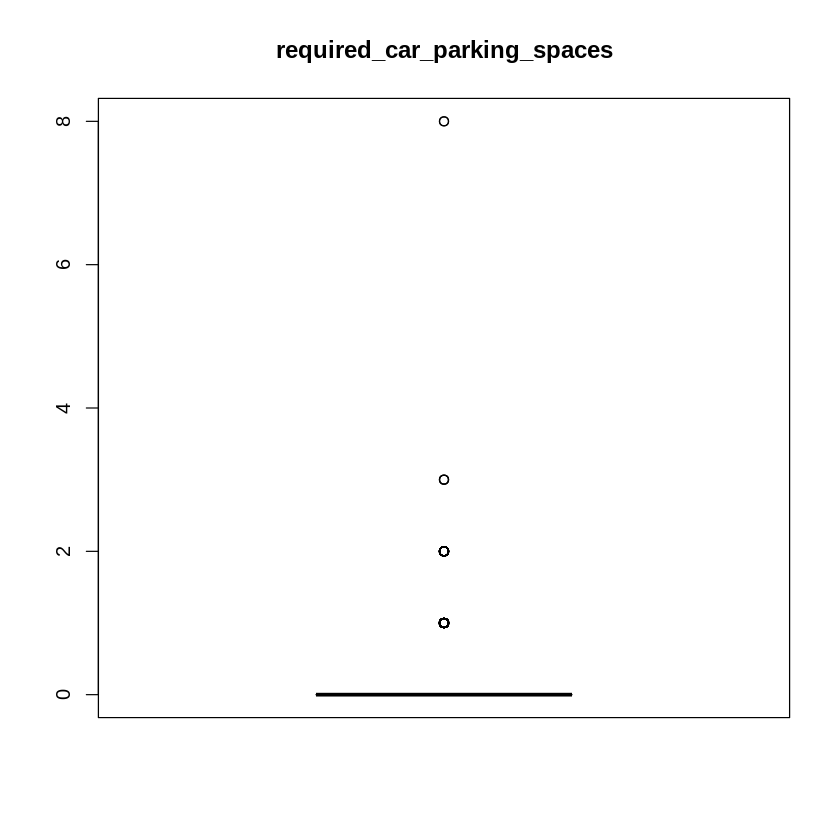

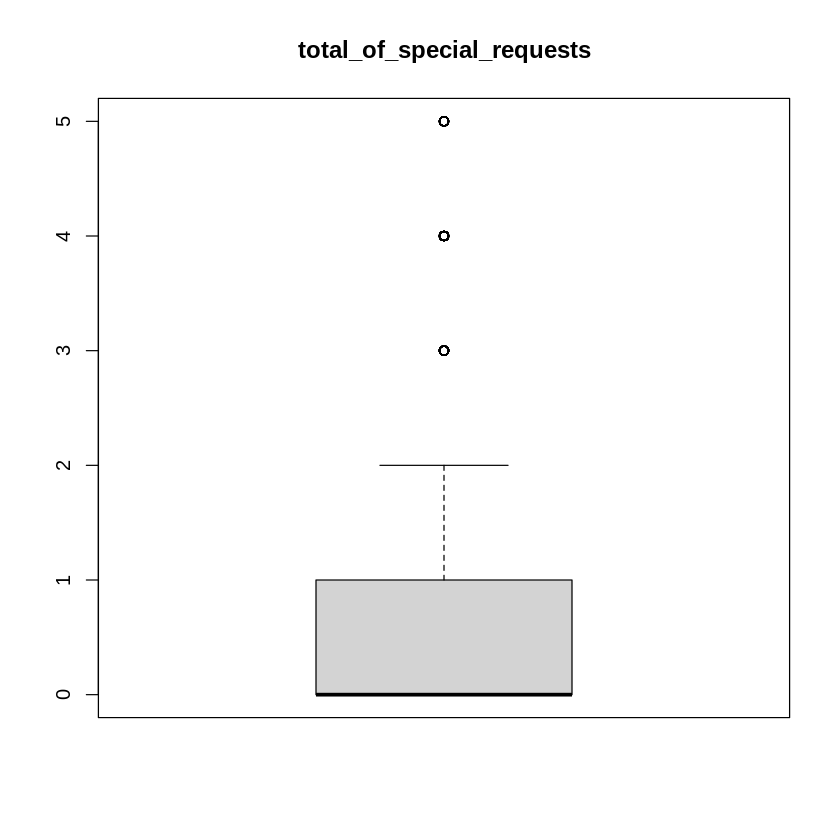

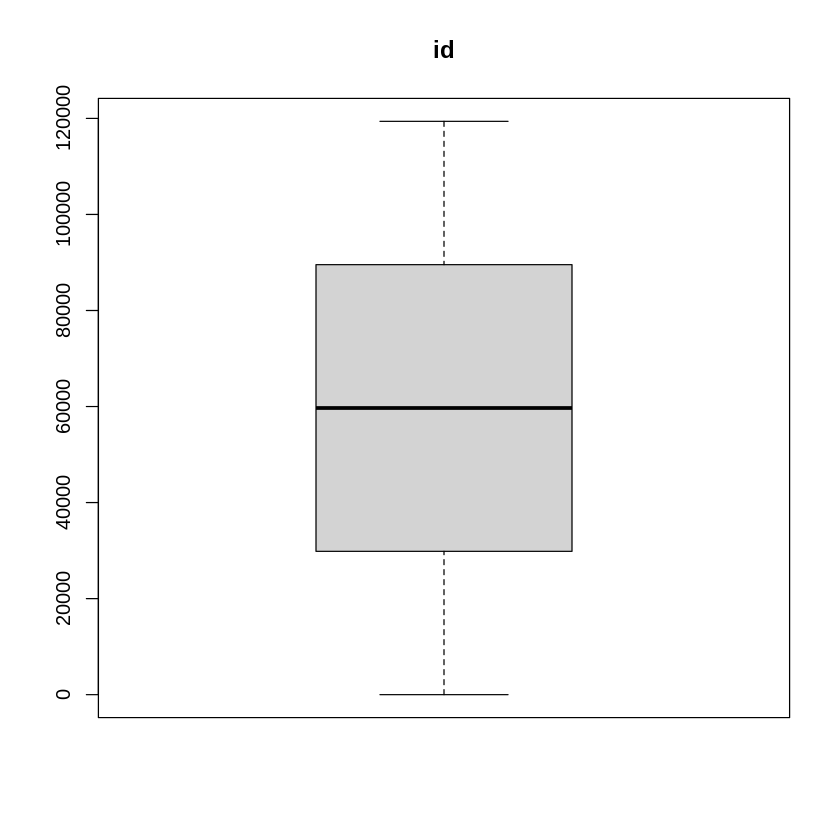

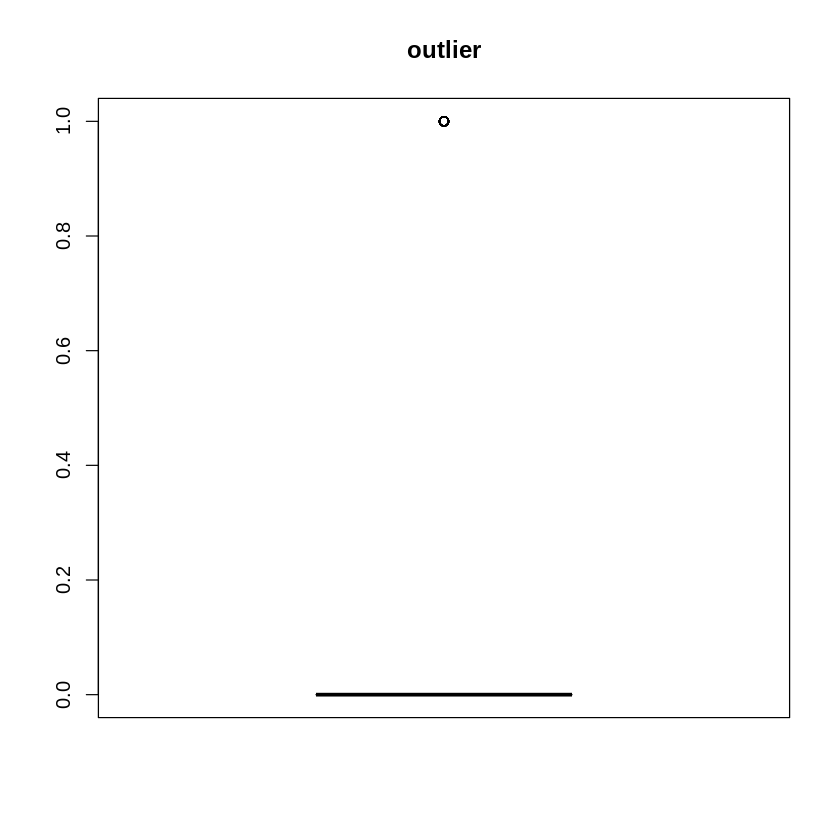

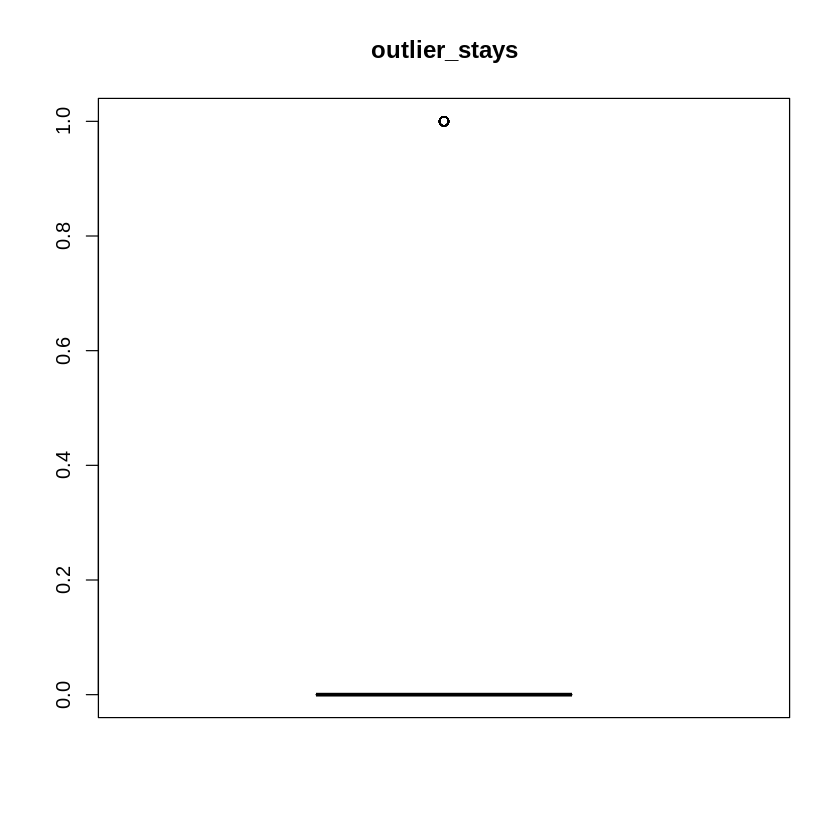

In [ ]:
#backup_hotel
numeric_cols <-backup_hotel[, sapply(backup_hotel, is.numeric)]

# Crear diagramas de caja para las columnas numéricas
boxplot(numeric_cols)
for (col in names(backup_hotel)) {
  if (is.numeric(backup_hotel[[col]])) {
    boxplot(backup_hotel[[col]], main = col)
  }
}

In [ ]:
# Calculando IQR y definiendo outliers
qnt <- quantile(backup_hotel$stays_in_weekend_nights, probs=c(.25, .75), na.rm = TRUE)
iqr <- IQR(backup_hotel$stays_in_weekend_nights, na.rm = TRUE)
upper <- qnt[2] + 1.5 * iqr
lower <- qnt[1] - 1.5 * iqr  # Generalmente será negativo o cero, dependiendo de los datos

backup_hotel$outlier_weekend <- ifelse(backup_hotel$stays_in_weekend_nights < lower | backup_hotel$stays_in_weekend_nights > upper, 1, 0)

# Crear modelo excluyendo outliers
model_weekend <- lm(stays_in_weekend_nights ~ arrival_date_year + arrival_date_month, data = backup_hotel[backup_hotel$outlier_weekend == 0, ])

# Predecir valores para los outliers
predicted_values_weekend <- predict(model_weekend, newdata = backup_hotel[backup_hotel$outlier_weekend == 1, ])
backup_hotel$stays_in_weekend_nights[backup_hotel$outlier_weekend == 1] <- predicted_values_weekend

##booking_changes

In [ ]:
#backup_hotel <- new_hotel
## Calculando el IQR y definiendo outliers para booking_changes
#qnt_changes <- quantile(backup_hotel$booking_changes, probs = c(0.25, 0.75), na.rm = TRUE)
#iqr_changes <- IQR(backup_hotel$booking_changes, na.rm = TRUE)
#upper_changes <- qnt_changes[2] + 1.5 * iqr_changes
#
#backup_hotel$outlier_changes <- ifelse(backup_hotel$booking_changes > upper_changes, 1, 0)
#
## Crear modelo de regresión lineal excluyendo outliers
#model_changes <- lm(booking_changes ~ arrival_date_year + total_of_special_requests, data = backup_hotel[backup_hotel$outlier_changes == 0, ])
#
## Predecir valores para los outliers
#predicted_values_changes <- predict(model_changes, newdata = backup_hotel[backup_hotel$outlier_changes == 1, ])
#backup_hotel$booking_changes[backup_hotel$outlier_changes == 1] <- predicted_values_changes
#
## Opcional: Visualización para verificar la distribución después de la imputación
#library(ggplot2)
#ggplot(backup_hotel, aes(x = booking_changes)) +
#  geom_histogram(bins = 30, fill = "blue", color = "black") +
#  ggtitle("Booking Changes después de la imputación")
#

##days_in_waiting_list

In [ ]:
#backup_hotel <- new_hotel
## Calculando el IQR y definiendo outliers para days_in_waiting_list
#qnt_waiting <- quantile(backup_hotel$days_in_waiting_list, probs = c(0.25, 0.75), na.rm = TRUE)
#iqr_waiting <- IQR(backup_hotel$days_in_waiting_list, na.rm = TRUE)
#upper_waiting <- qnt_waiting[2] + 1.5 * iqr_waiting
#
#backup_hotel$outlier_waiting <- ifelse(backup_hotel$days_in_waiting_list > upper_waiting, 1, 0)
#
## Crear modelo de regresión lineal excluyendo outliers
#model_waiting <- lm(days_in_waiting_list ~ arrival_date_year + total_of_special_requests, data = backup_hotel[backup_hotel$outlier_waiting == 0, ])
#
## Predecir valores para los outliers
#predicted_values_waiting <- predict(model_waiting, newdata = backup_hotel[backup_hotel$outlier_waiting == 1, ])
#backup_hotel$days_in_waiting_list[backup_hotel$outlier_waiting == 1] <- predicted_values_waiting
#
## Opcional: Visualización para verificar la distribución después de la imputación
#library(ggplot2)
#ggplot(backup_hotel, aes(x = days_in_waiting_list)) +
#  geom_histogram(bins = 30, fill = "blue", color = "black") +
#  ggtitle("Days in Waiting List después de la imputación")
#

##Previus cancelations


In [ ]:
#qnt <- quantile(backup_hotel$previous_cancellations, probs=c(.25, .75), na.rm = TRUE)
#iqr <- IQR(backup_hotel$previous_cancellations, na.rm = TRUE)
#upper <- qnt[2] + 1.5 * iqr
#lower <- qnt[1] - 1.5 * iqr
#
#backup_hotel$outlier_cancellations <- ifelse(backup_hotel$previous_cancellations > upper, 1, 0)
#
#model_cancellations <- lm(previous_cancellations ~ arrival_date_year + arrival_date_month, data = backup_hotel[backup_hotel$outlier_cancellations == 0, ])
#
#predicted_values_cancellations <- predict(model_cancellations, newdata = backup_hotel[backup_hotel$outlier_cancellations == 1, ])
#backup_hotel$previous_cancellations[backup_hotel$outlier_cancellations == 1] <- predicted_values_cancellations


##previous_bookings_not_canceled

In [ ]:
#backup_hotel <- new_hotel
## Calculando IQR y definiendo outliers
#qnt <- quantile(backup_hotel$previous_bookings_not_canceled, probs=c(.25, .75), na.rm = TRUE)
#iqr <- IQR(backup_hotel$previous_bookings_not_canceled, na.rm = TRUE)
#upper <- qnt[2] + 1.5 * iqr  # Usamos solo el límite superior
#lower <- qnt[1] - 1.5 * iqr  # No es necesario ya que valores negativos no son posibles
#
#backup_hotel$outlier_prev_bookings <- ifelse(backup_hotel$previous_bookings_not_canceled > upper, 1, 0)
#
## Crear modelo excluyendo outliers
#model_prev_bookings <- lm(previous_bookings_not_canceled ~ arrival_date_year + arrival_date_month, data = backup_hotel[backup_hotel$outlier_prev_bookings == 0, ])
#
## Predecir valores para los outliers
#predicted_values_prev_bookings <- predict(model_prev_bookings, newdata = backup_hotel[backup_hotel$outlier_prev_bookings == 1, ])
#backup_hotel$previous_bookings_not_canceled[backup_hotel$outlier_prev_bookings == 1] <- predicted_values_prev_bookings


##adr

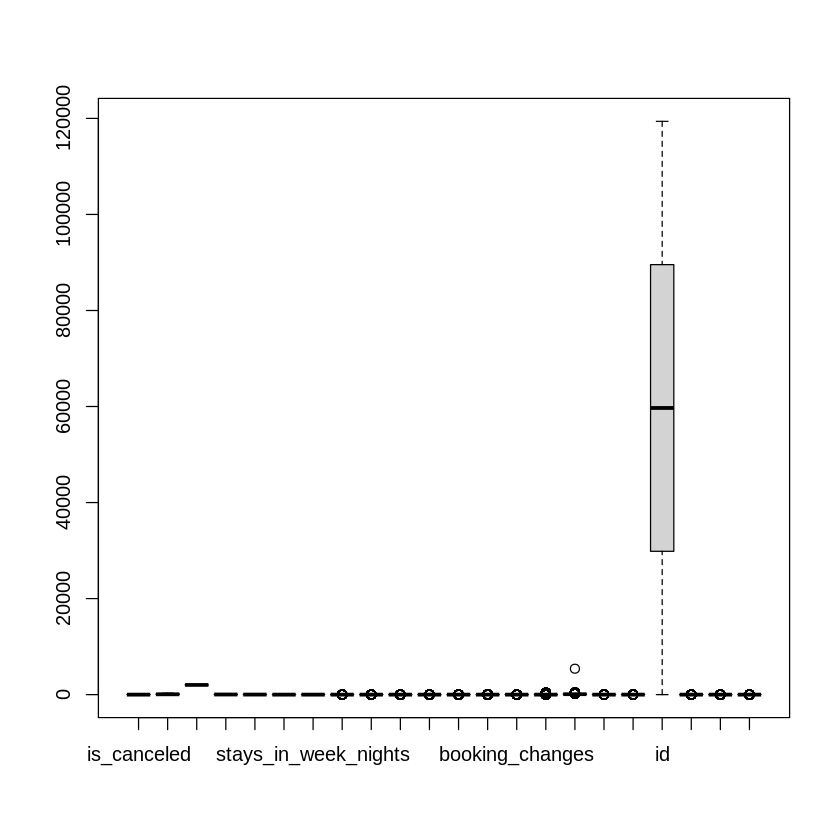

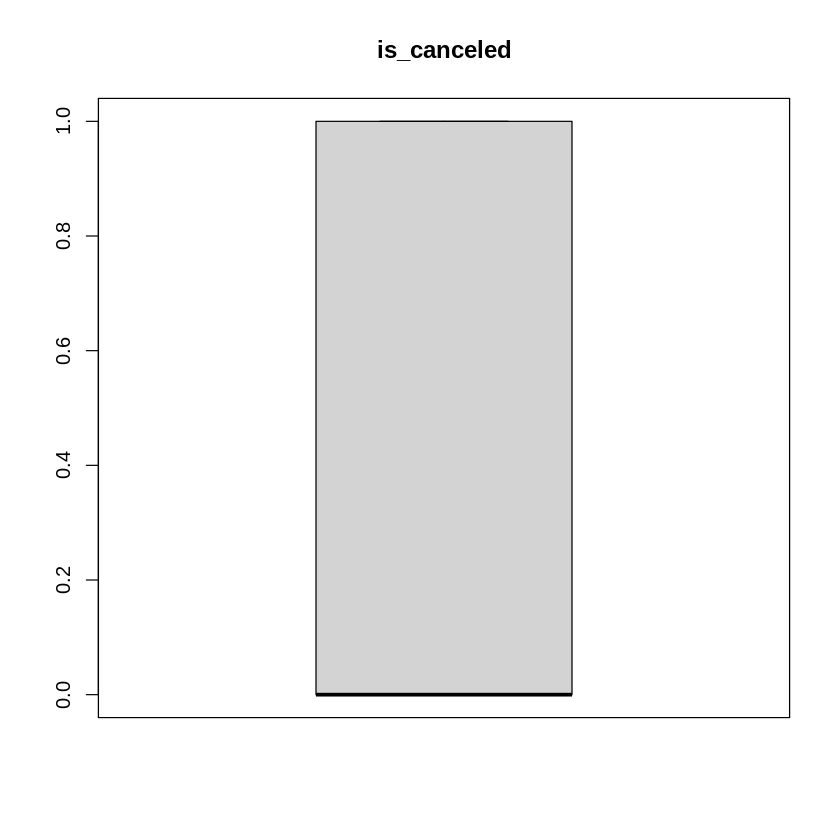

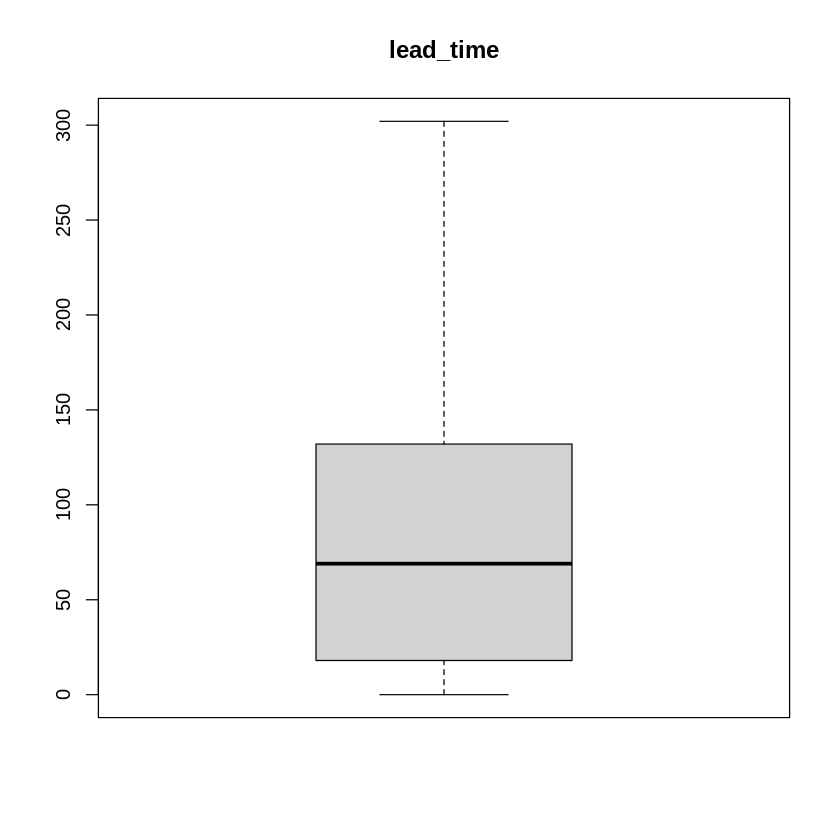

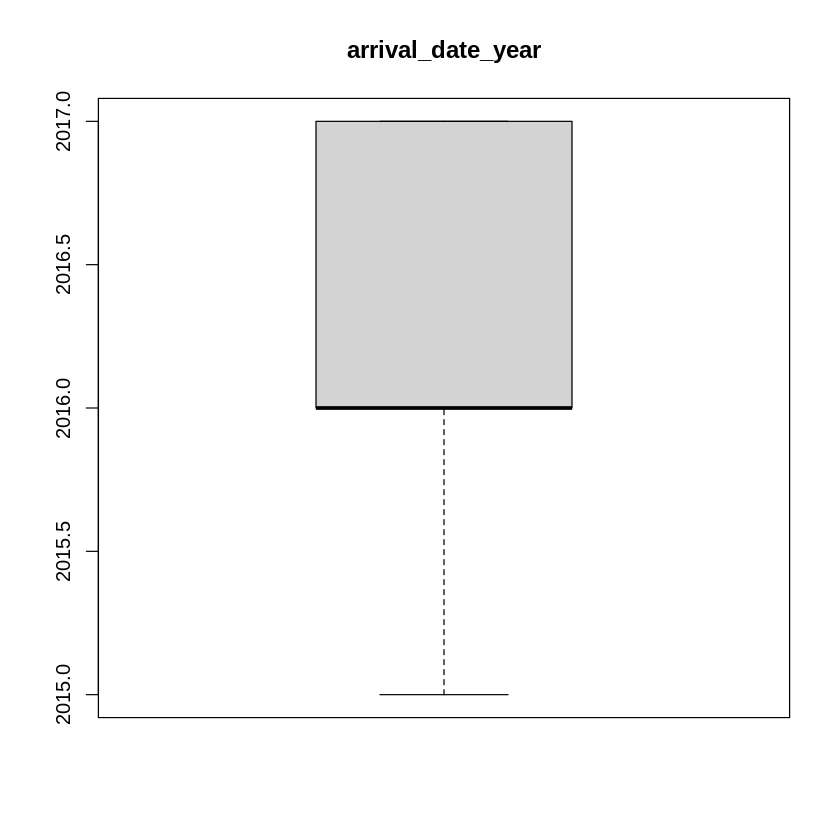

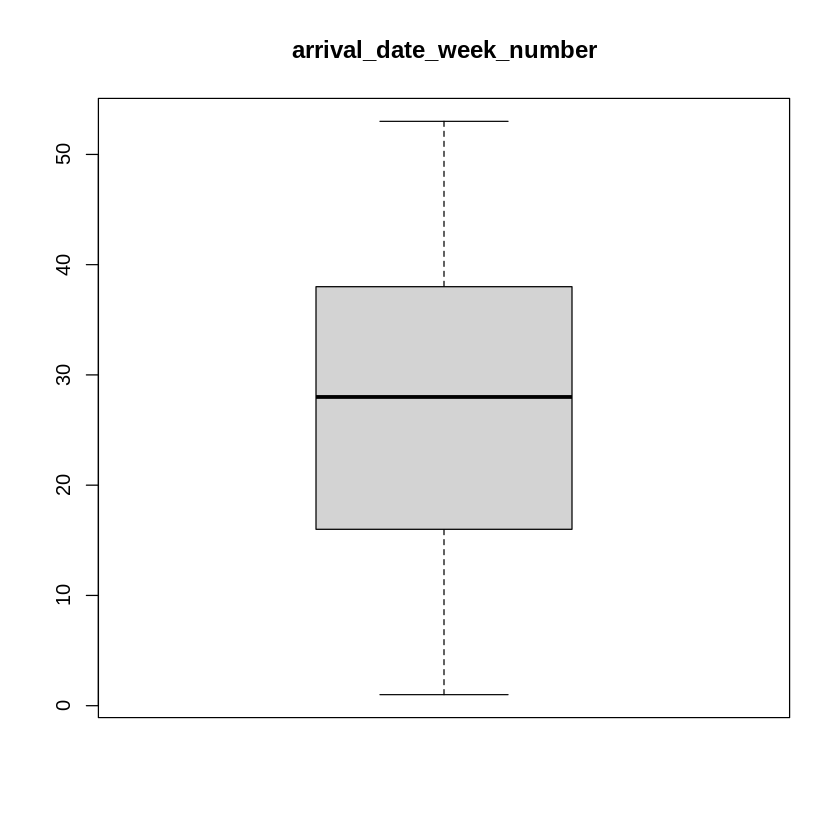

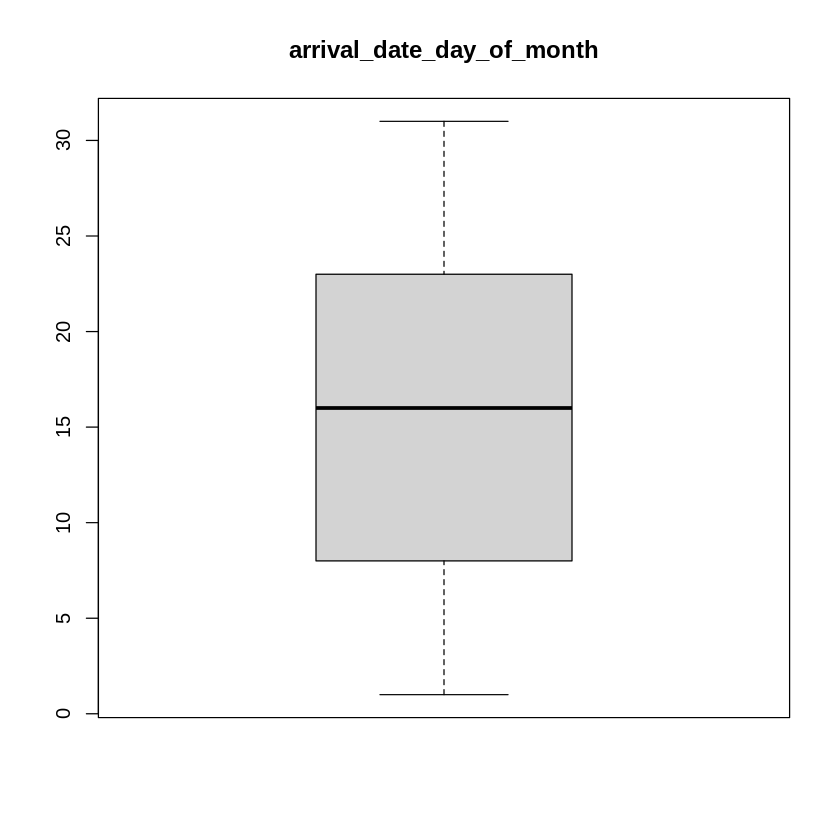

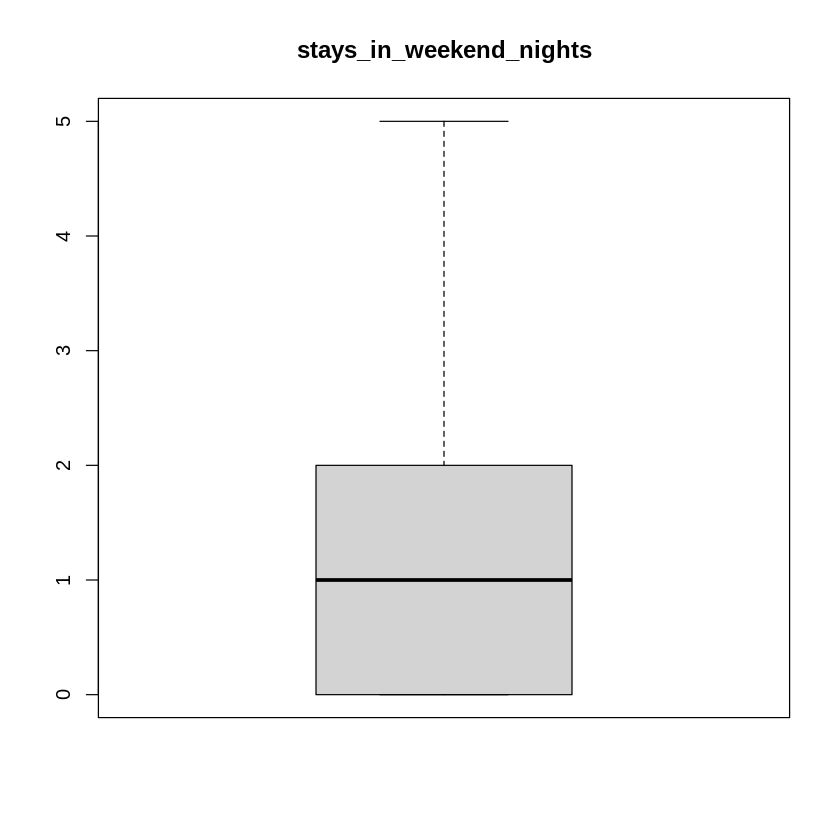

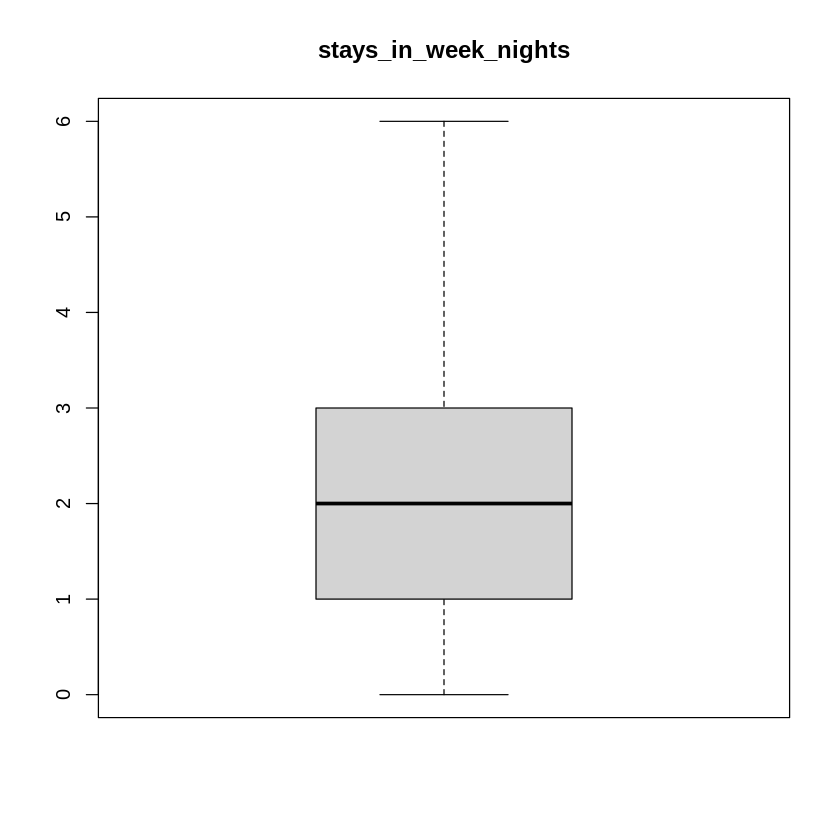

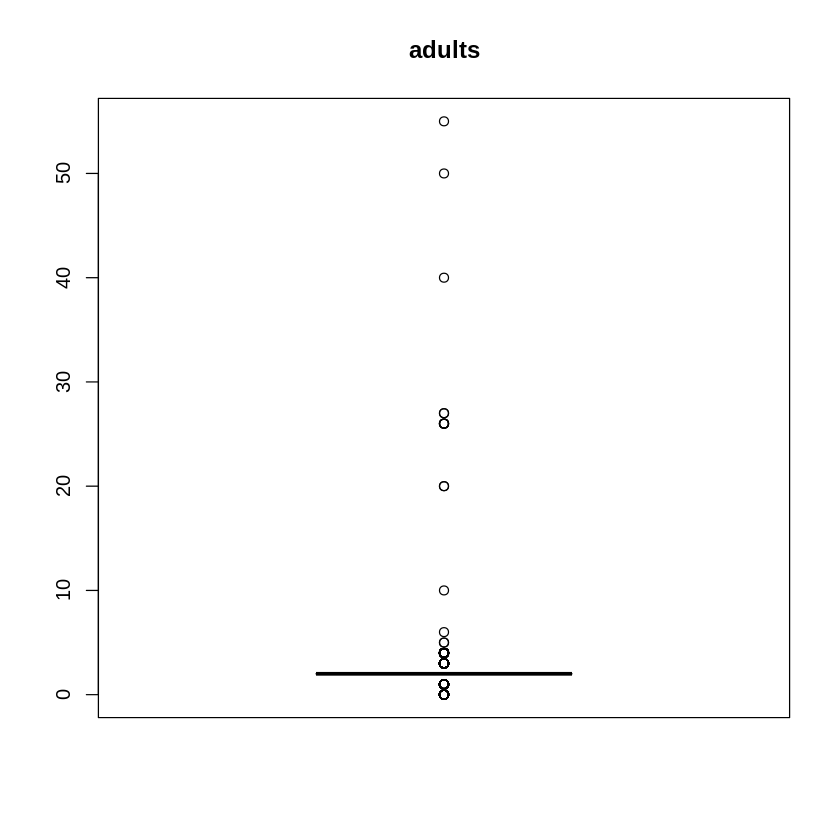

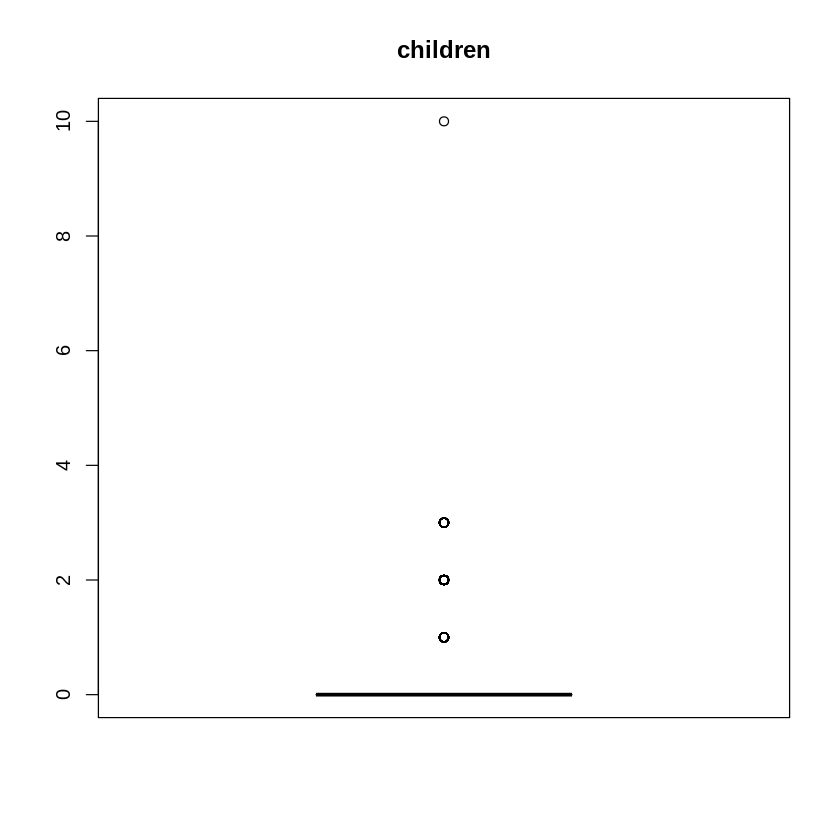

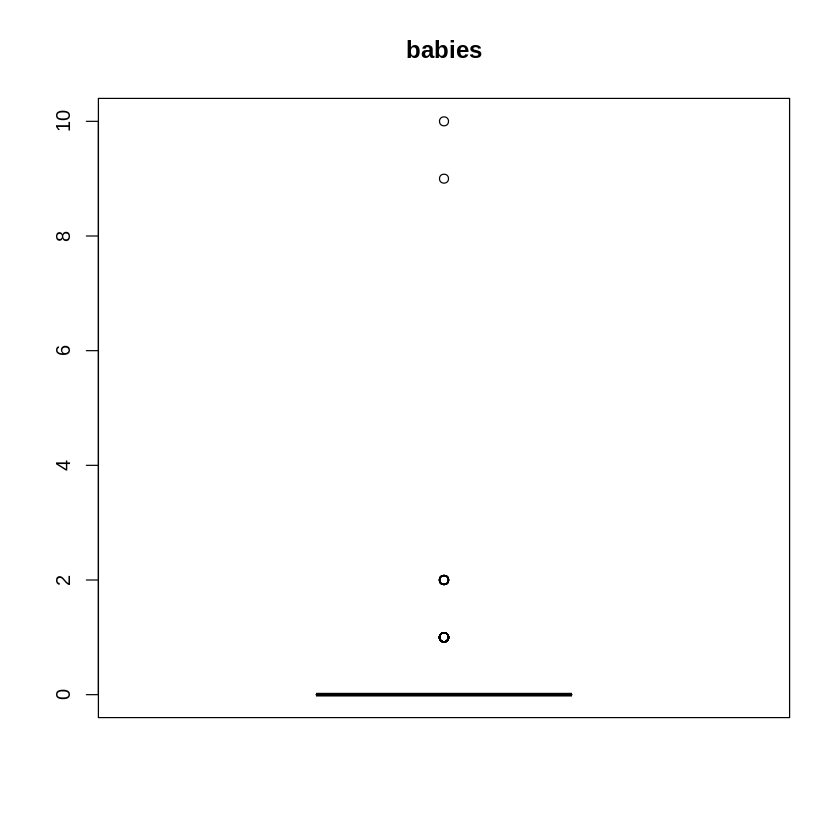

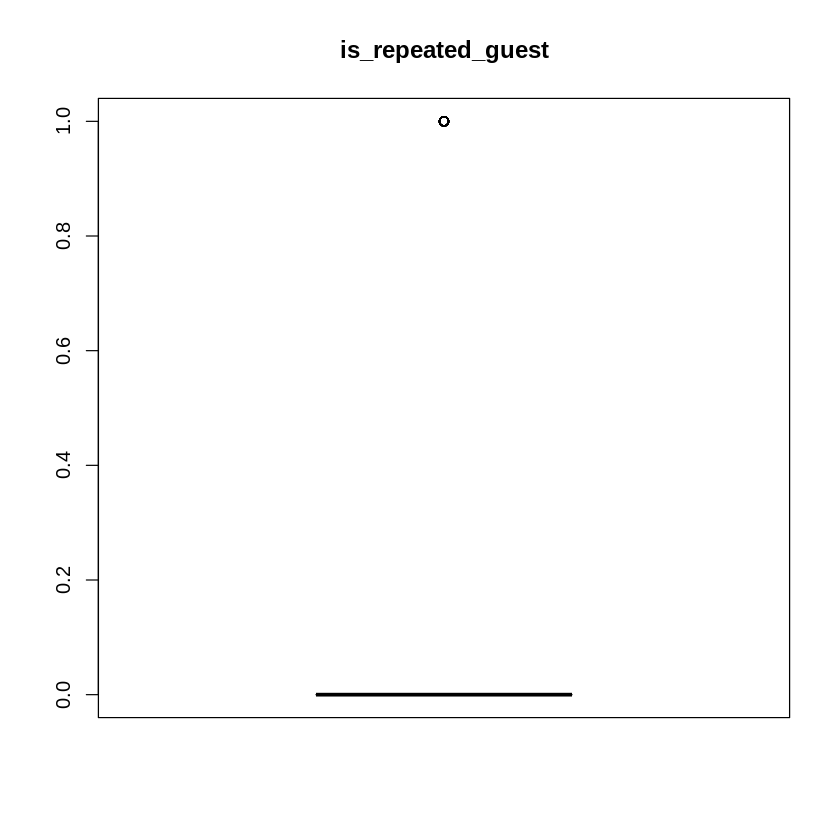

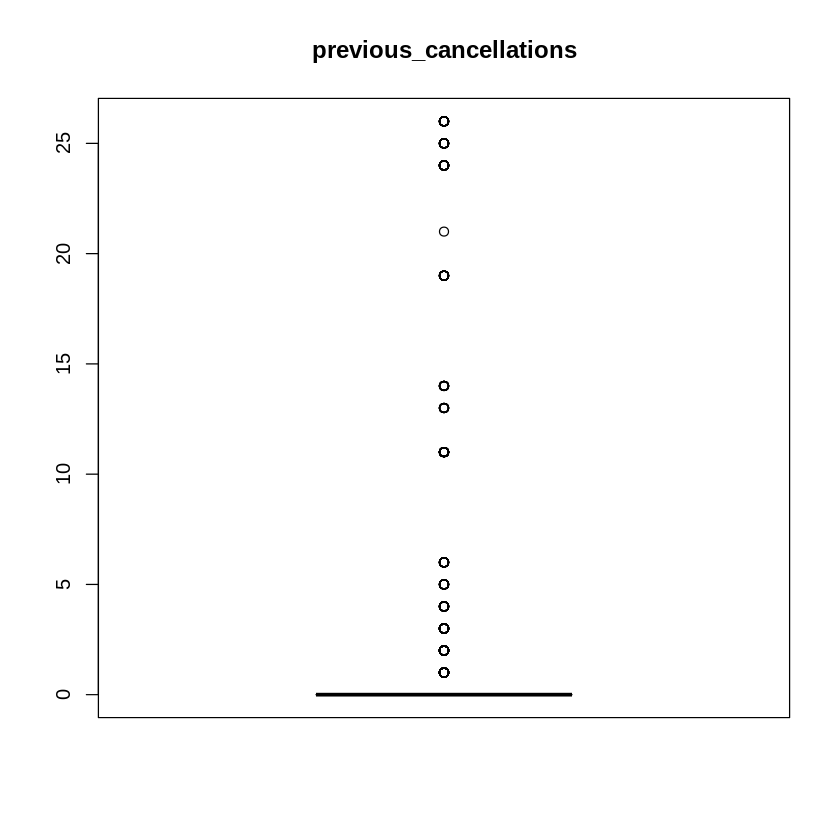

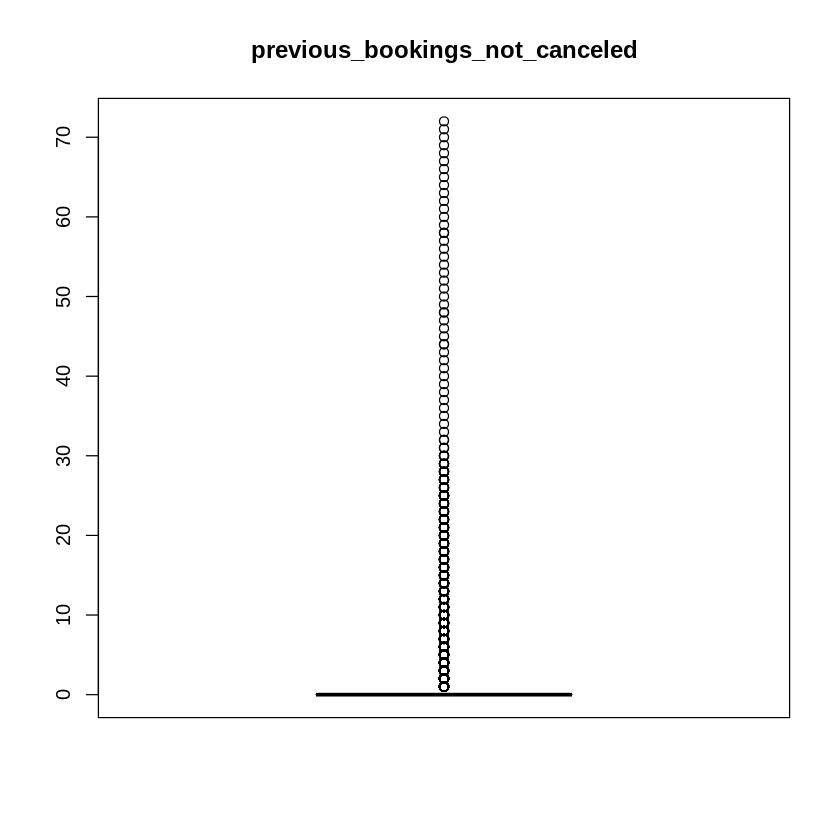

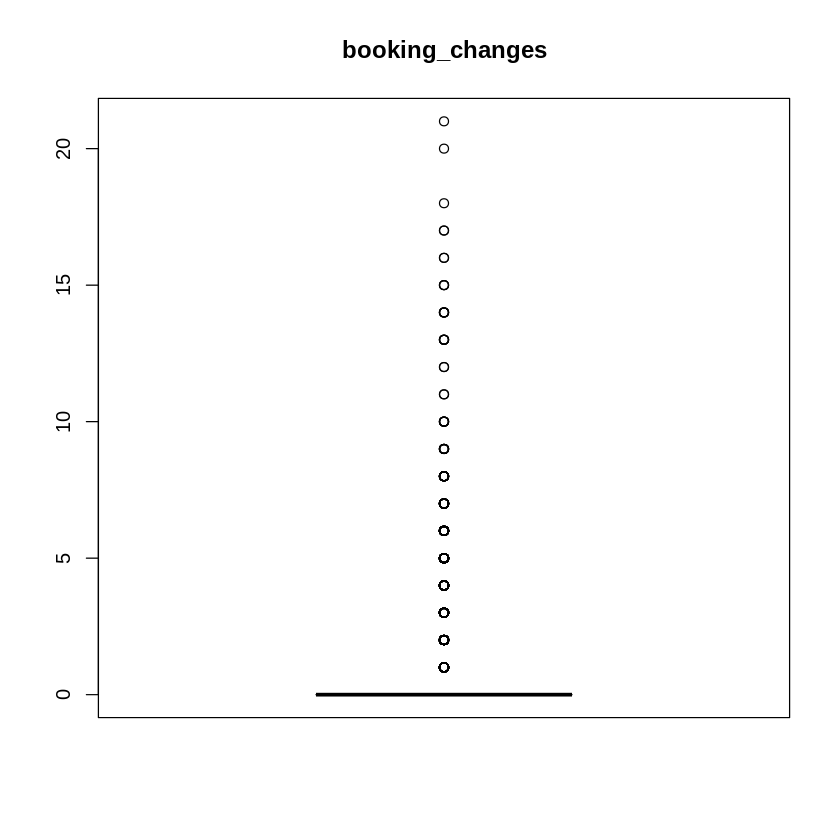

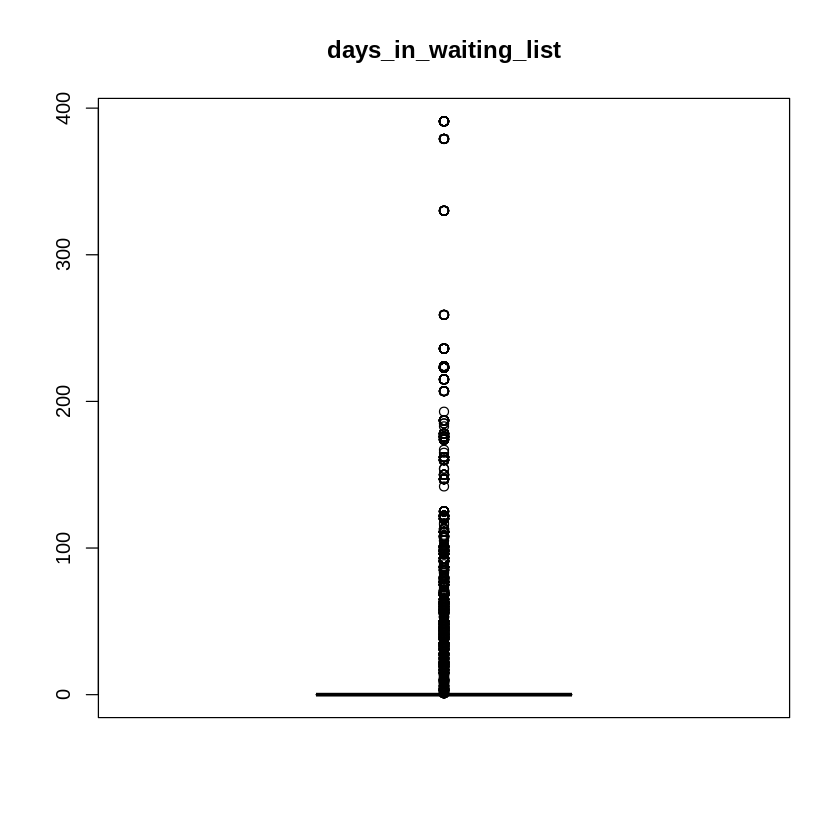

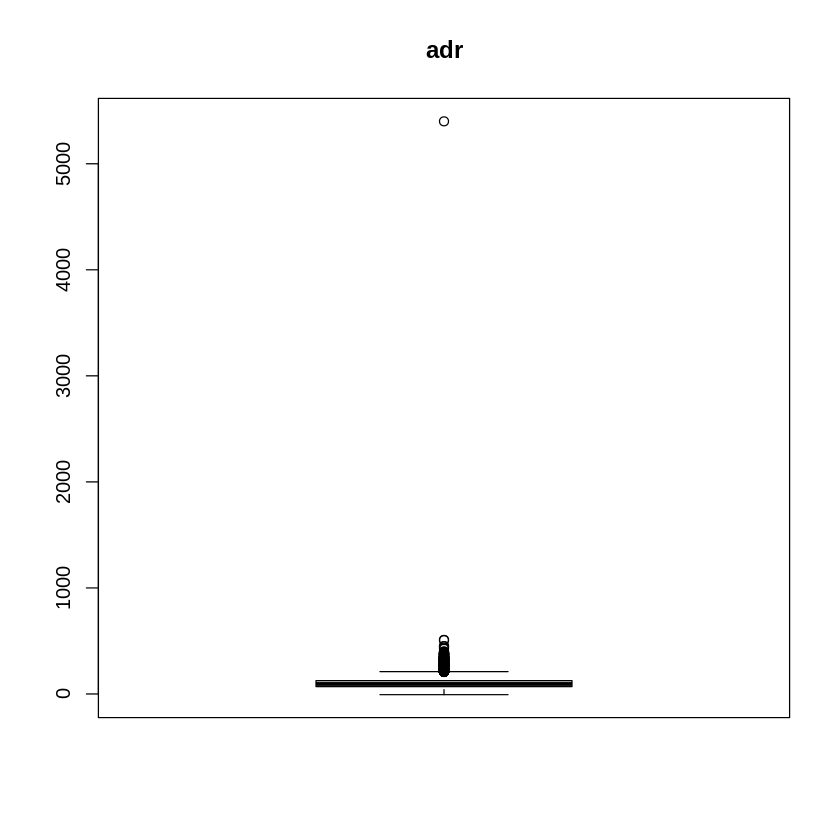

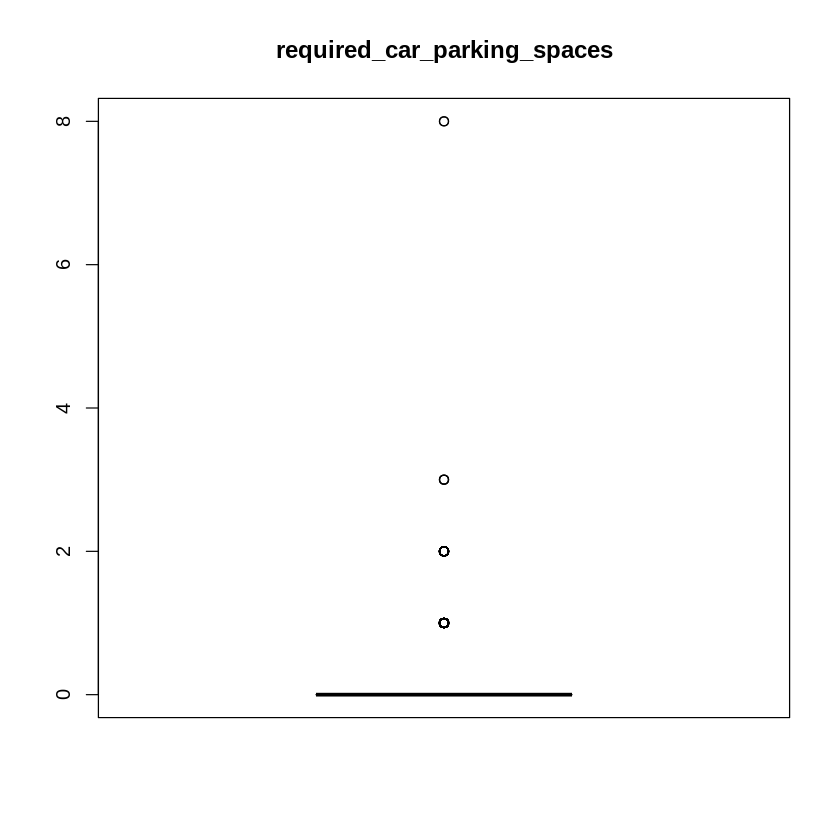

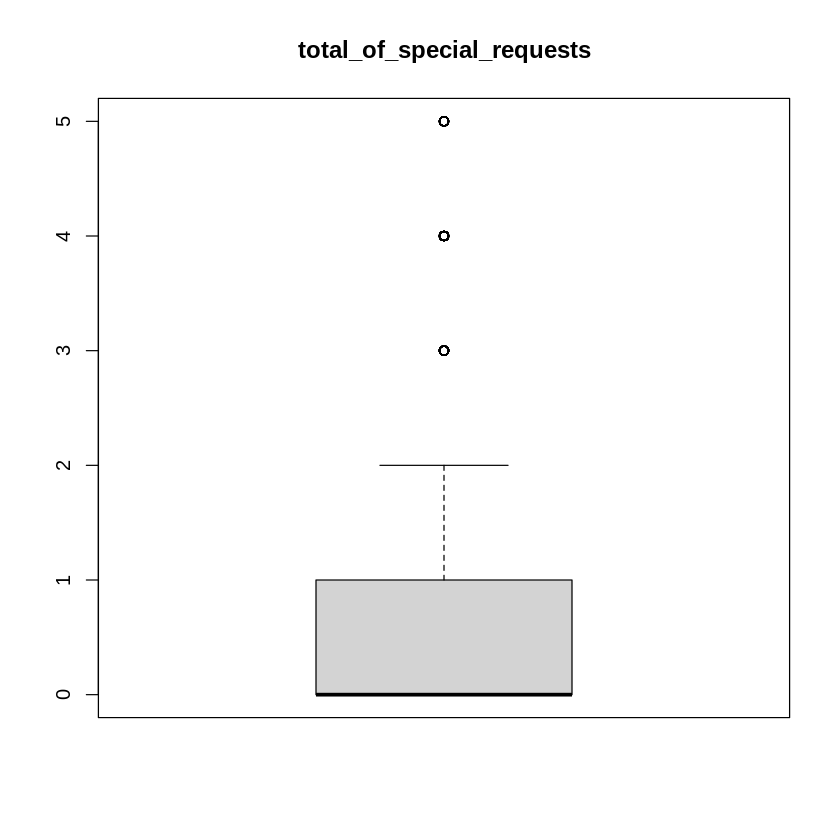

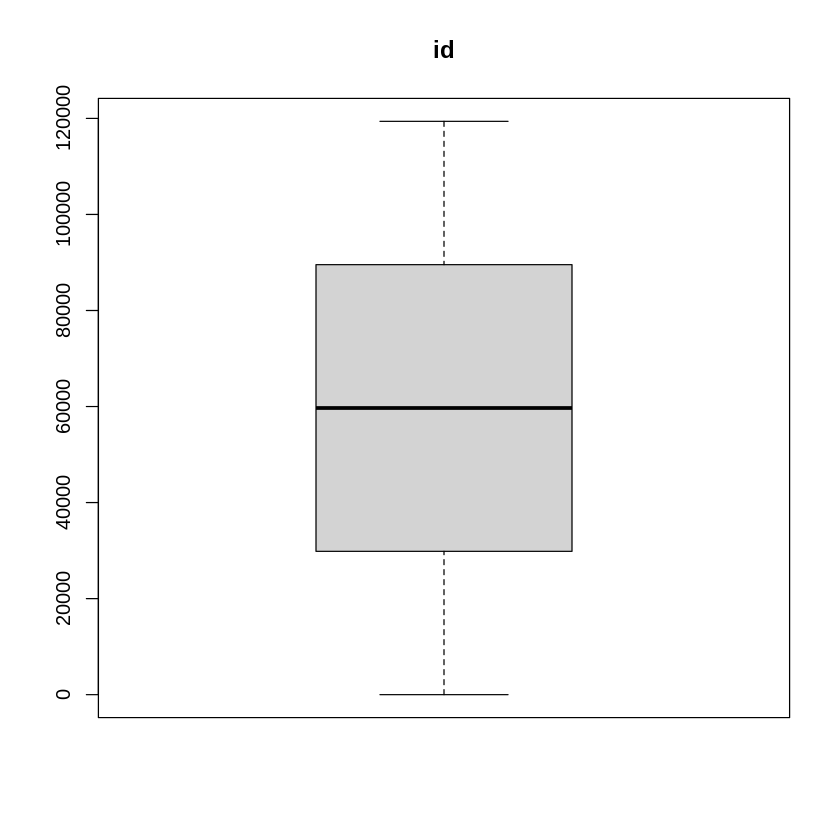

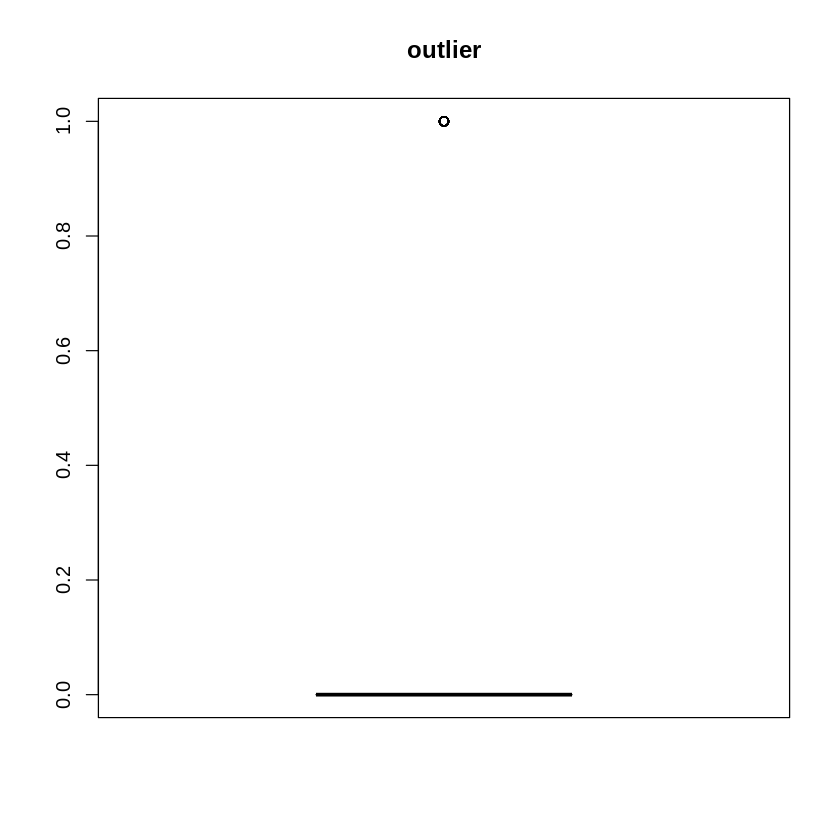

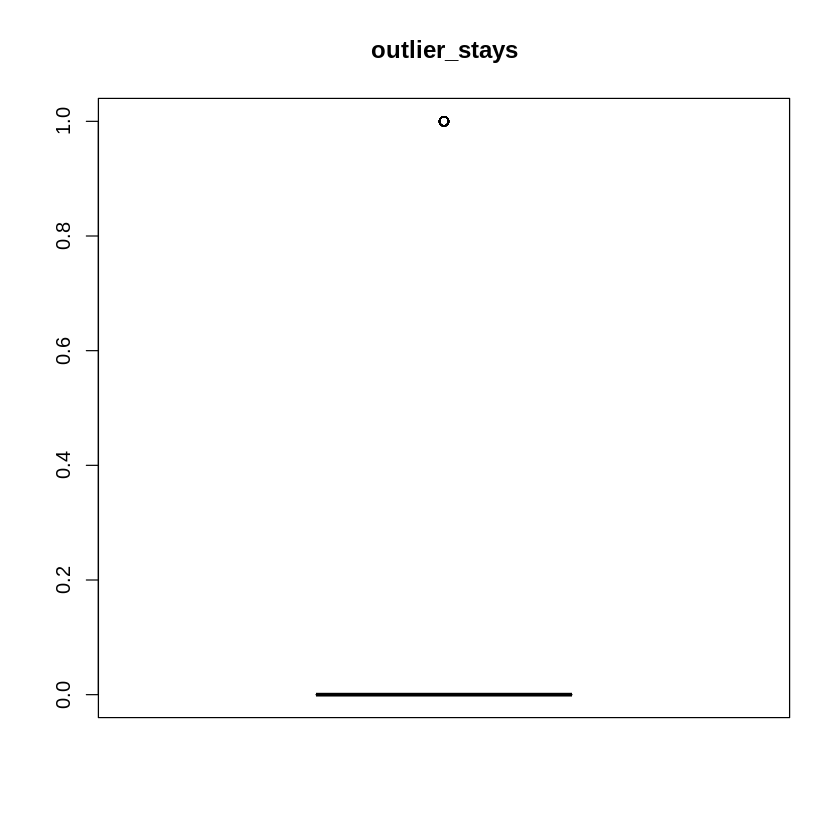

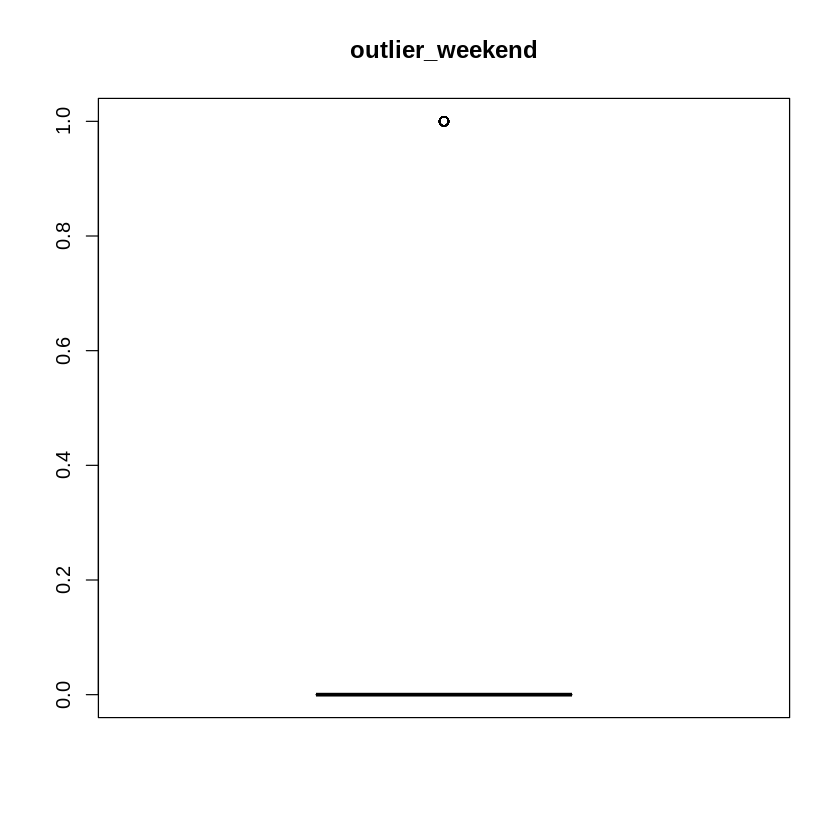

In [ ]:
#backup_hotel
numeric_cols <-backup_hotel[, sapply(backup_hotel, is.numeric)]

# Crear diagramas de caja para las columnas numéricas
boxplot(numeric_cols)
for (col in names(backup_hotel)) {
  if (is.numeric(backup_hotel[[col]])) {
    boxplot(backup_hotel[[col]], main = col)
  }
}

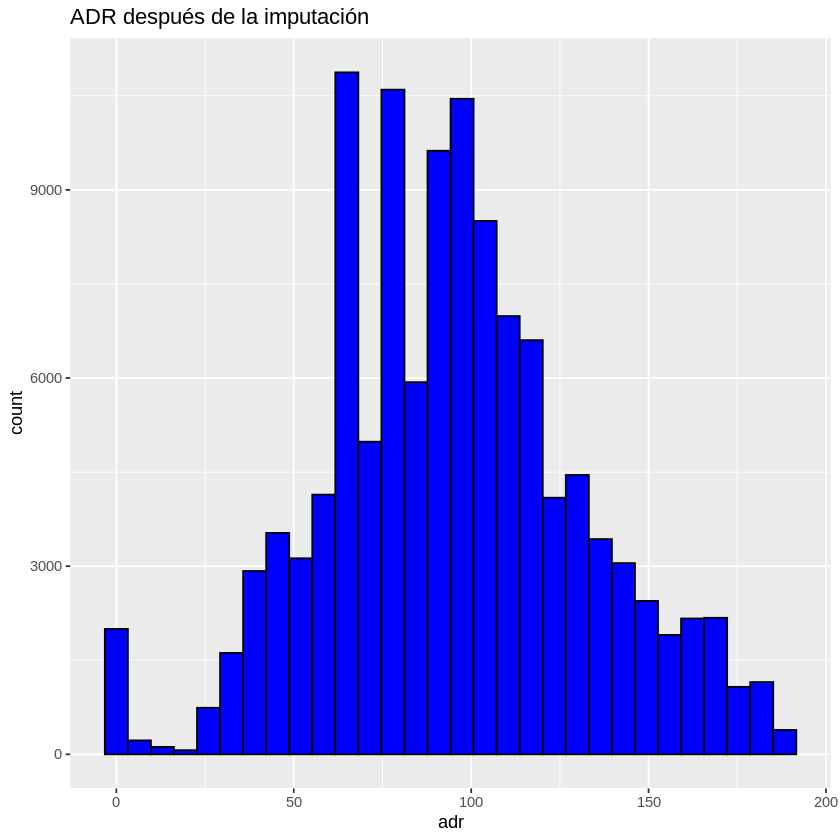

In [ ]:
# Calculando el IQR y definiendo outliers para adr
qnt_adr <- quantile(backup_hotel$adr, probs = c(0.25, 0.75), na.rm = TRUE)
iqr_adr <- IQR(backup_hotel$adr, na.rm = TRUE)
upper_adr <- qnt_adr[2] + 1.1 * iqr_adr
lower_adr <- qnt_adr[1] - 1.3 * iqr_adr

backup_hotel$outlier_adr <- ifelse(backup_hotel$adr < lower_adr | backup_hotel$adr > upper_adr, 1, 0)

# Crear modelo de regresión lineal excluyendo outliers
model_adr <- lm(adr ~ arrival_date_year + customer_type + stays_in_week_nights + stays_in_weekend_nights, data = backup_hotel[backup_hotel$outlier_adr == 0, ])

# Predecir valores para los outliers
predicted_values_adr <- predict(model_adr, newdata = backup_hotel[backup_hotel$outlier_adr == 1, ])
backup_hotel$adr[backup_hotel$outlier_adr == 1] <- predicted_values_adr

# Opcional: Visualización para verificar la distribución después de la imputación
library(ggplot2)
ggplot(backup_hotel, aes(x = adr)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("ADR después de la imputación")
backup_hotel$outlier_adr <- NULL


##Required_car_parking

In [ ]:
##pues este tmb esta por revisar pq si es con la de regresion sale 0 xd
## Revisar la distribución de valores
#table(backup_hotel$required_car_parking_spaces)
#
#max_value <- max(backup_hotel$required_car_parking_spaces)
#if (max_value > 3) { # cualquier cosa por encima de 2 es un outlier
#  backup_hotel$required_car_parking_spaces[backup_hotel$required_car_parking_spaces > 2] <- 1 # reemplazo arbitrario xd
#}
#
#ggplot(backup_hotel, aes(x = required_car_parking_spaces)) +
#  geom_bar(fill = "blue", color = "black") +
#  ggtitle("Required Car Parking Spaces after Outlier Correction")
#

##total_of_special_requests

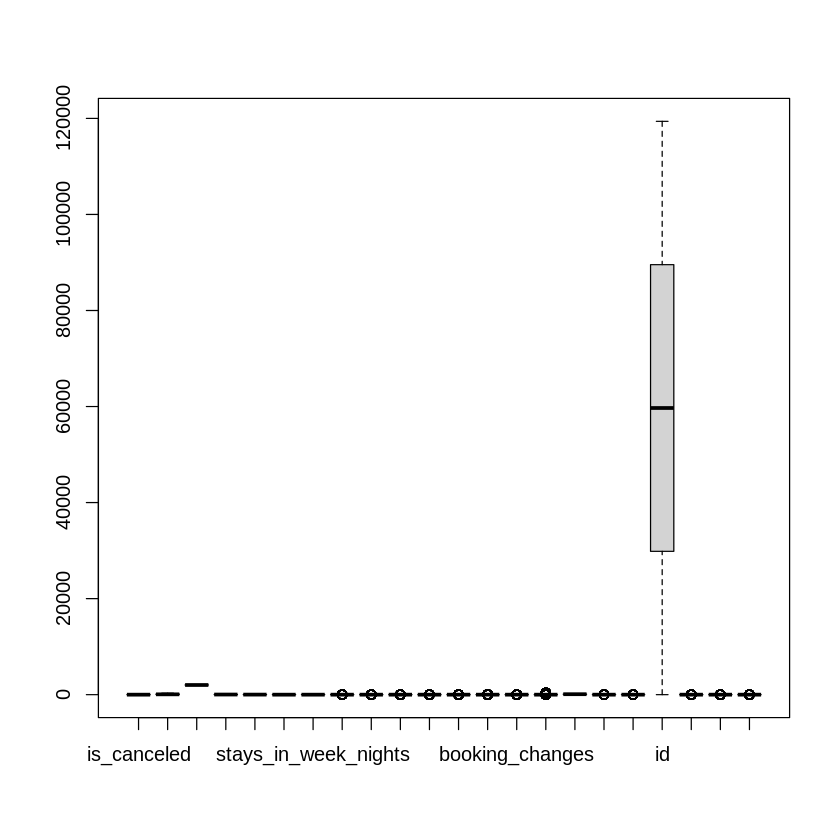

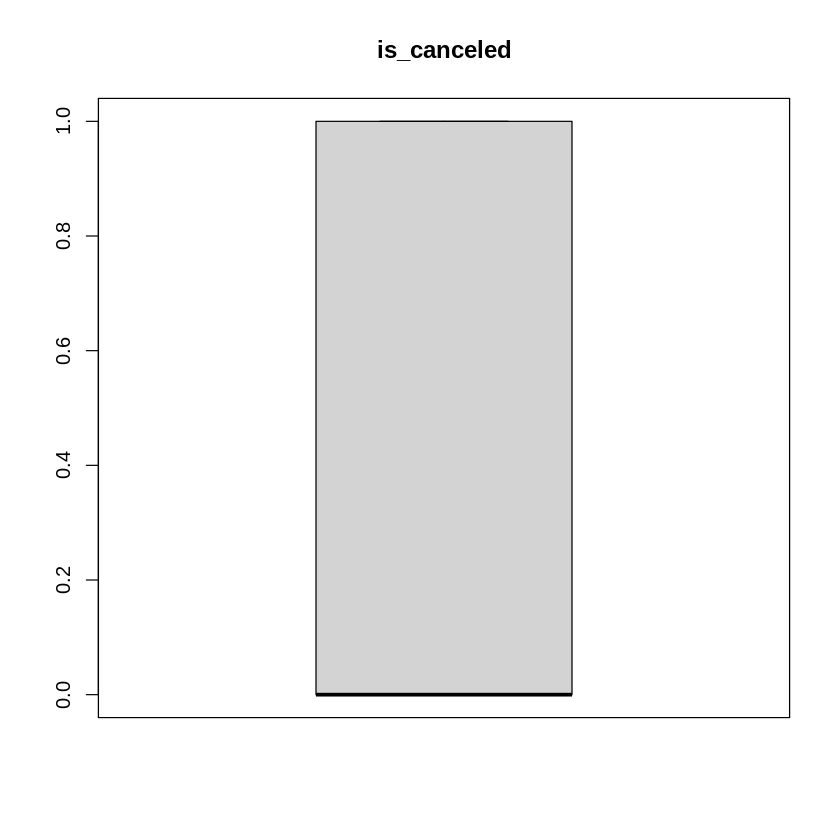

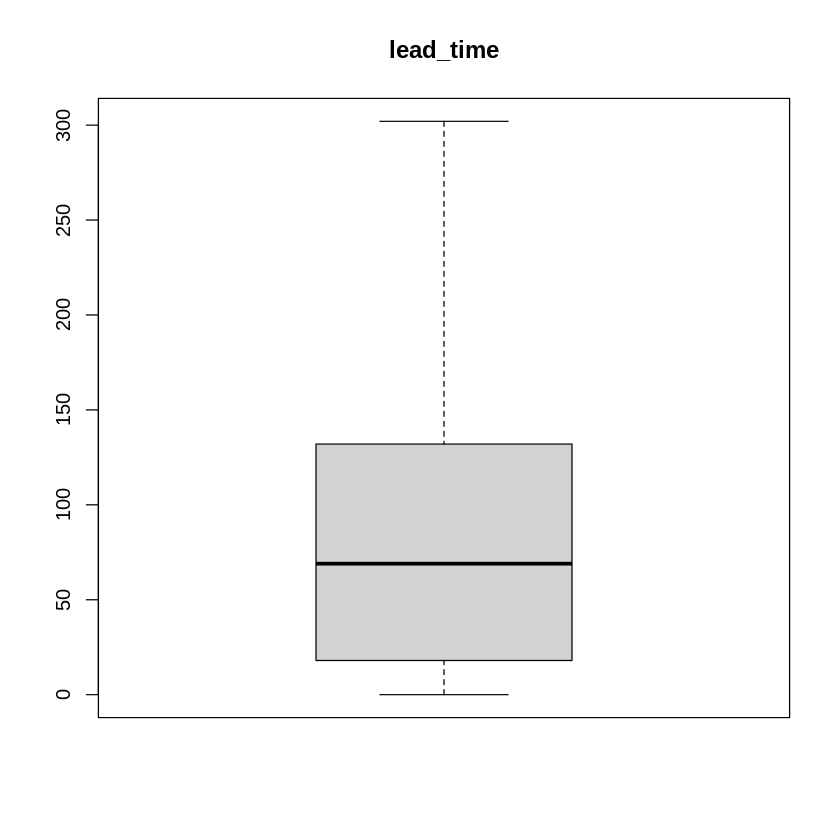

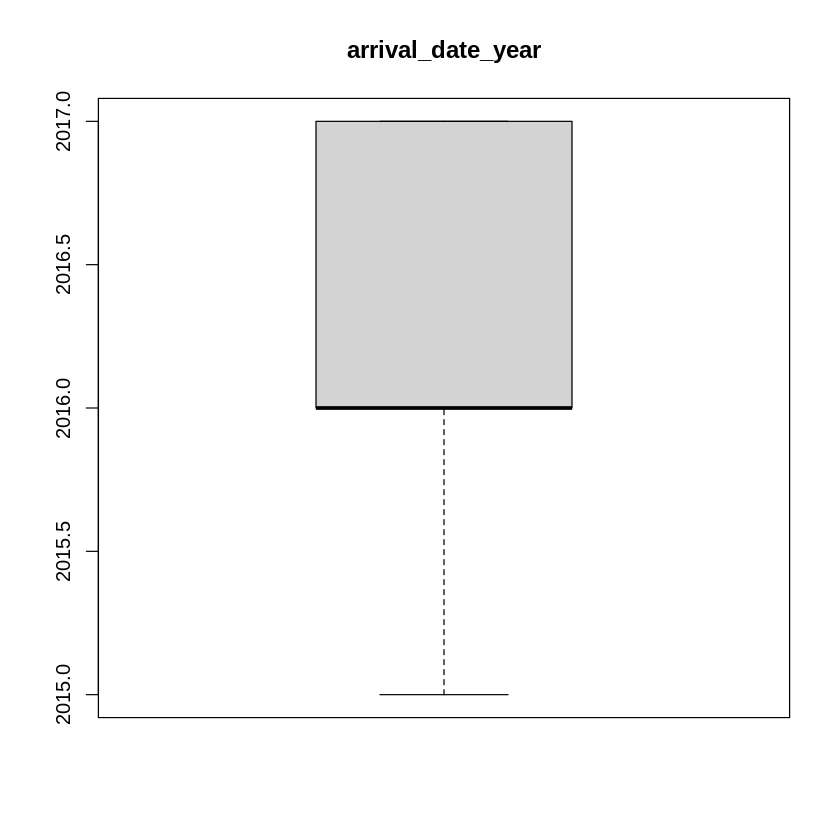

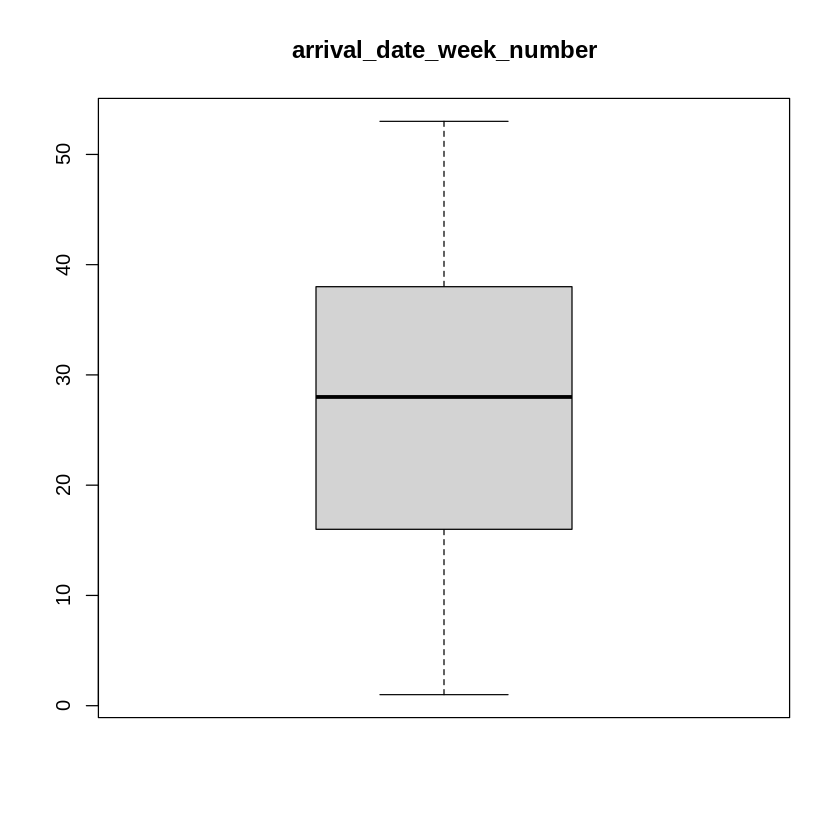

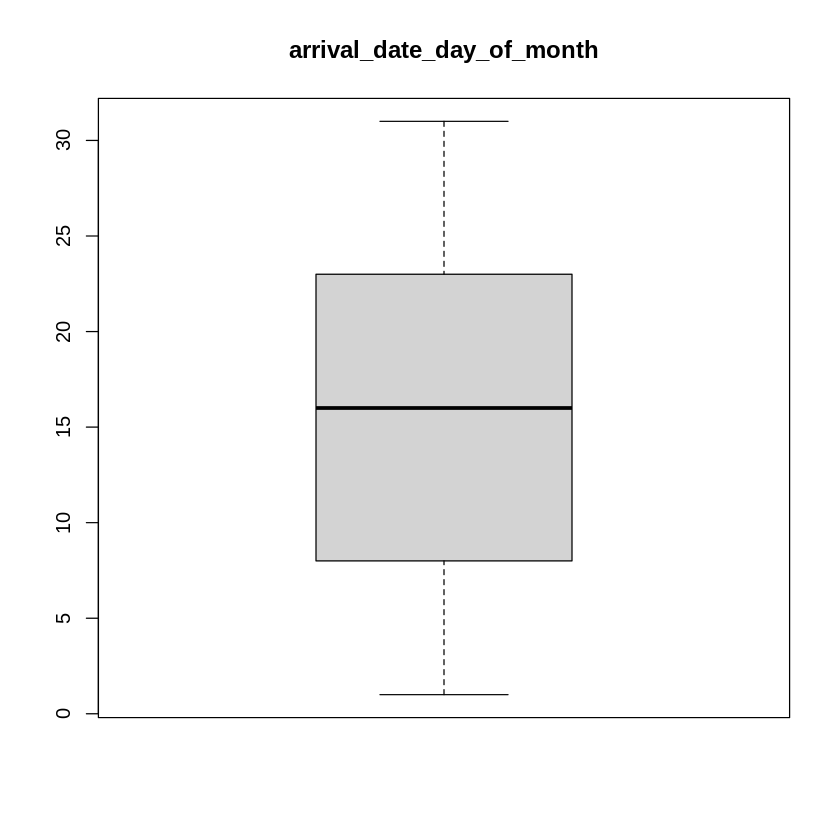

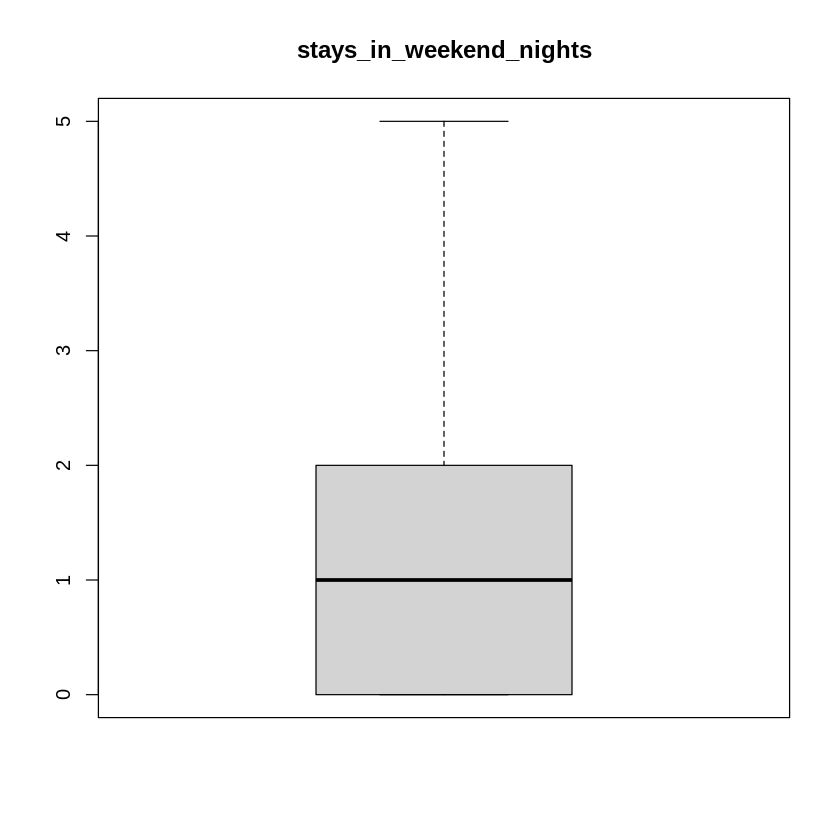

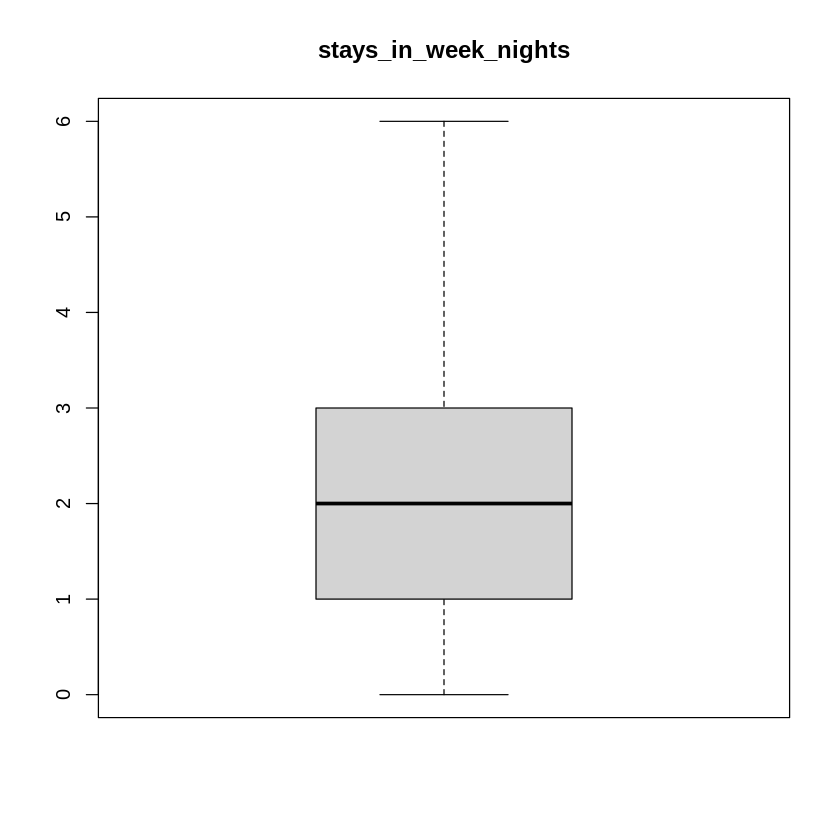

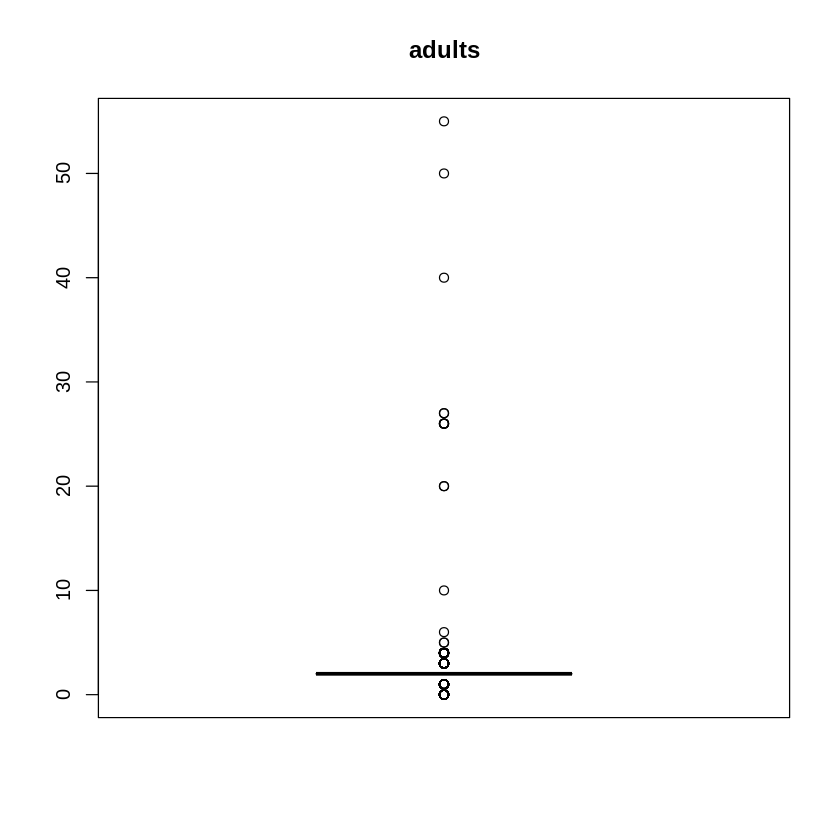

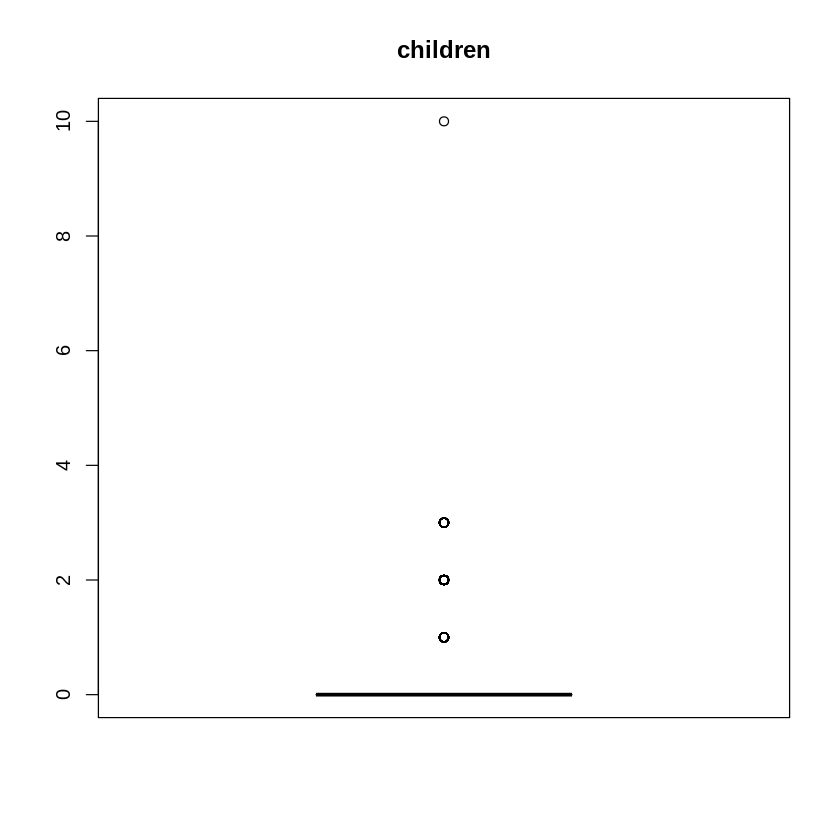

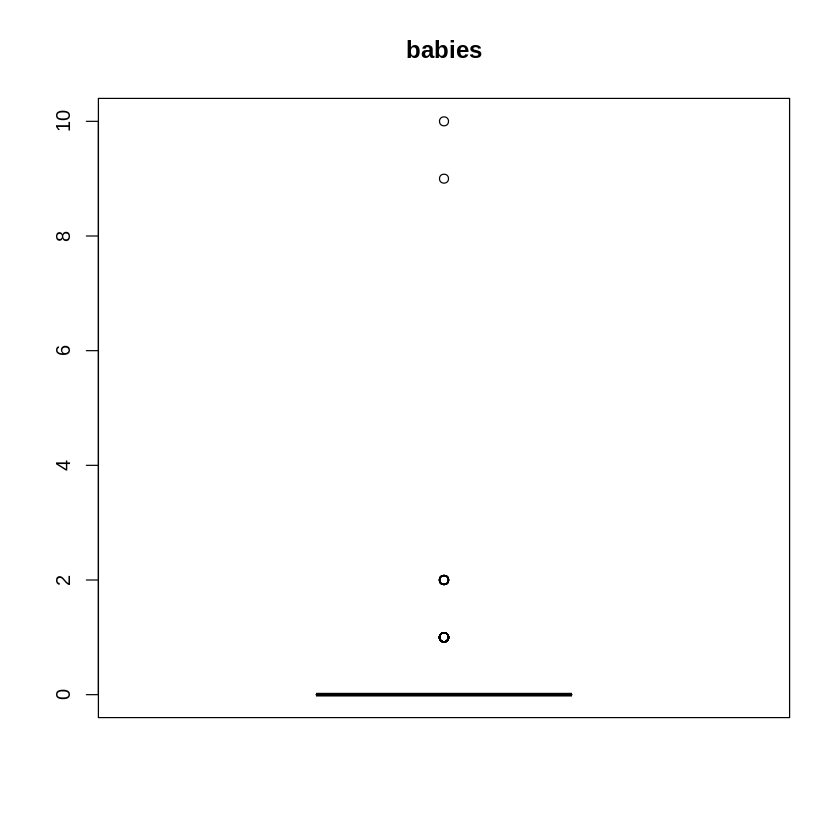

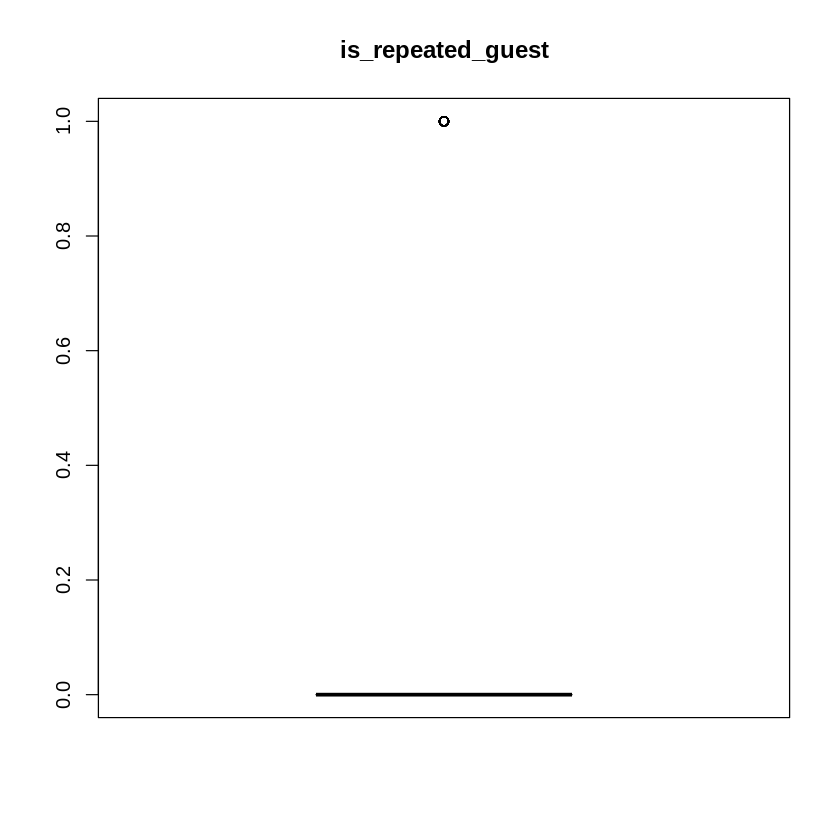

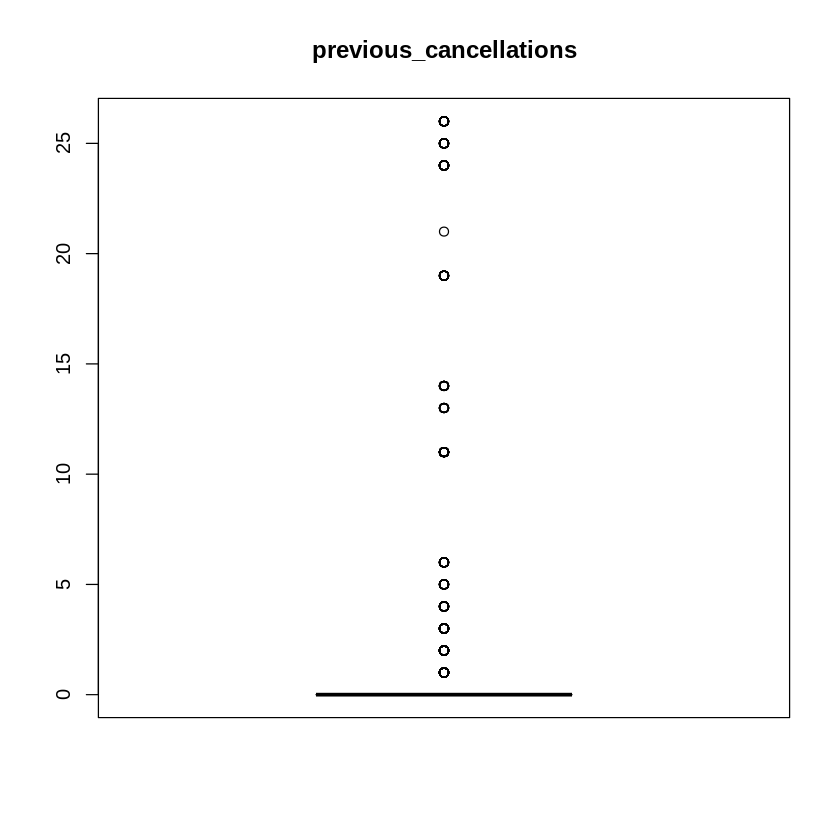

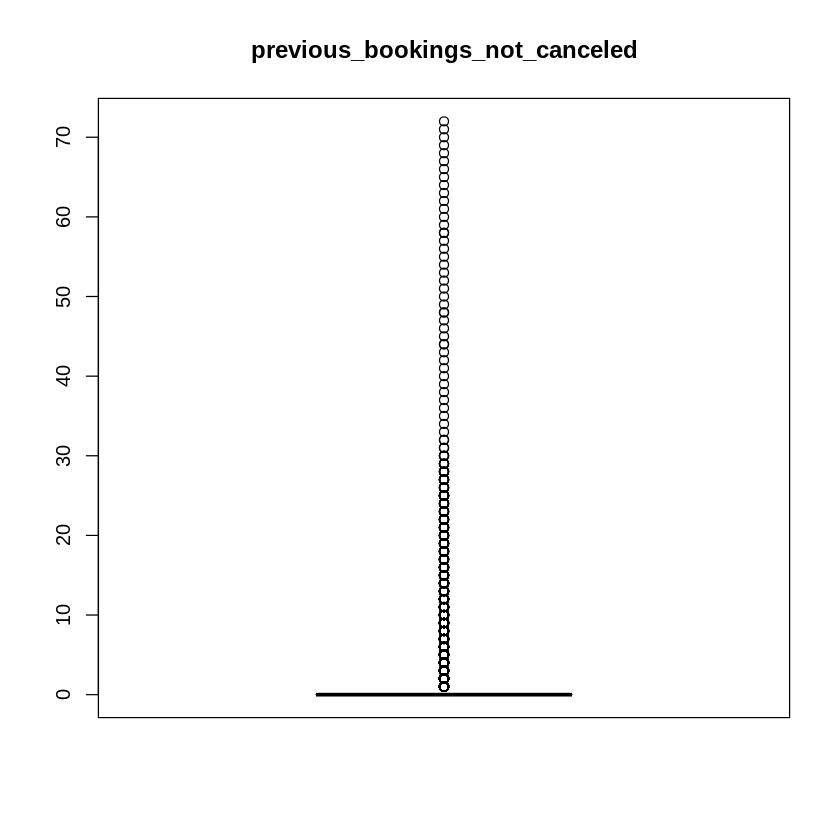

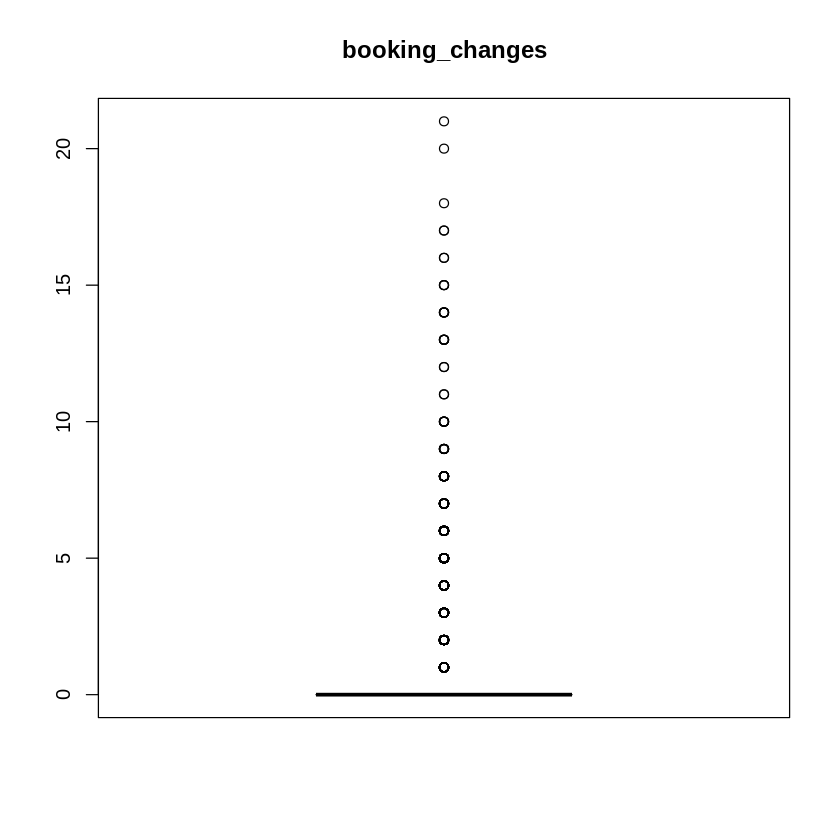

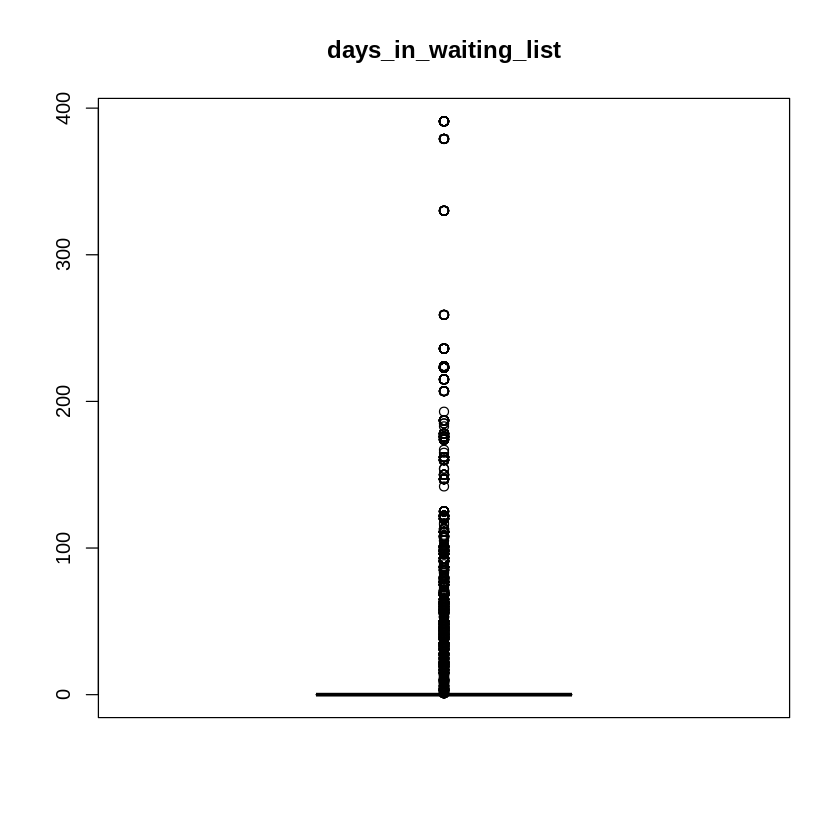

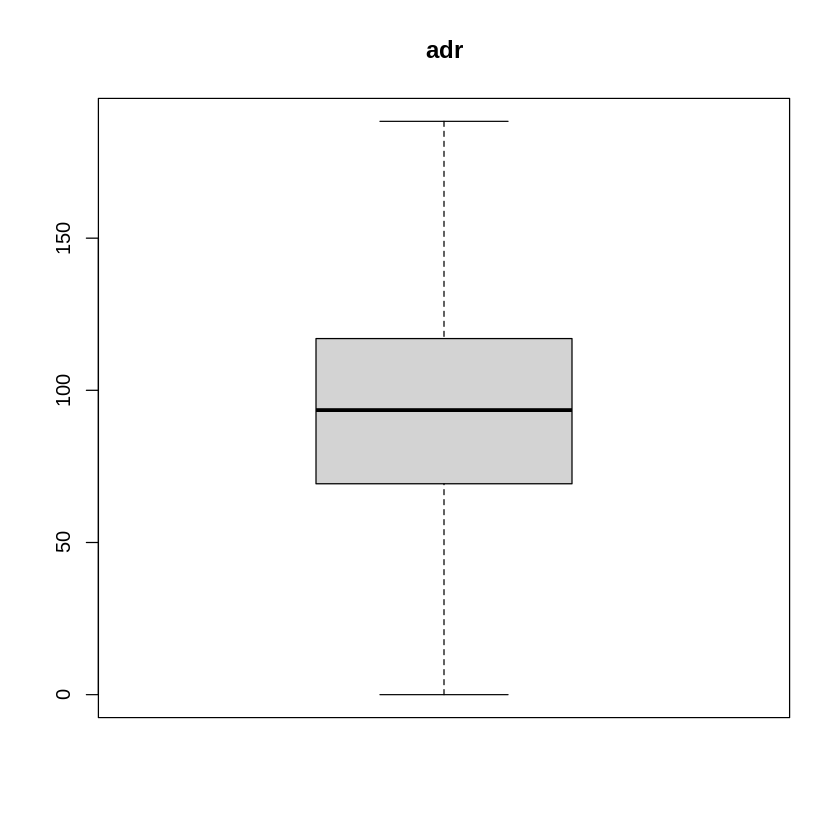

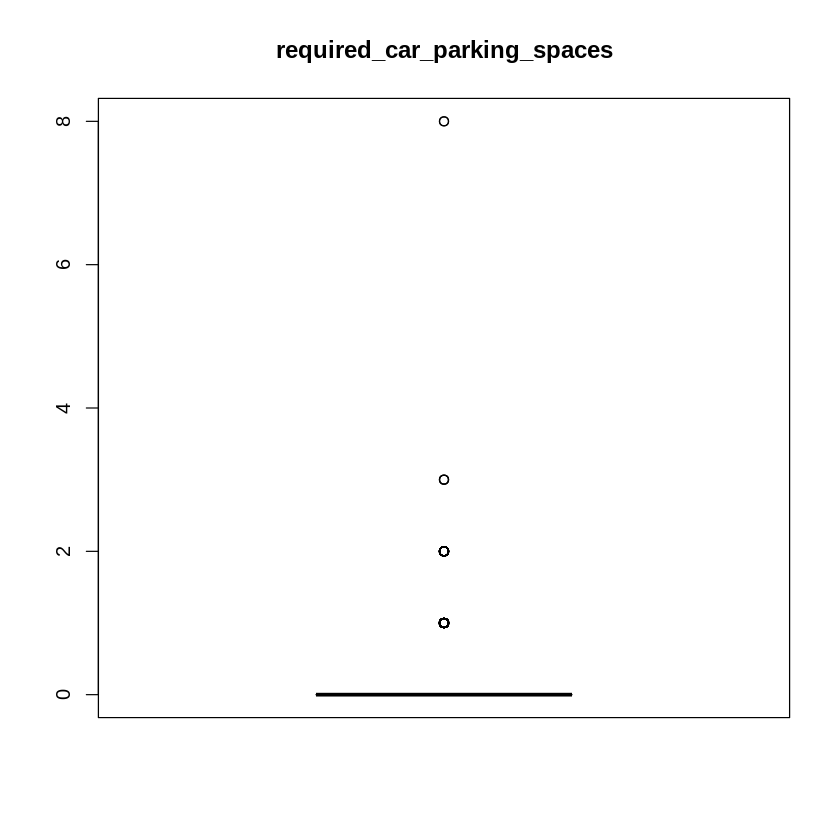

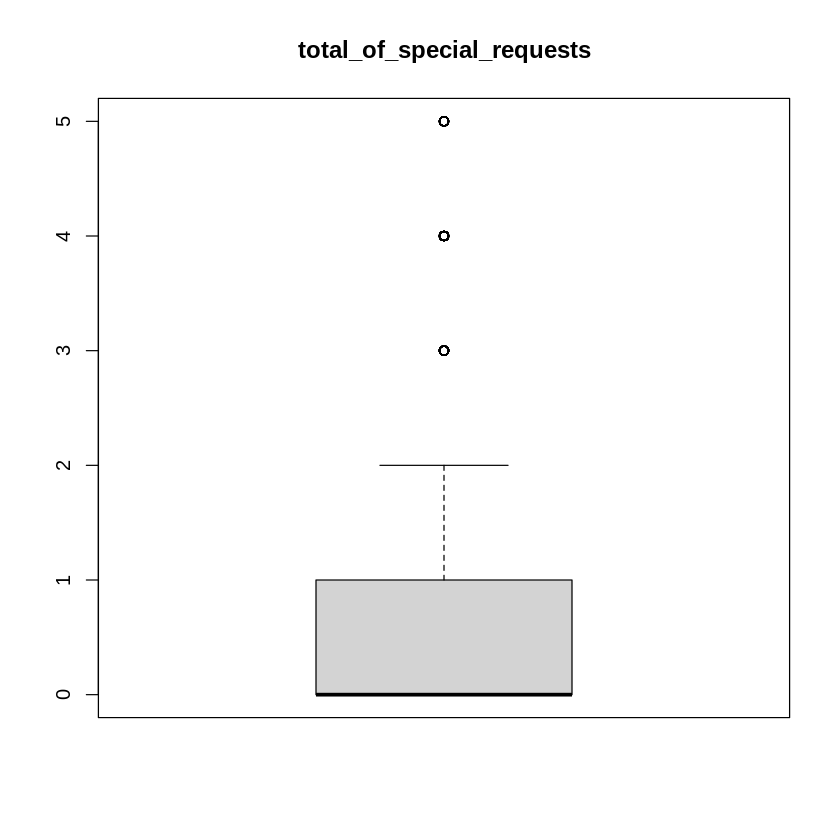

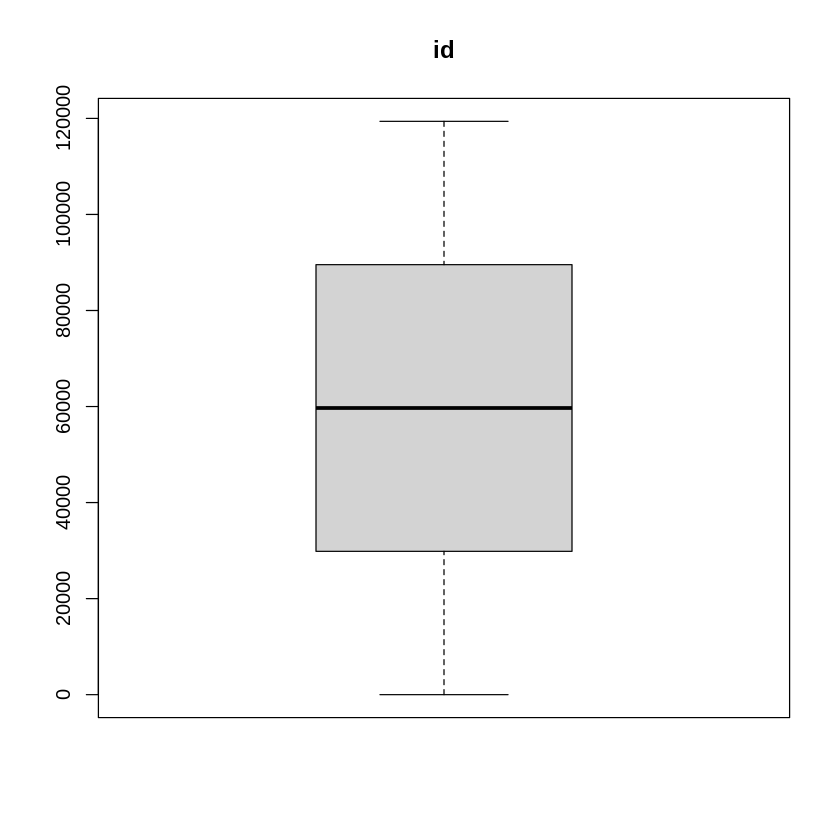

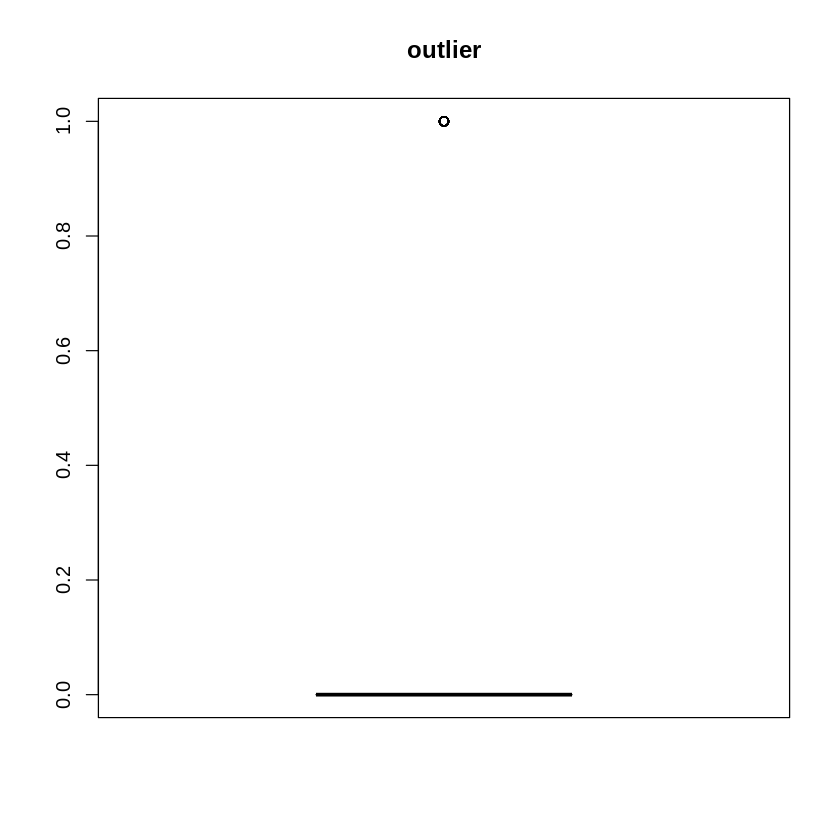

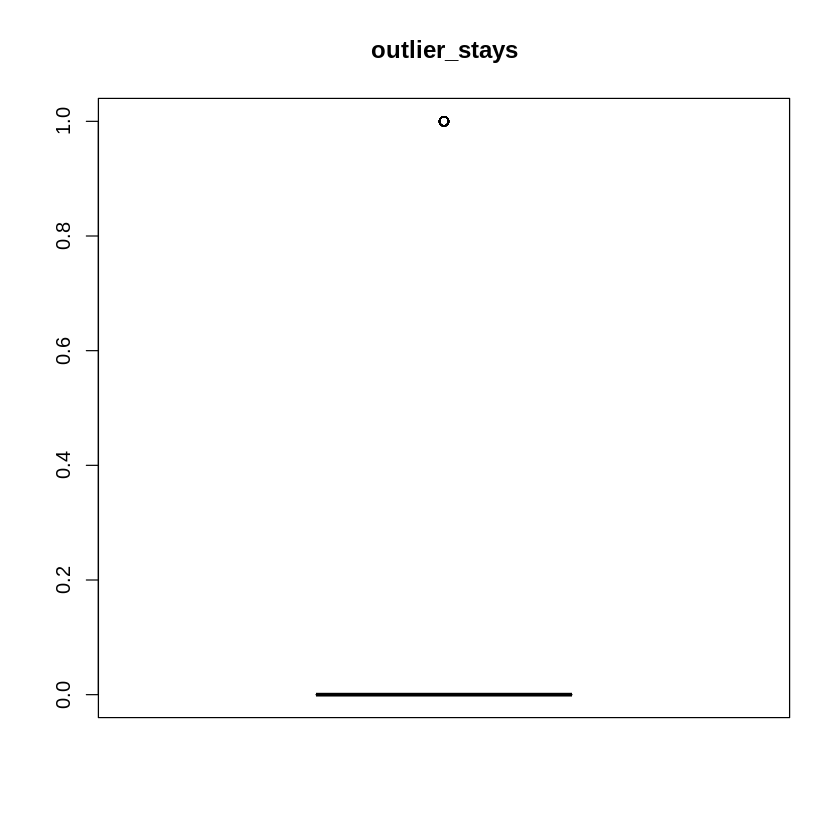

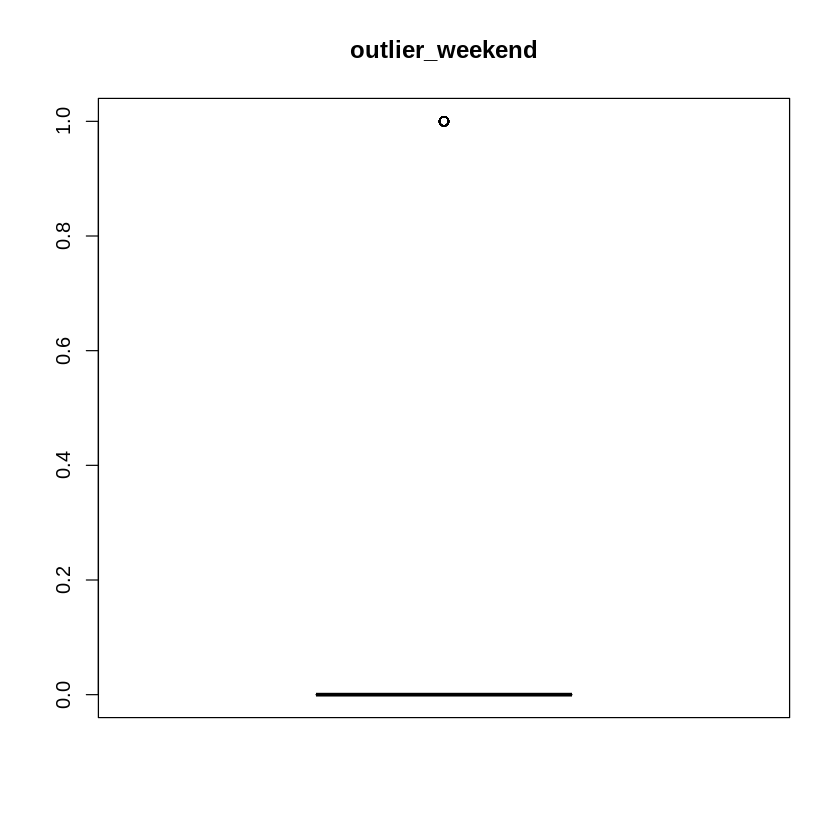

In [ ]:
#backup_hotel
numeric_cols <-backup_hotel[, sapply(backup_hotel, is.numeric)]

# Crear diagramas de caja para las columnas numéricas
boxplot(numeric_cols)
for (col in names(backup_hotel)) {
  if (is.numeric(backup_hotel[[col]])) {
    boxplot(backup_hotel[[col]], main = col)
  }
}

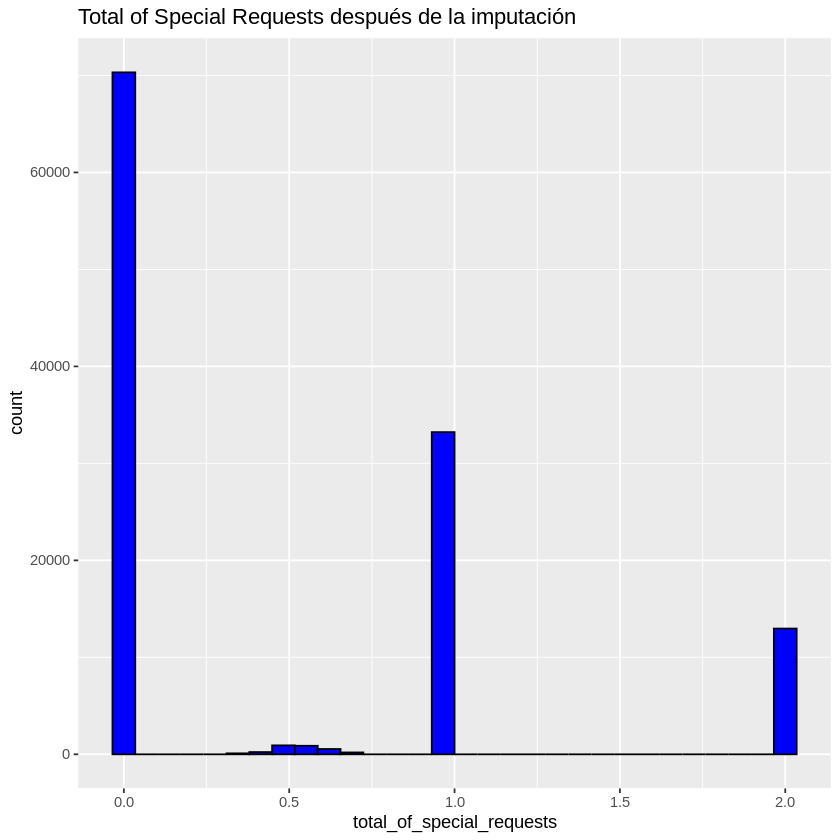

In [ ]:
# Calculando el IQR y definiendo los outliers
quantiles <- quantile(backup_hotel$total_of_special_requests, probs=c(.25, .75), na.rm = TRUE)
IQR_value <- IQR(backup_hotel$total_of_special_requests, na.rm = TRUE)
upper_bound <- quantiles[2] + 1.5 * IQR_value
lower_bound <- quantiles[1] - 1.5 * IQR_value

backup_hotel$outlier_special_requests <- ifelse(backup_hotel$total_of_special_requests < lower_bound | backup_hotel$total_of_special_requests > upper_bound, 1, 0)

# Crear un modelo de regresión lineal excluyendo outliers
model <- lm(total_of_special_requests ~ arrival_date_year + stays_in_week_nights, data = backup_hotel[backup_hotel$outlier_special_requests == 0, ])

# Predecir valores para los outliers
predicted_values <- predict(model, newdata = backup_hotel[backup_hotel$outlier_special_requests == 1, ])
backup_hotel$total_of_special_requests[backup_hotel$outlier_special_requests == 1] <- predicted_values

# Opcional: visualizar la distribución después de la imputación
library(ggplot2)
ggplot(backup_hotel, aes(x = total_of_special_requests)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Total of Special Requests después de la imputación")


##Aplicando a new_hotel


In [ ]:

if(nrow(new_hotel) == nrow(backup_hotel)) {
    new_hotel$lead_time <- backup_hotel$lead_time
    new_hotel$stays_in_week_nights <- backup_hotel$stays_in_week_nights
    new_hotel$stays_in_weekend_nights <- backup_hotel$stays_in_weekend_nights
    new_hotel$adr <- backup_hotel$adr
    new_hotel$total_of_special_requests <- backup_hotel$total_of_special_requests

} else {
    message("Los data frames no están alineados. Verifica los datos.")
}


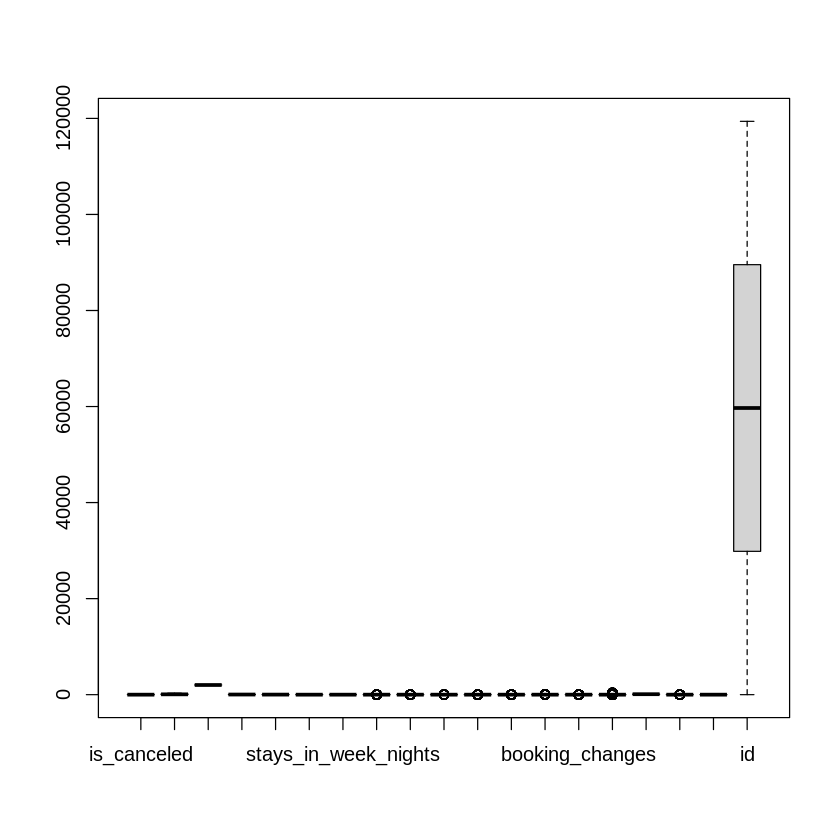

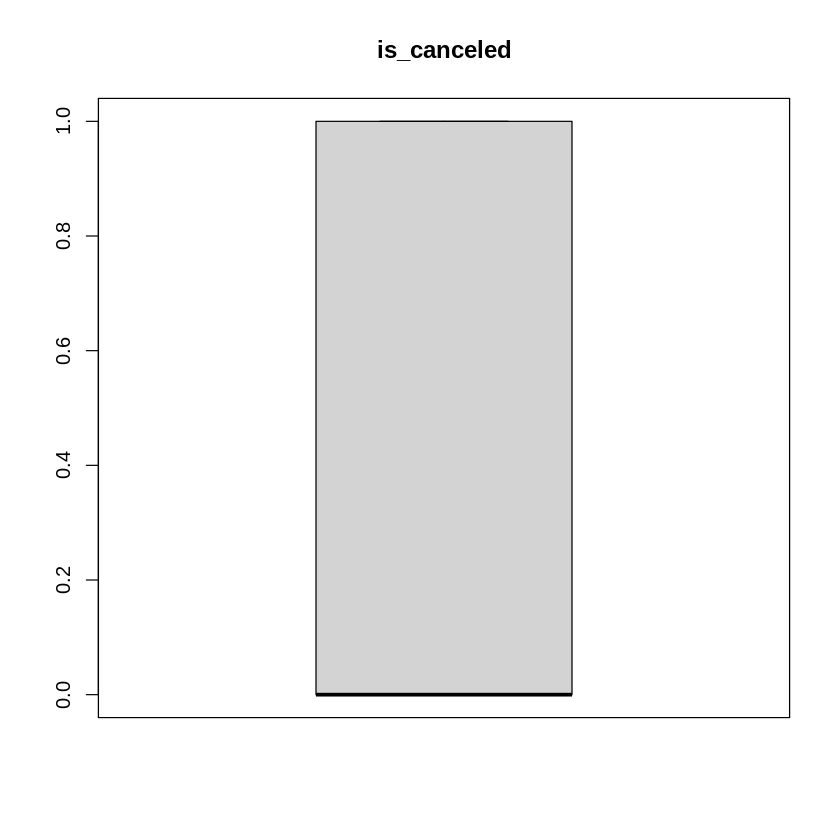

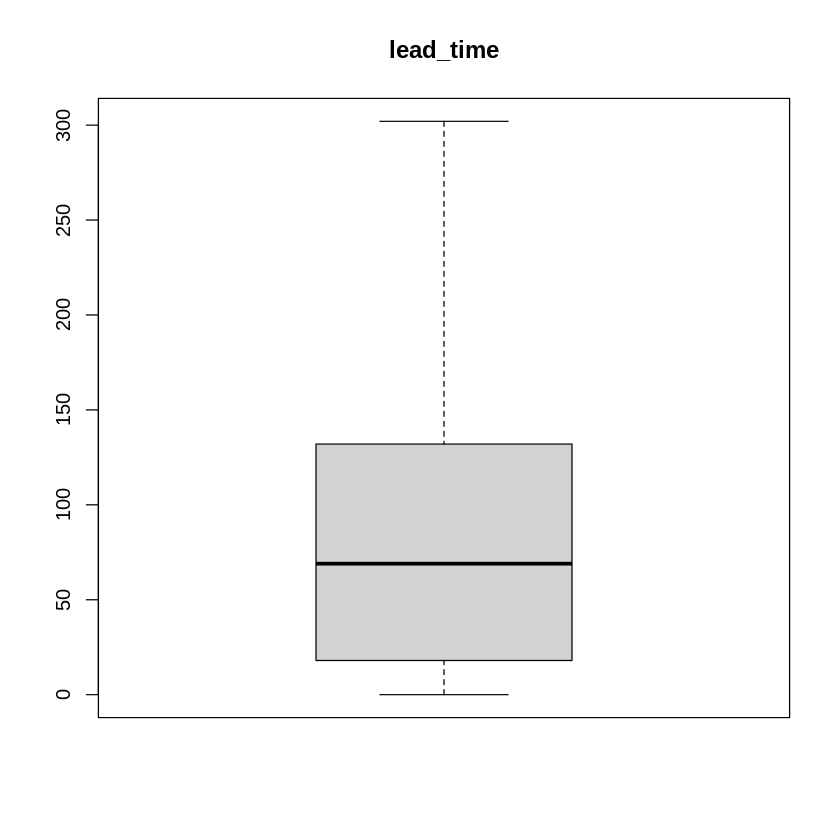

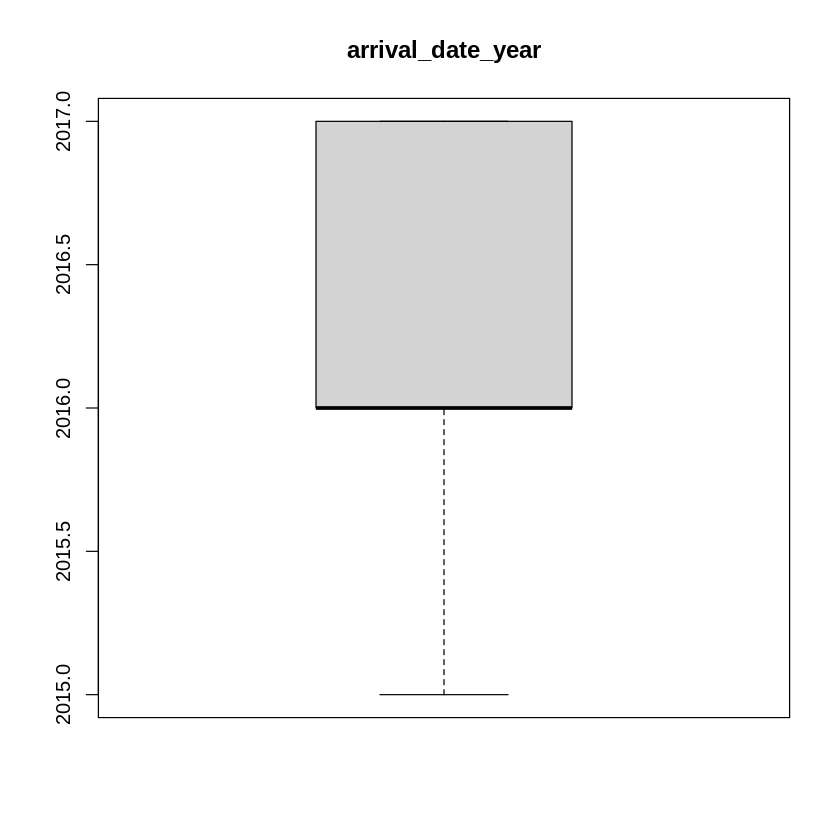

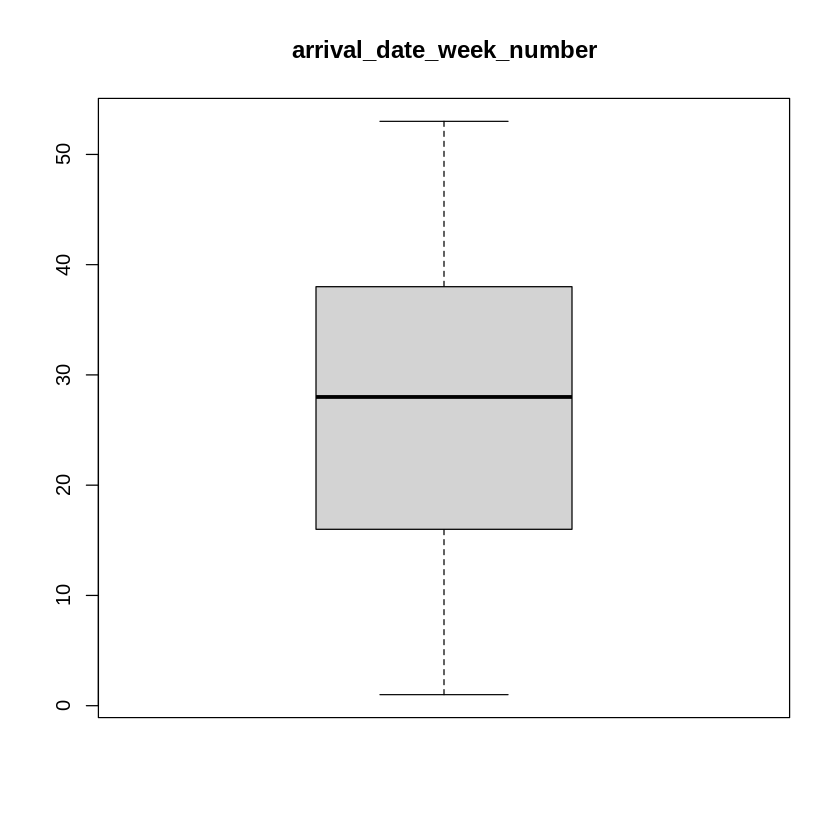

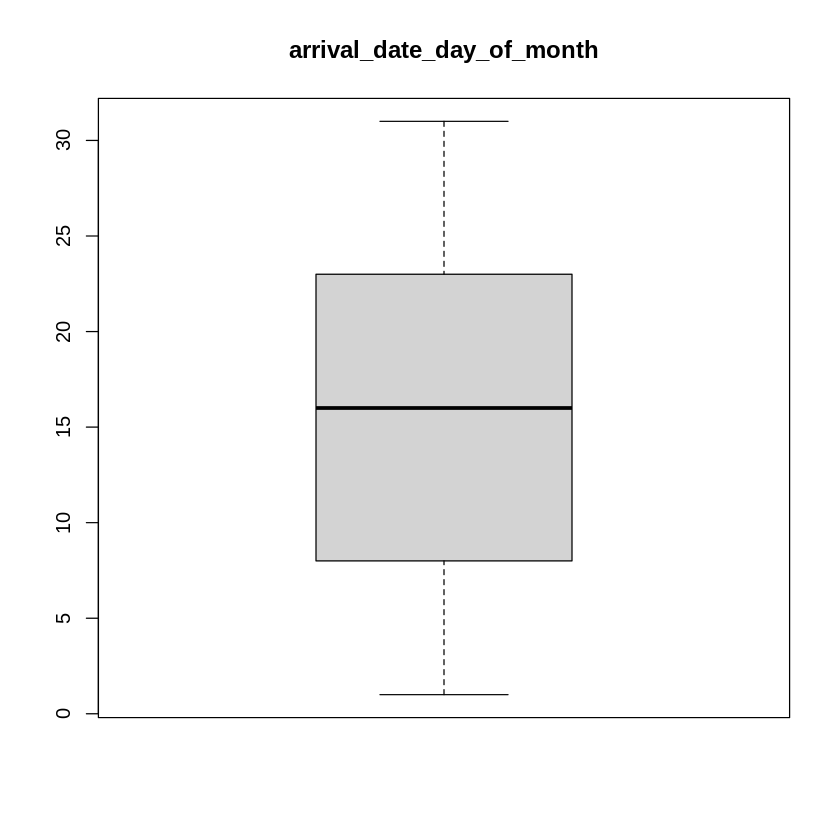

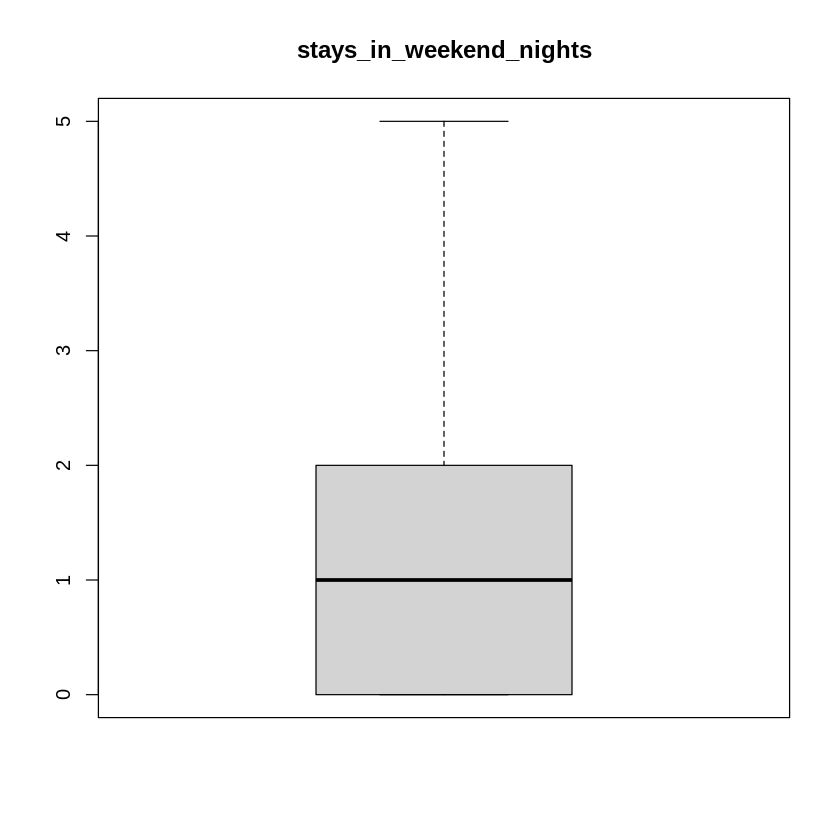

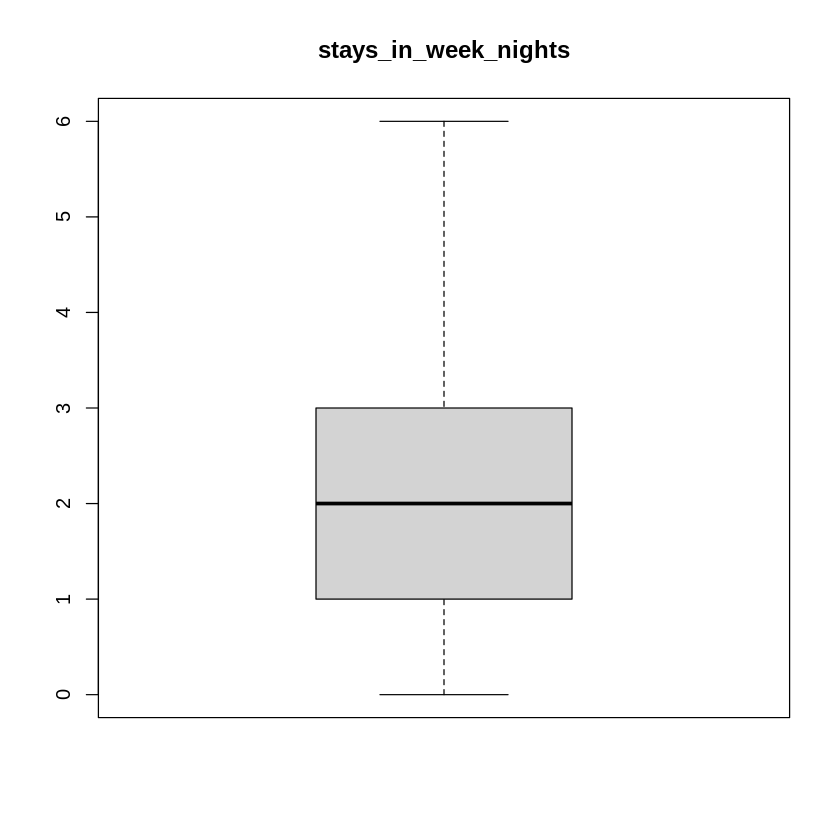

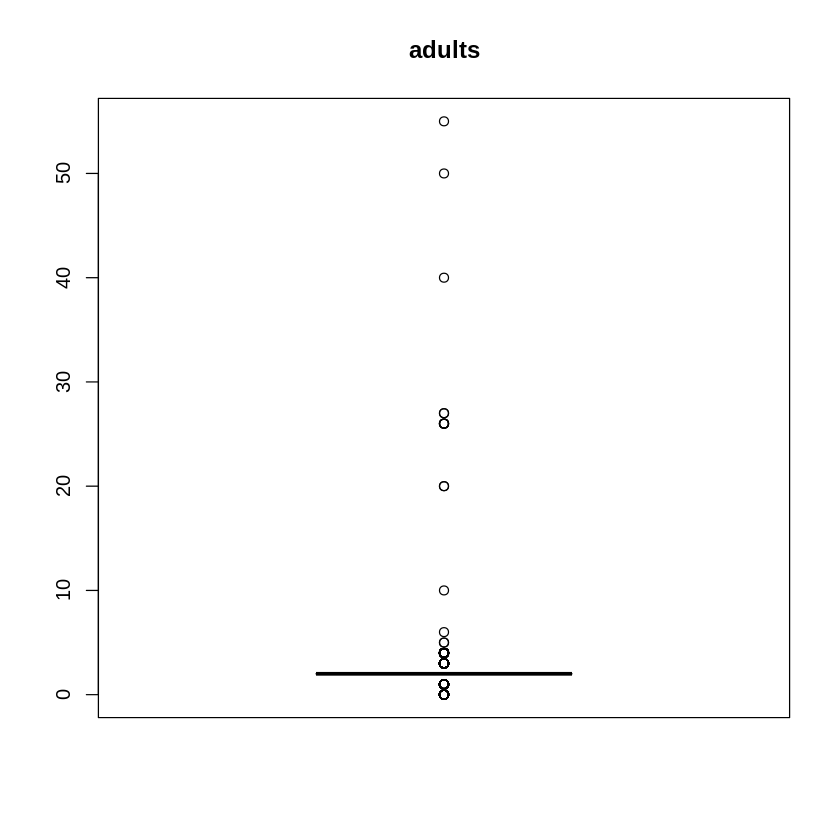

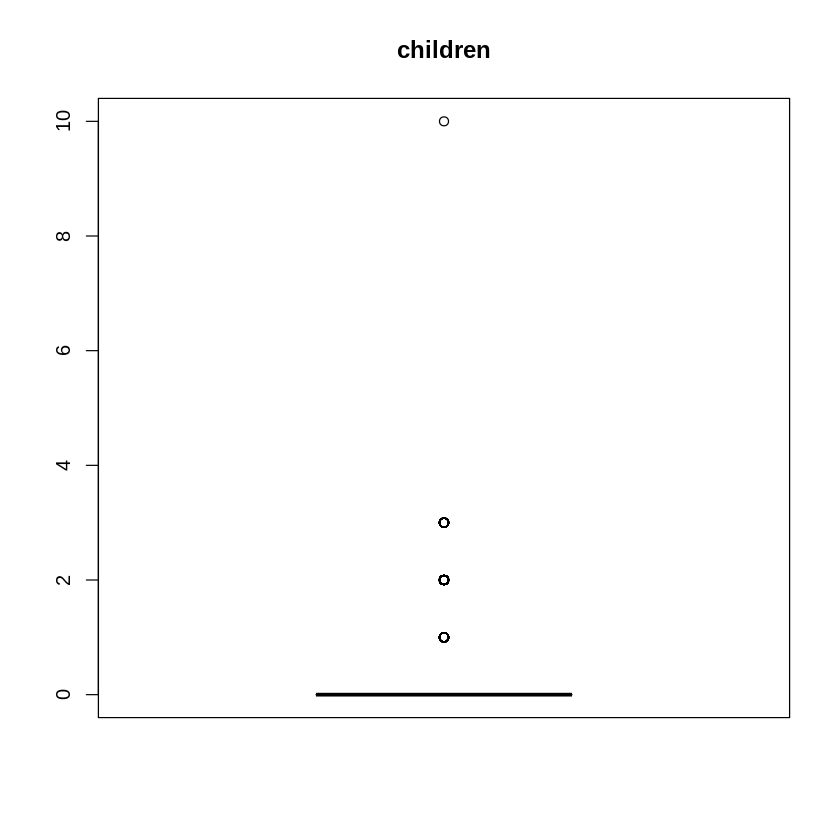

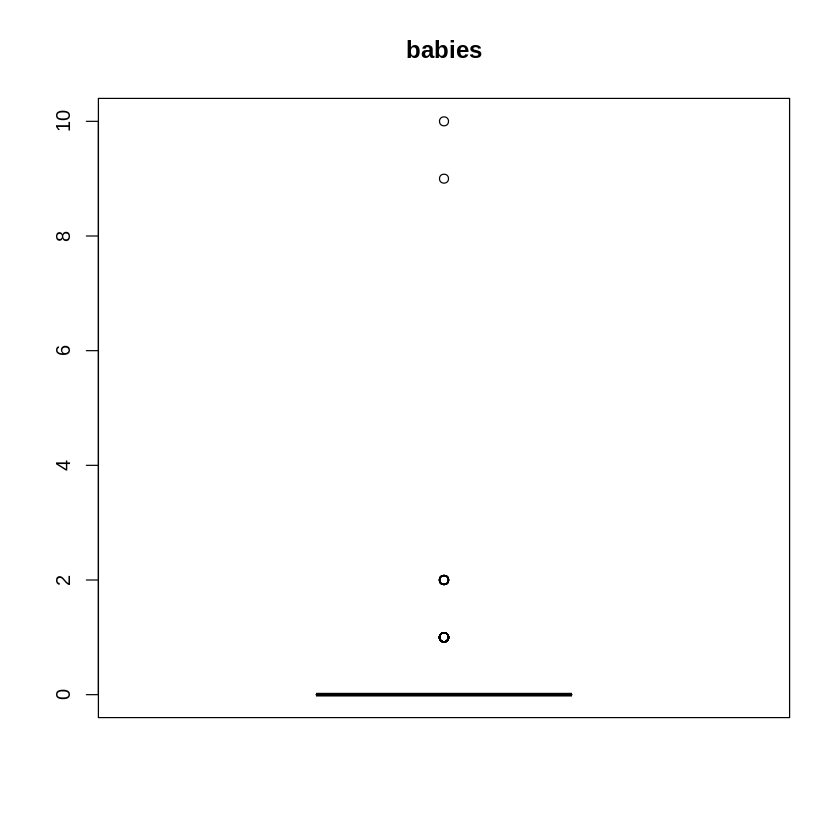

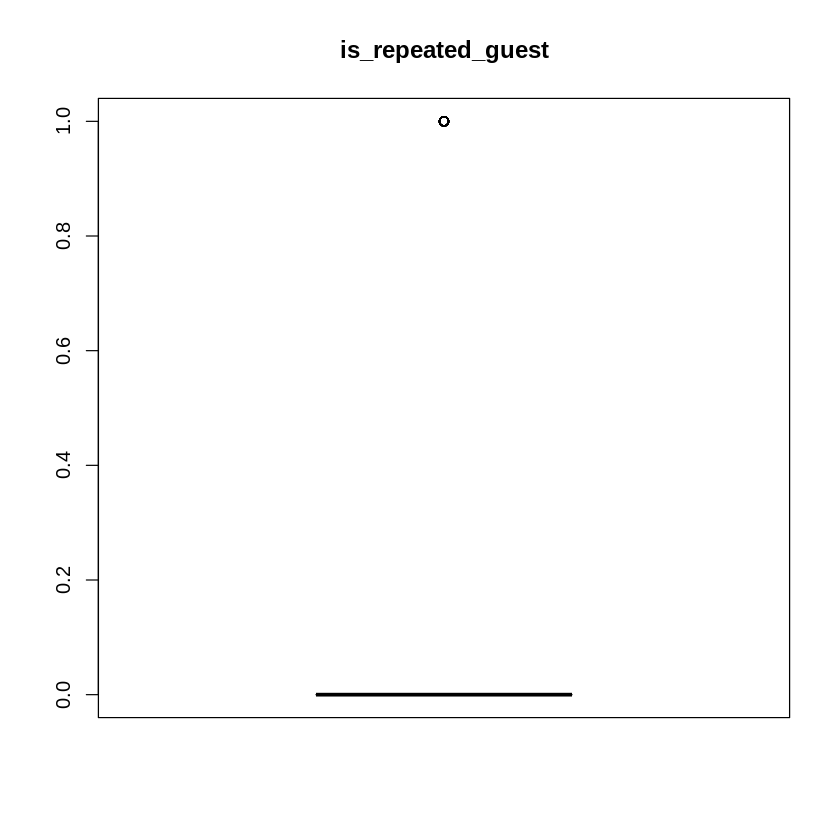

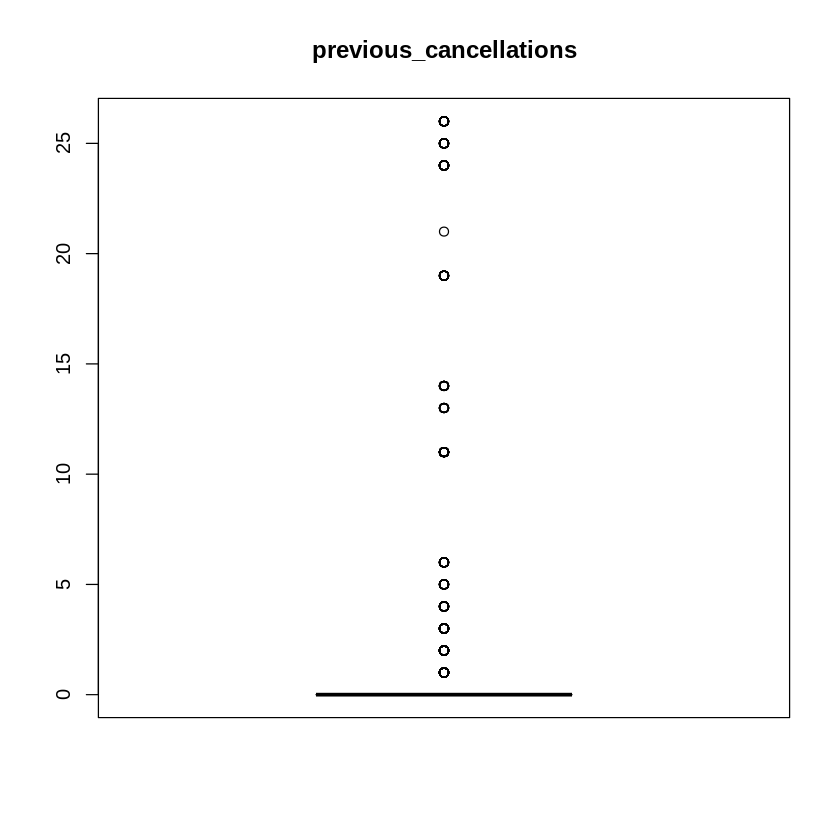

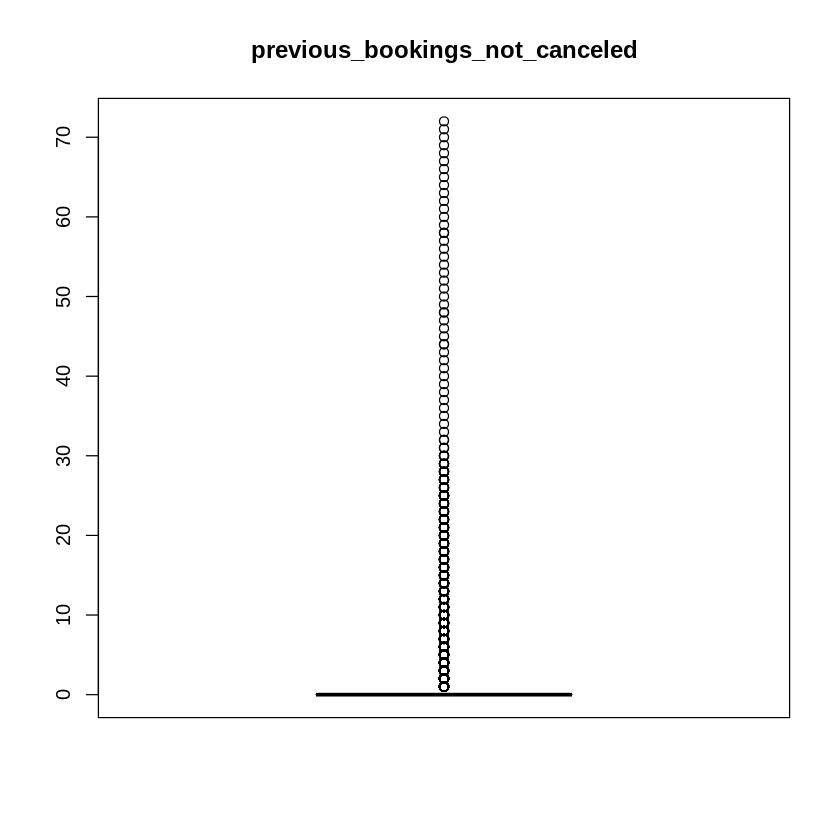

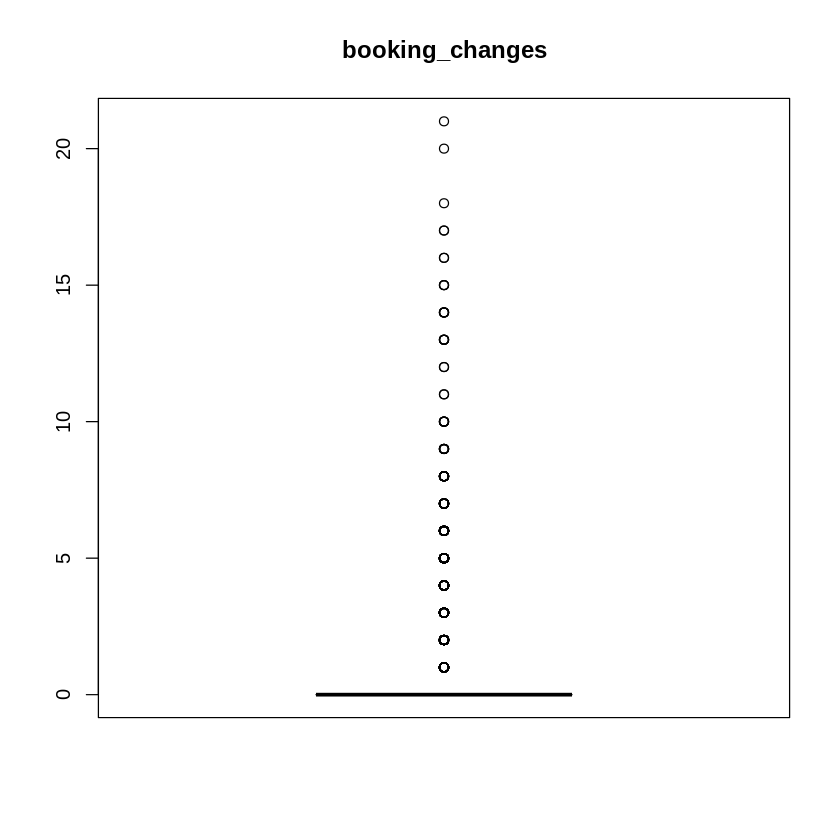

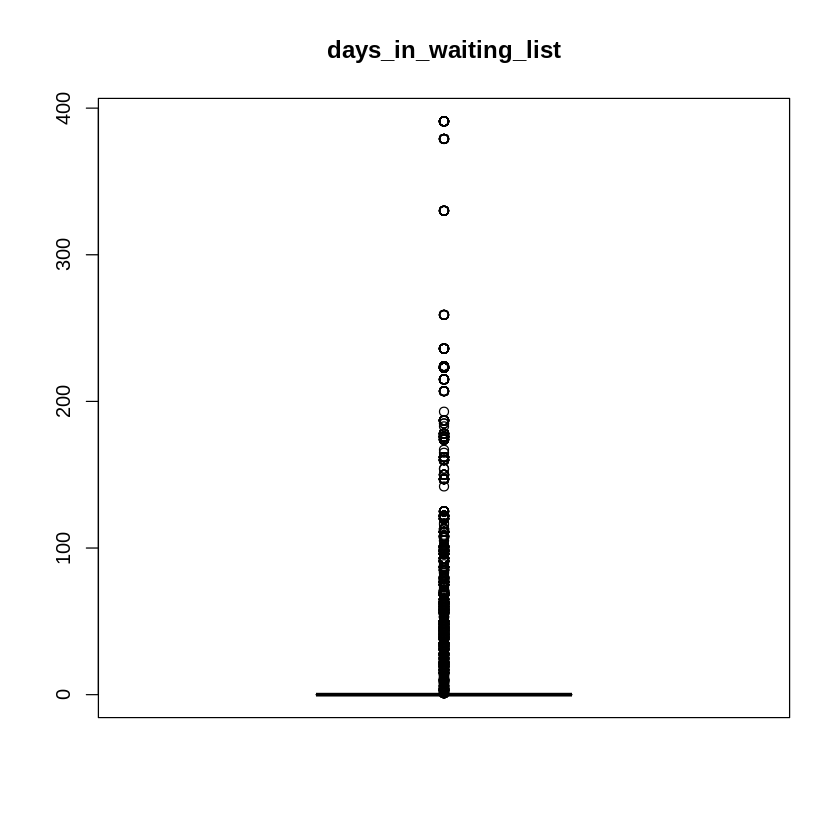

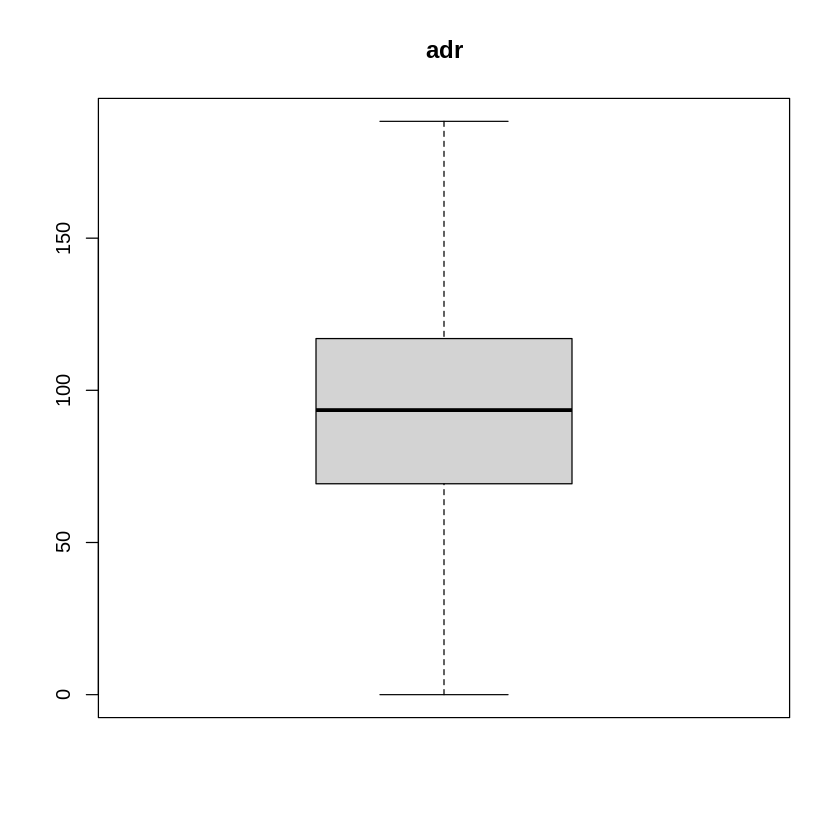

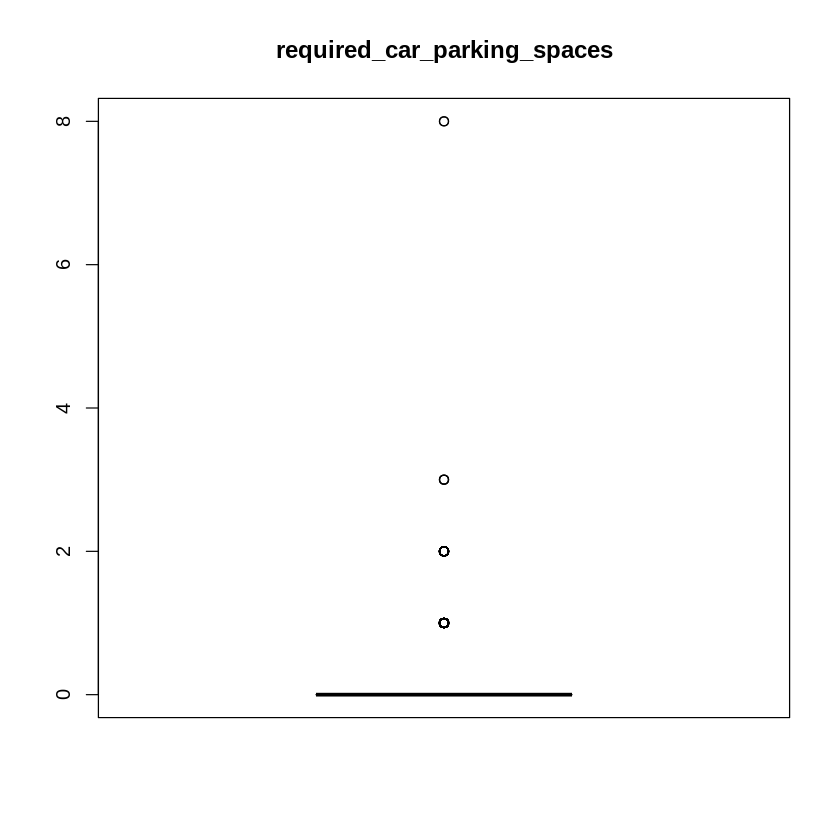

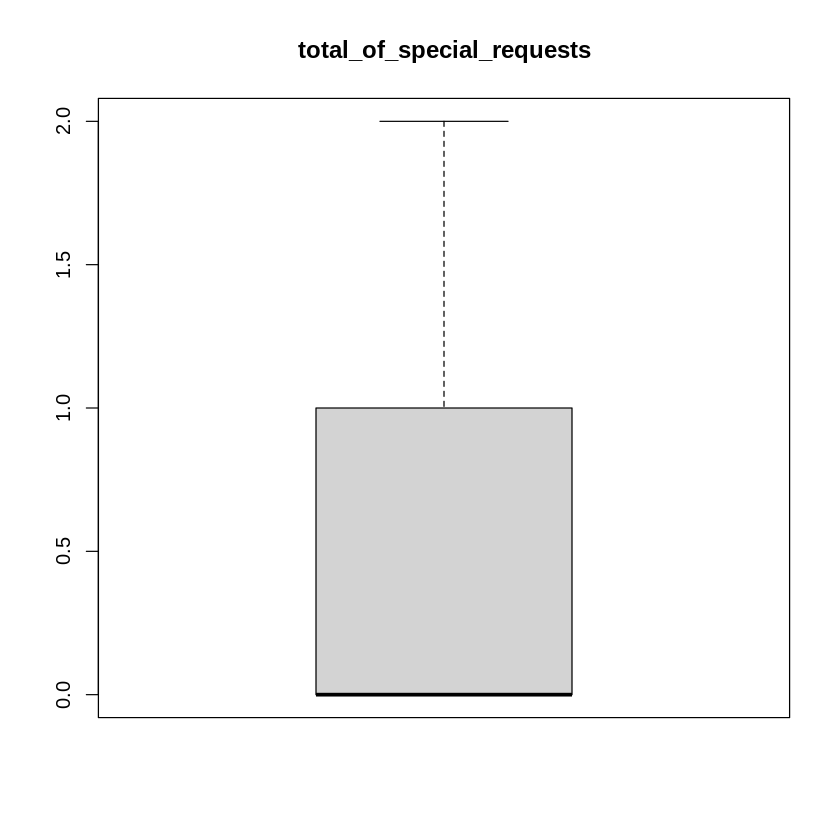

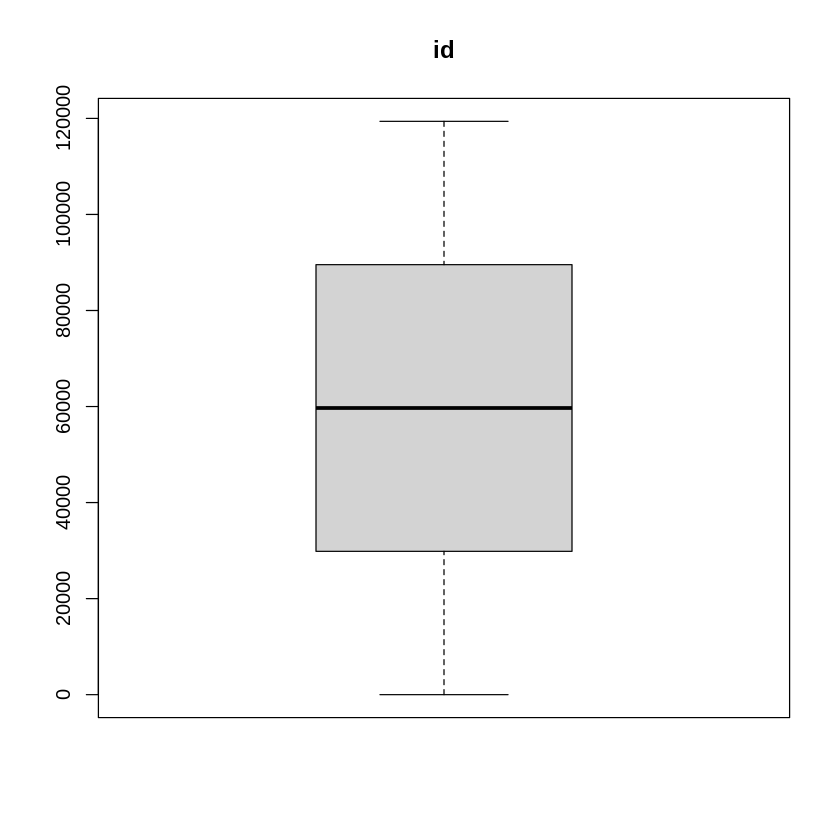

In [ ]:
numeric_cols <-new_hotel[, sapply(new_hotel, is.numeric)]
boxplot(numeric_cols)
for (col in names(new_hotel)) {
  if (is.numeric(new_hotel[[col]])) {
    boxplot(new_hotel[[col]], main = col)
  }
}

# Tipo de hotel que prefieren

In [ ]:
preferencias_tipo_hotel <- function(hotel) {
    tipo_hotel <- hotel %>%
    group_by(hotel) %>%
    summarise(total_reservas = n())
    # tipo_hotel

    # graficar
    ggplot(tipo_hotel, aes(x = as.factor(hotel), y = total_reservas, fill = hotel)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Cantidad de reservas por hotel",
        x = "Tipo Hotel",
        y = "Total de reservas",
        fill = "Hotel") +
    theme_minimal() +
    theme(legend.position = "right") +
    scale_fill_brewer(palette = "Set1")
}

#numeric Hotel Booking


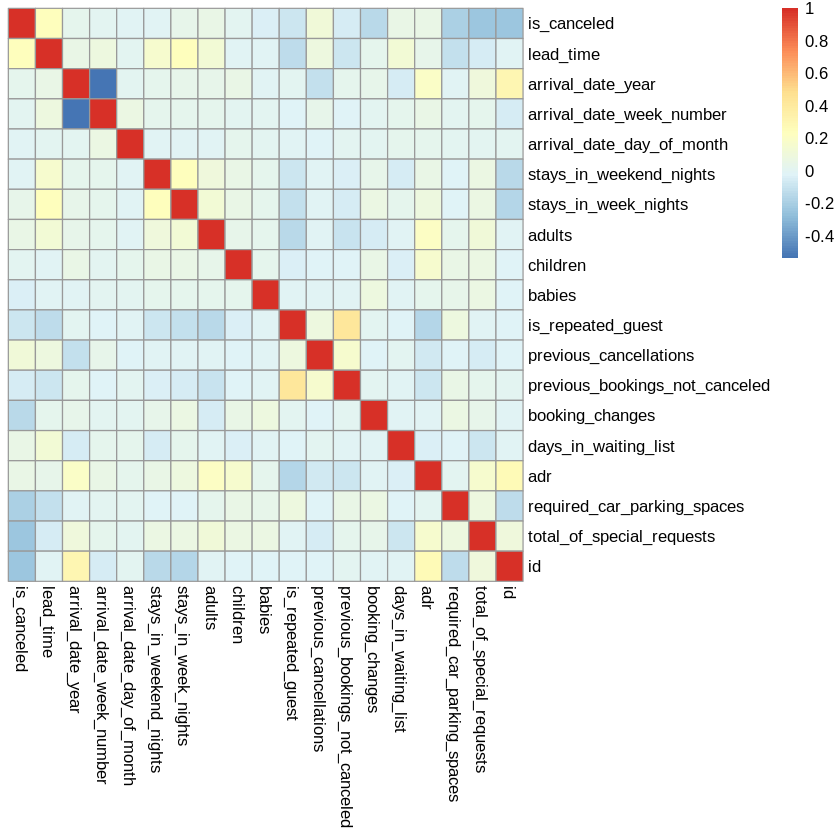

In [ ]:
numeric_hotels_booking <- new_hotel[, sapply(new_hotel, is.numeric)]
correlation_matrix <- cor(numeric_hotels_booking)
pheatmap(correlation_matrix,
         cluster_rows = FALSE, cluster_cols = FALSE,
         fontsize = 10)

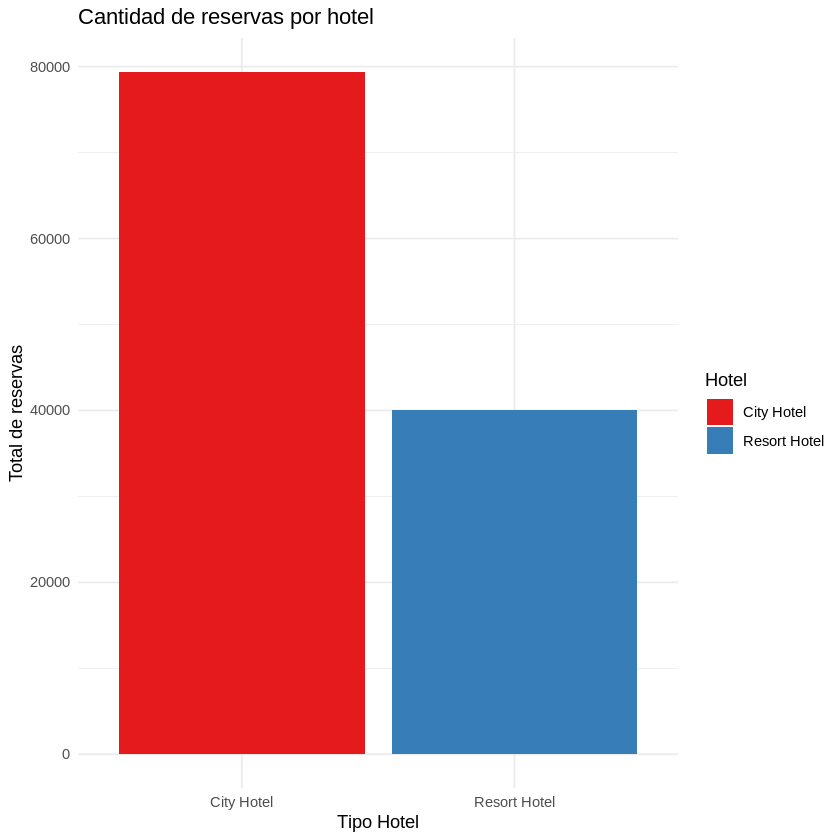

In [ ]:
preferencias_tipo_hotel(hotel)

# Aumento de demanda con el tiempo

In [ ]:
aumento_demanda <- function(hotel){
    hotel_data <- hotel %>%
    mutate(arrival_date_month = factor(arrival_date_month, levels = month.name)) %>%
    group_by(arrival_date_year, hotel, arrival_date_month) %>%
    summarise(total_bookings = n())
    # hotel_data

    # graficar
    ggplot(hotel_data, aes(x = as.factor(arrival_date_year), y = total_bookings, fill = hotel)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Cantidad de reservas por año y hotel",
        x = "Año",
        y = "Total de reservas",
        fill = "Hotel") +
    theme_minimal() +
    theme(legend.position = "right") +
    scale_fill_brewer(palette = "Set1")
}

`summarise()` has grouped output by 'arrival_date_year', 'hotel'. You can
override using the `.groups` argument.


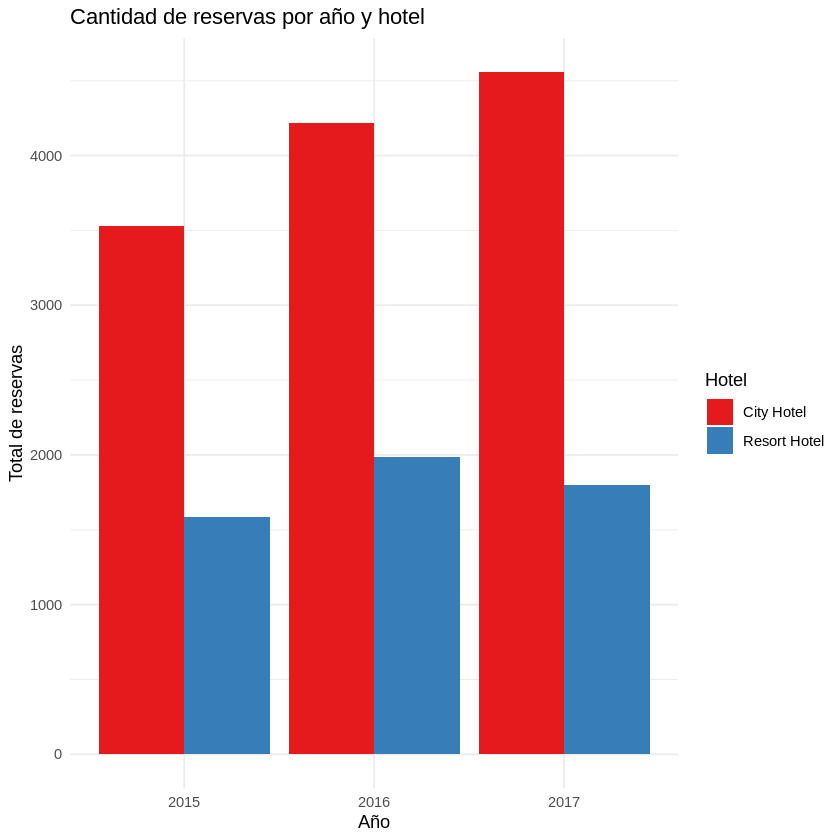

In [ ]:
aumento_demanda(new_hotel)

# cancelaciones por mes

In [ ]:
cancelaciones_por_mes <- function(hotel){
    cancelled_bookings <- hotel[hotel$is_canceled == 1, ]
    # print(cancelled_bookings)

    #agrupación y suma
    cancelled_bookings <- cancelled_bookings %>%
    group_by(arrival_date_year, arrival_date_month, hotel) %>%
    summarise(total_cancelations = n())
    # print(cancelled_bookings)

    # hallar máximo de cancelacione
    max_cancelations <- cancelled_bookings %>%
    group_by(hotel) %>%
    slice(which.max(total_cancelations))

    # grafica
    ggplot(cancelled_bookings, aes(x = as.factor(arrival_date_month), y = total_cancelations, fill = hotel)) +
    geom_bar(stat = "identity", position = "dodge") +
    geom_text(data = max_cancelations, aes(label = total_cancelations), vjust = -0.5, color = "black", size = 3) +
    labs(title = "Número de cancelaciones por mes y hotel",
        x = "Mes",
        y = "Total de cancelaciones",
        fill = "Hotel") +
    theme_minimal() +
    theme(legend.position = "right") +
    scale_fill_brewer(palette = "Set3")
}

`summarise()` has grouped output by 'arrival_date_year', 'arrival_date_month'.
You can override using the `.groups` argument.


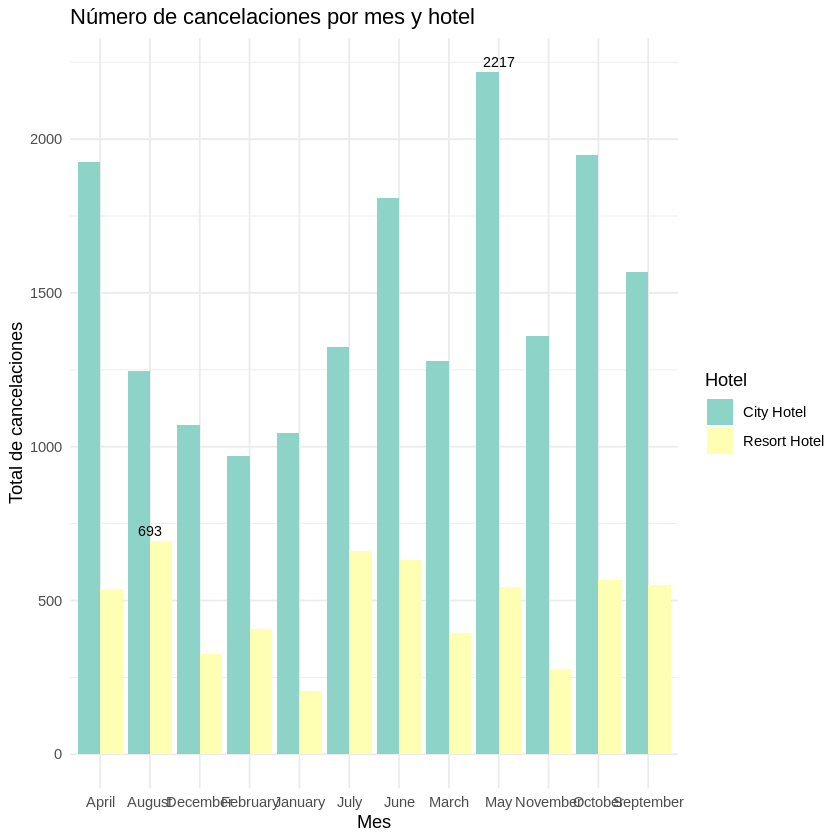

In [ ]:
cancelaciones_por_mes(new_hotel)

# cantidad de reservas con niños y bebes

In [ ]:
grafico_reservas_nn_bb <- function(hotel) {
    hotel_copia <- hotel
    hotel_copia$necesitan <- ifelse(hotel_copia$babies != 0 | hotel_copia$children != 0, "Si", "No")

    tabla <- table(hotel_copia$necesitan)
    tabla
    barplot(tabla,
    main = "Cantidad de reservas con y sin Bebes/Niños",
    col = c("skyblue", "salmon"),
            ylab = "Cantidad"
    )
}

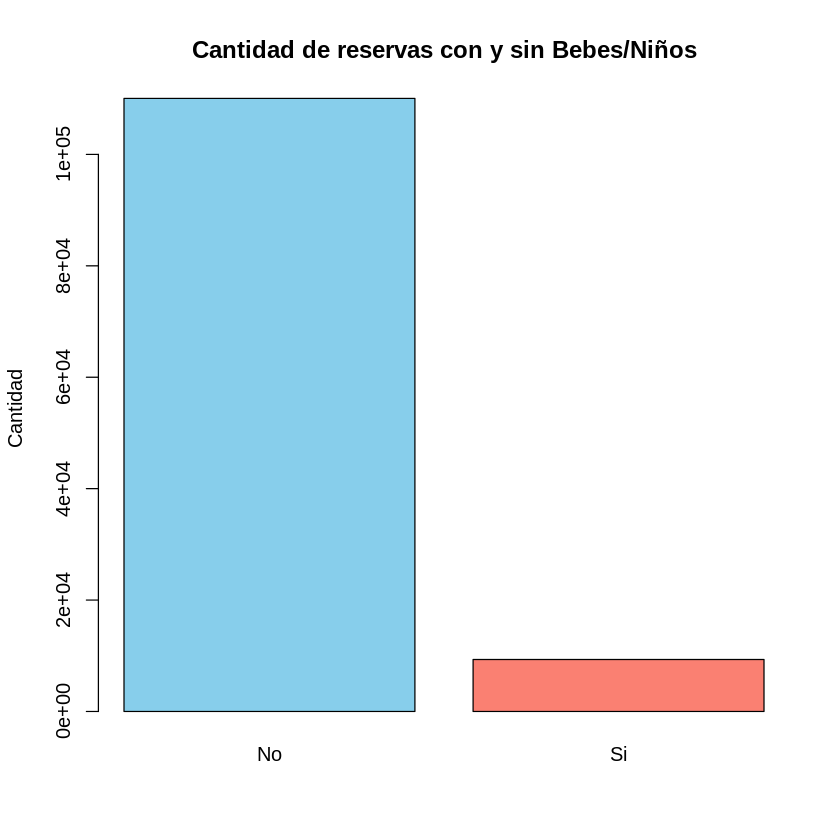

In [ ]:
grafico_reservas_nn_bb(new_hotel)

In [ ]:
reservas_con_ninos <- function(hotel) {
    total_reservas = nrow(hotel)

    df_ninos_bb = hotel[, c("children", "babies")]
    con_ninos <- df_ninos_bb[df_ninos_bb$children > 0  & df_ninos_bb$babies > 0, ]

    suma_ninos_bb = colSums(df_ninos_bb)
    total_nn_bb = sum(suma_ninos_bb) # sum(df_ninos_bb$children) + sum(df_ninos_bb$babies)
    porcentaje = (total_nn_bb / total_reservas) * 100

    # print(porcentaje)

    df_porcentaje <- data.frame(Categoria = c("Niños y Bebés", "Solitos"),
                            Porcentaje = c(porcentaje, 100 - porcentaje))

    df_porcentaje$Categoria <- factor(df_porcentaje$Categoria, levels = c("Solitos", "Niños y Bebés"))

    ggplot(data = df_porcentaje,
        mapping = aes(x = "", y = Porcentaje, fill = Categoria)) +
        geom_bar(position = 'stack', stat = 'identity')
}

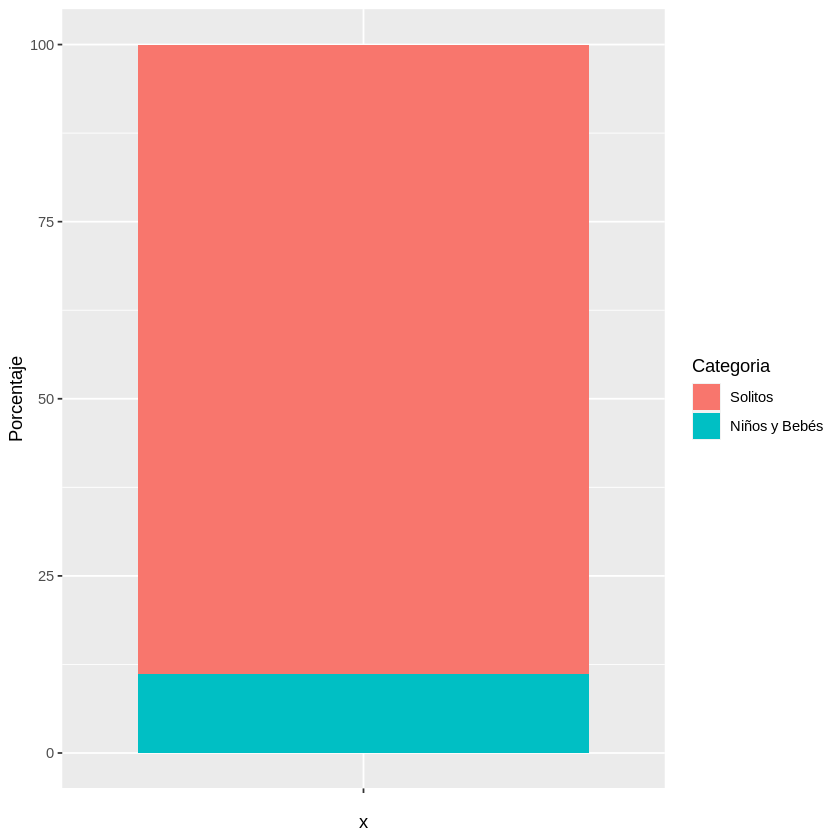

In [ ]:
reservas_con_ninos(new_hotel)

# Menor demanda

In [ ]:
menor_demanda <- function(hotel) {
    resumen <- hotel %>%
        mutate(arrival_date_month = factor(arrival_date_month, levels = month.name)) %>%
        group_by(hotel, arrival_date_year, arrival_date_month) %>%
        summarise(reservas_totales = n())
    resumen

    ggplot(resumen, aes(x = factor(arrival_date_month), y = reservas_totales, color = hotel, group = hotel)) +
  geom_line() +
  facet_wrap(~arrival_date_year, scales = "free") +
  labs(x = "Mes", y = "Número de reservas", title = "Evolución de reservas por mes y año") +
  scale_color_discrete(name = "Hotel") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotar las etiquetas del eje X en 90 grados

}


`summarise()` has grouped output by 'hotel', 'arrival_date_year'. You can
override using the `.groups` argument.


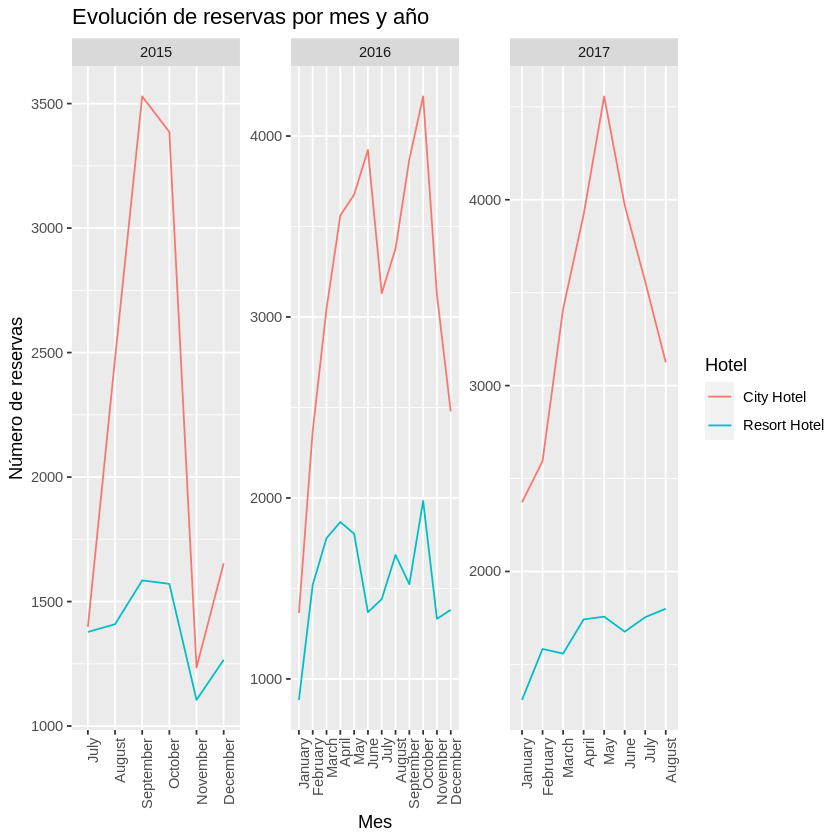

In [ ]:
menor_demanda(new_hotel)

#¿Es importante contar con espacios de estacionamiento?

In [ ]:
importancia_estacionamiento <- function(hotel){
    hotel_copia = hotel
    hotel_copia$necesita_estacionamiento <- ifelse(hotel_copia$required_car_parking_spaces != 0, "Sí", "No")
    resumen <- table(hotel_copia$necesita_estacionamiento)
    barplot(resumen,
    main = "Clientes que necesitaron de estacionamiento",
    names = c("No", "Si"),
    col = c("skyblue", "salmon"),
    ylab = "Frecuencia")
    resumen
}


    No     Sí 
111970   7416 

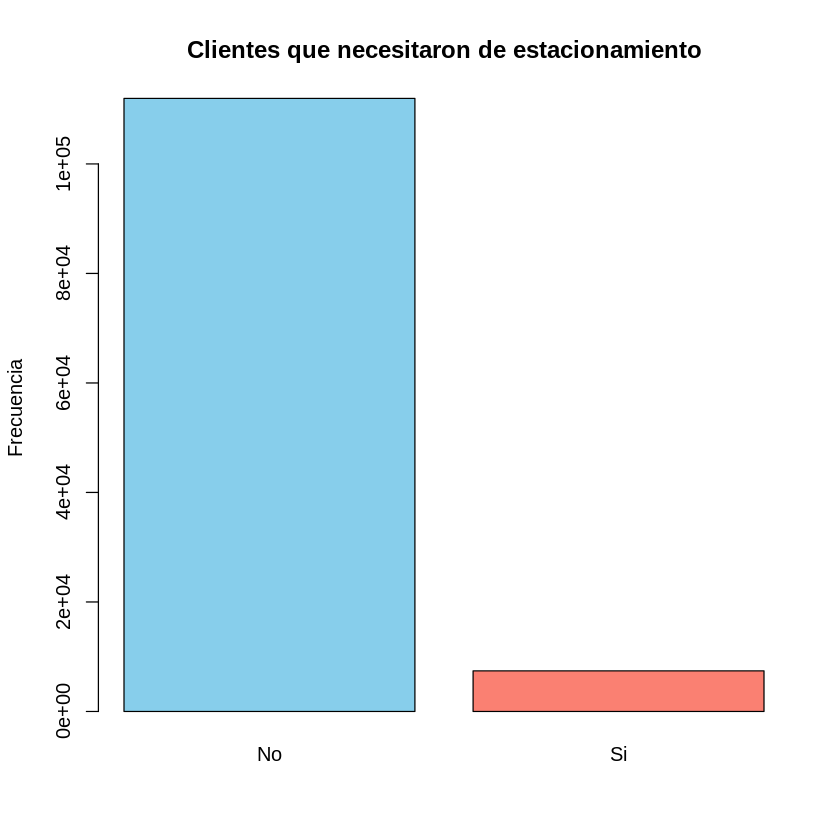

In [ ]:
importancia_estacionamiento(new_hotel)

# Exportando data limpia


In [ ]:
write.csv(new_hotel, "data.csv")